In [1]:
import pandas as pd
import os
import glob
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py'>

In [3]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/output/"
output_path = input_path
results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/results/"

# Test
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_output/"
output_path = input_path
results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_results/"

In [4]:
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4].csv"
files = glob.glob(input_path + os.sep + '*' + os.sep + os.sep + '*' + os.sep + pattern, recursive=True)

In [5]:
Data = []

for file in files:
    
    filename = os.path.basename(file)
    
    try:
        
        Data_Temp = pd.read_csv(file)
        row_count = Data_Temp.shape[0]
        
        print(f"File: {filename} has {row_count} rows")
        
        Data.append(Data_Temp)
            
    except Exception as e:
        
        print(f"Error reading file {filename}: {e}")
        
        
### concat all files together
Data_aggregated = pd.concat(Data)
Data_aggregated = Data_aggregated.reset_index(drop = True)

print("Aggregated Data has shape ", Data_aggregated.shape)

File: C1269_R2.csv has 384 rows
File: C1242_R2.csv has 384 rows
File: C1288_R1.csv has 384 rows
File: C1240_R4.csv has 384 rows
File: C1242_R3.csv has 384 rows
File: C1260_R1.csv has 384 rows
File: C1258_R2.csv has 384 rows
File: C1270_R3.csv has 384 rows
File: C1259_R1.csv has 384 rows
File: C1283_R2.csv has 384 rows
File: C1238_R3.csv has 384 rows
File: C1261_R1.csv has 384 rows
File: C1245_R4.csv has 384 rows
File: C1263_R1.csv has 384 rows
File: C1276_R1.csv has 384 rows
File: C1266_R3.csv has 384 rows
File: C1261_R2.csv has 384 rows
File: C1233_R3.csv has 384 rows
File: C1287_R2.csv has 384 rows
File: C1248_R1.csv has 384 rows
File: C1251_R1.csv has 384 rows
File: C1264_R4.csv has 384 rows
File: C1261_R4.csv has 384 rows
File: C1264_R3.csv has 384 rows
File: C1248_R2.csv has 384 rows
File: C1272_R3.csv has 384 rows
File: C1234_R1.csv has 384 rows
File: C1281_R3.csv has 384 rows
File: C1254_R4.csv has 384 rows
File: C1247_R4.csv has 384 rows
File: C1288_R4.csv has 384 rows
File: C1

In [6]:
def analyze_cell_number(Data_aggregated, site_name):

    figure_path = os.path.join(results_path + os.sep + site_name + os.sep + 'cell_number')  

    try:
        os.mkdir(figure_path)

    except OSError as e:
        
        print("Error: directory cannot be created") 

    Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == site_name]
    # change over to staining date
    imaging_date_list = Data_aggregated["Metadata_staining_date"].unique()
    imaging_date_list.sort()

    # TODO: Refactor to function
    for date in imaging_date_list:
    
        cell_number = Data_aggregated.loc[Data_aggregated["Metadata_staining_date"] == date]
        
        cell_number = cell_number.set_index('Metadata_plate_map_name').sort_index().reset_index()
    
        plt.figure(figsize=(10, 10))

        plot = sns.catplot(
            data=cell_number,
            x='Metadata_plate_map_name',
            y='Metadata_Object_Count',
            kind='box',
            col = 'Metadata_RoughID',
            col_order=['EOS_cpd','DMSO','Tetrandrine', 'Nocodazole']
        )

        plt.ylabel('Cell number')
        # plt.ylim(0, 10000)
        plt.tight_layout()

        plot.set_axis_labels("Plate map name", "Cell number")
        plot.set_xticklabels(rotation=90)
    
        plot.figure.subplots_adjust(top=0.9)
        plot.figure.suptitle('Batch ' + str(date), fontsize=16, x = 0.05)

        plt.savefig(figure_path + os.sep + str(date) + '_' + site_name + '_cell_number_controls.pdf', format='pdf', bbox_inches = "tight")

Error: directory cannot be created


<ipython-input-6-3b17d2221bc7>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

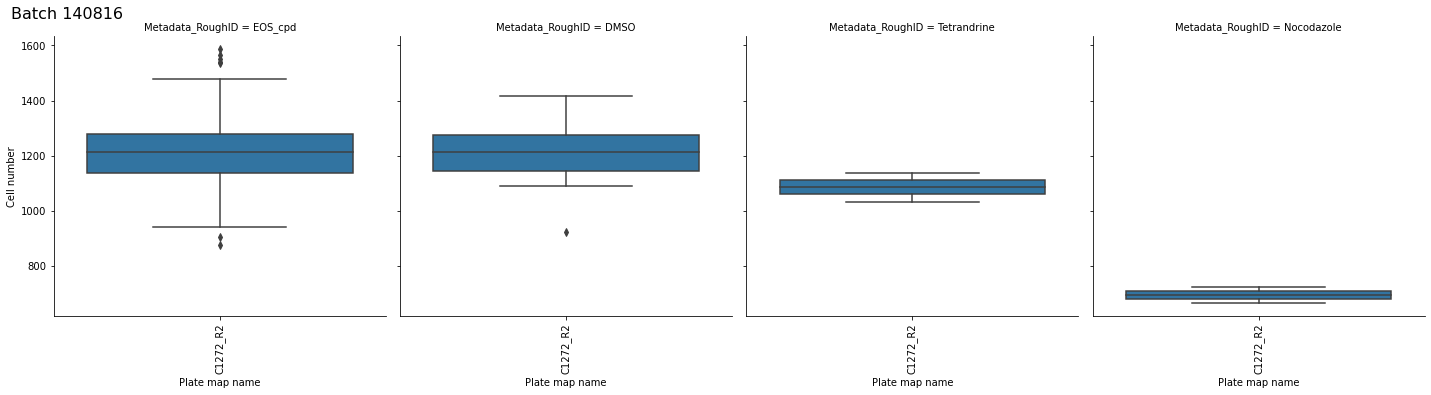

<Figure size 720x720 with 0 Axes>

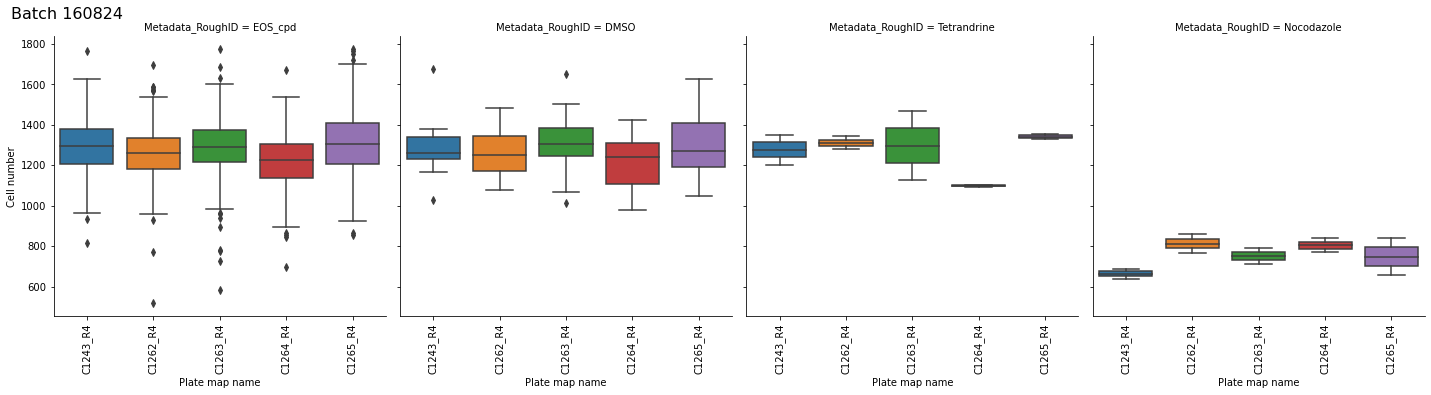

<Figure size 720x720 with 0 Axes>

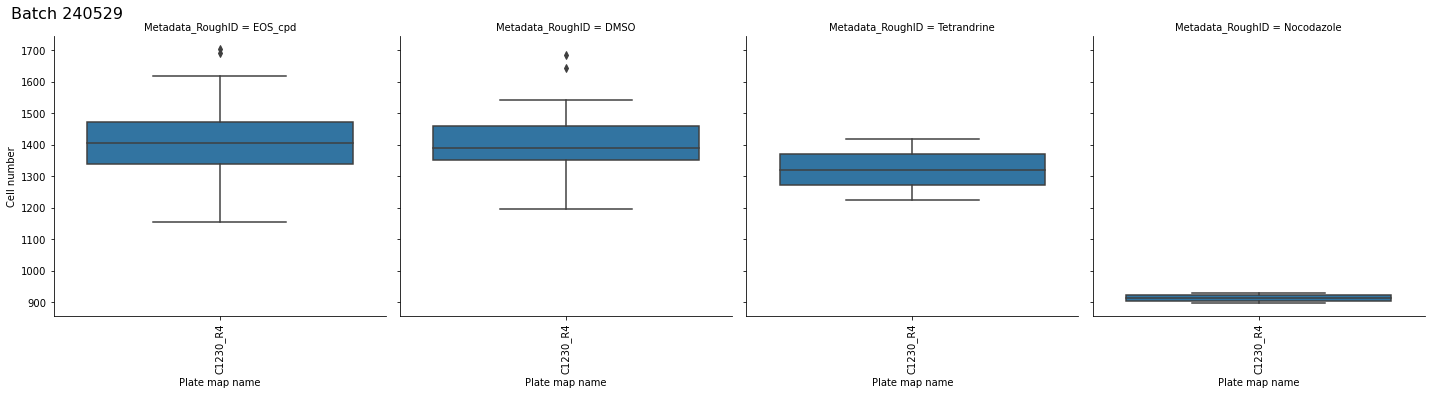

<Figure size 720x720 with 0 Axes>

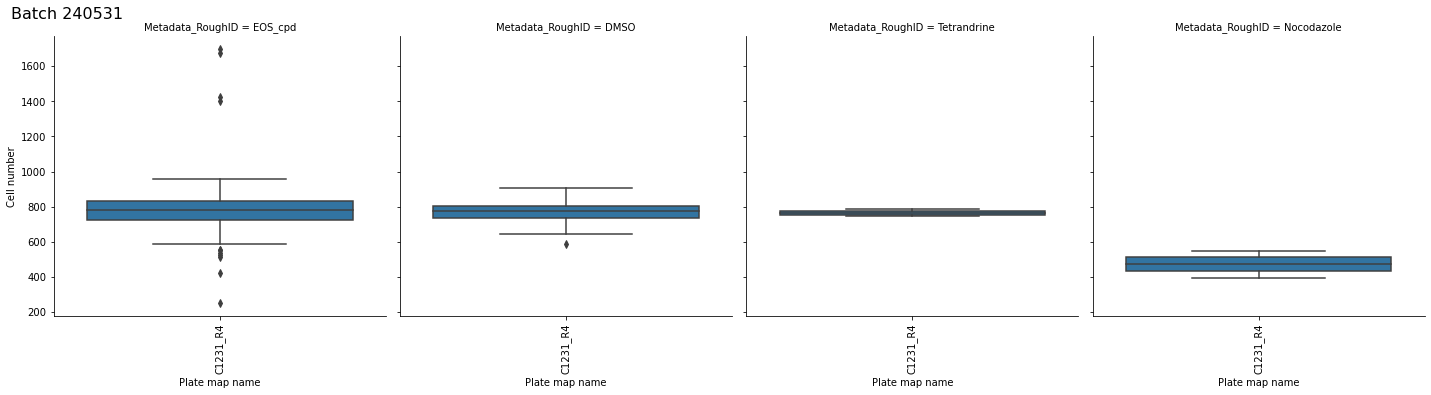

<Figure size 720x720 with 0 Axes>

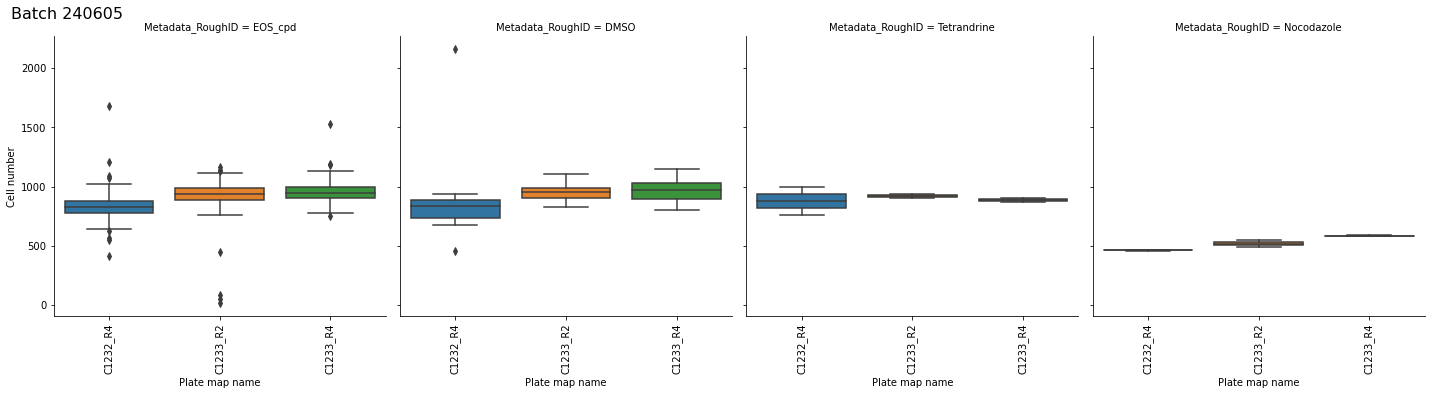

<Figure size 720x720 with 0 Axes>

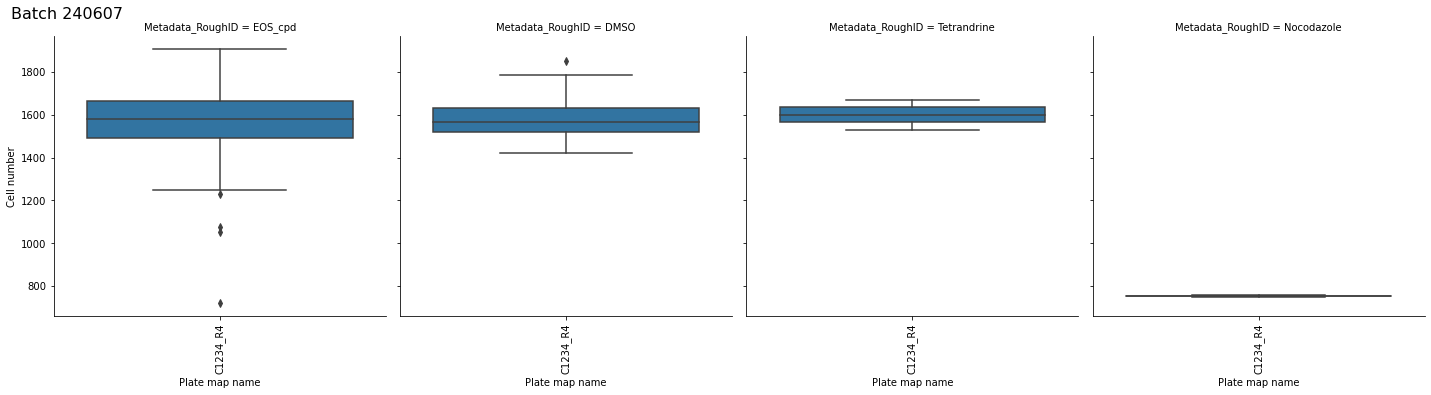

<Figure size 720x720 with 0 Axes>

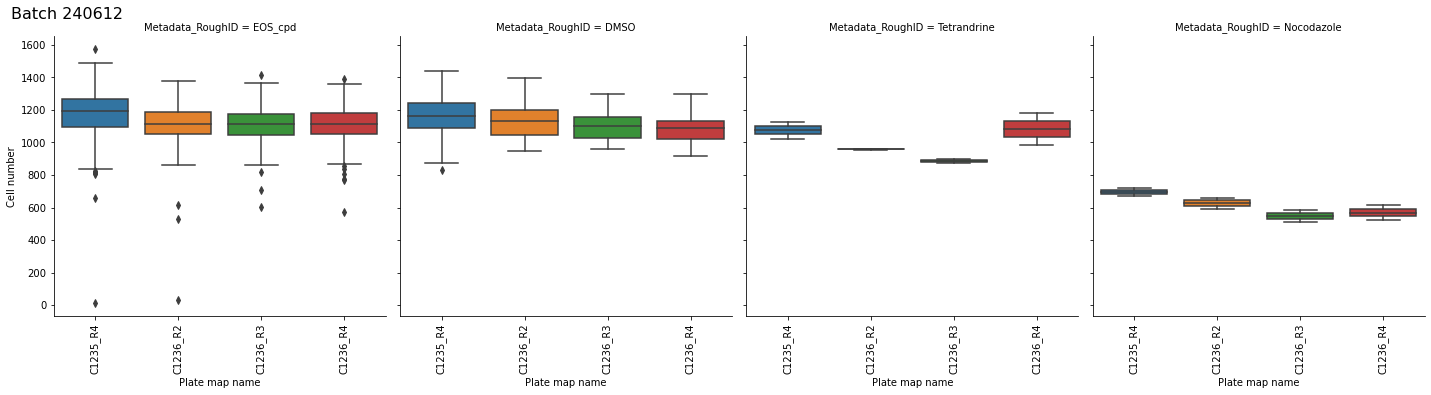

<Figure size 720x720 with 0 Axes>

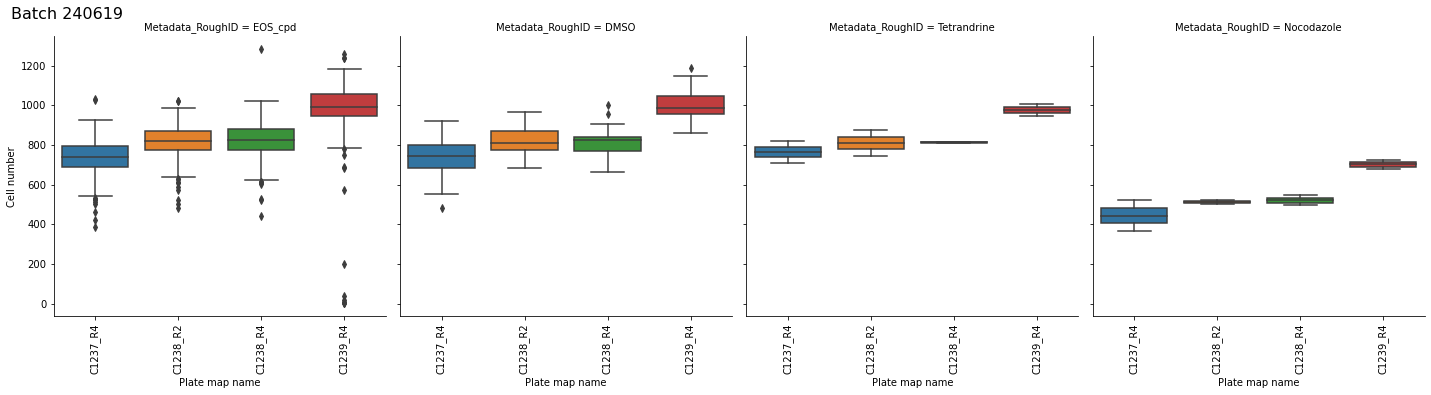

<Figure size 720x720 with 0 Axes>

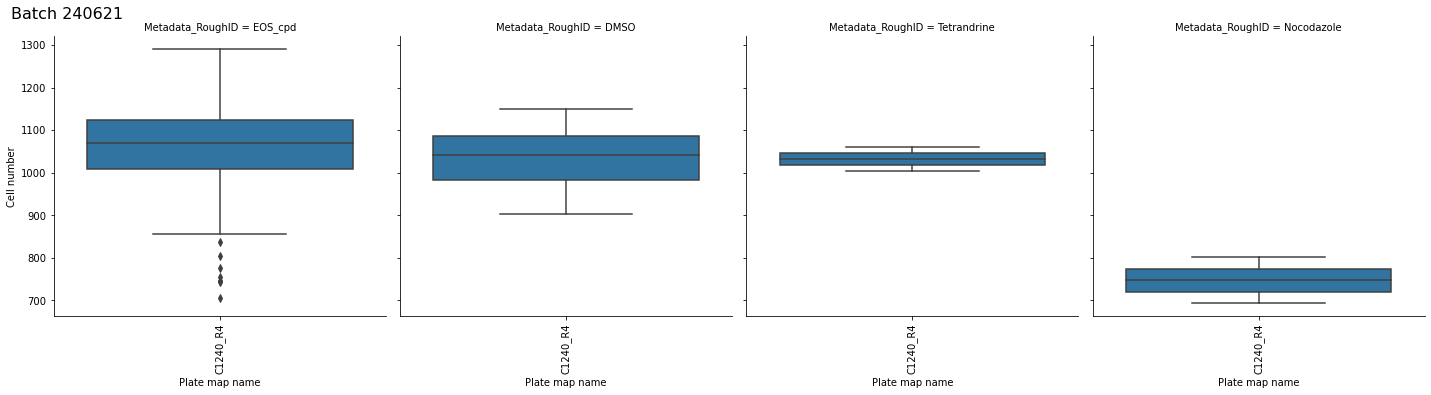

<Figure size 720x720 with 0 Axes>

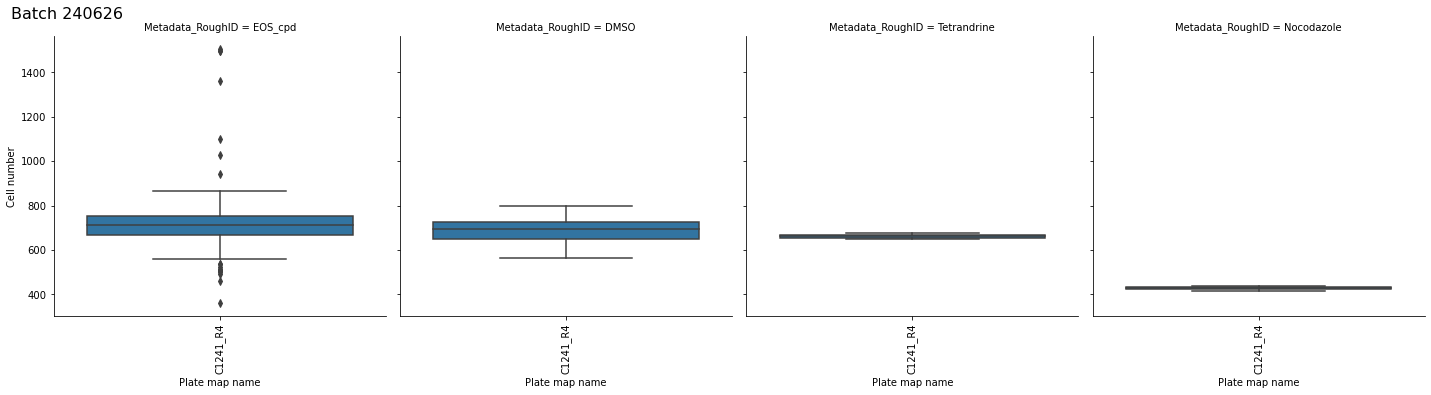

<Figure size 720x720 with 0 Axes>

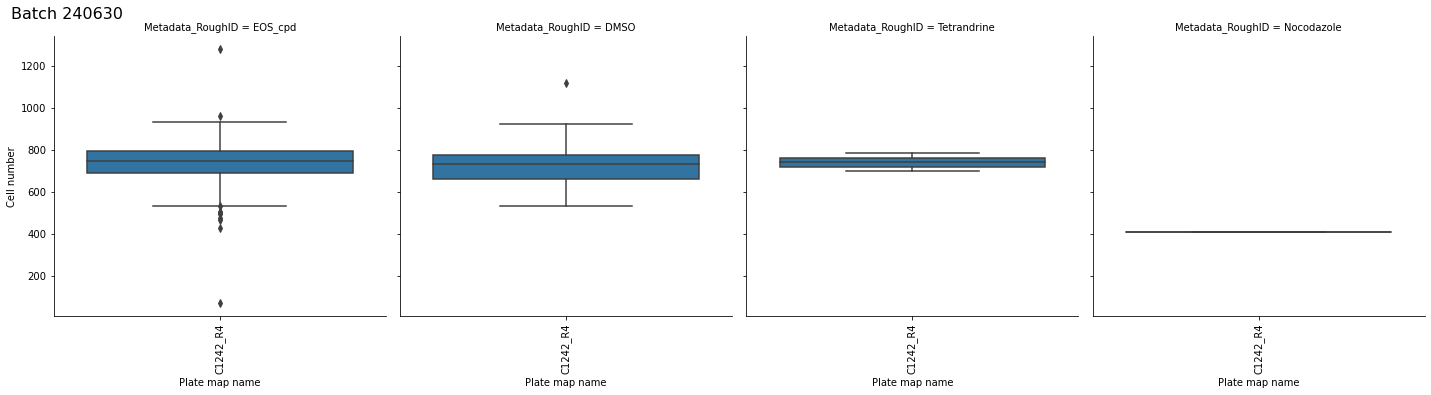

<Figure size 720x720 with 0 Axes>

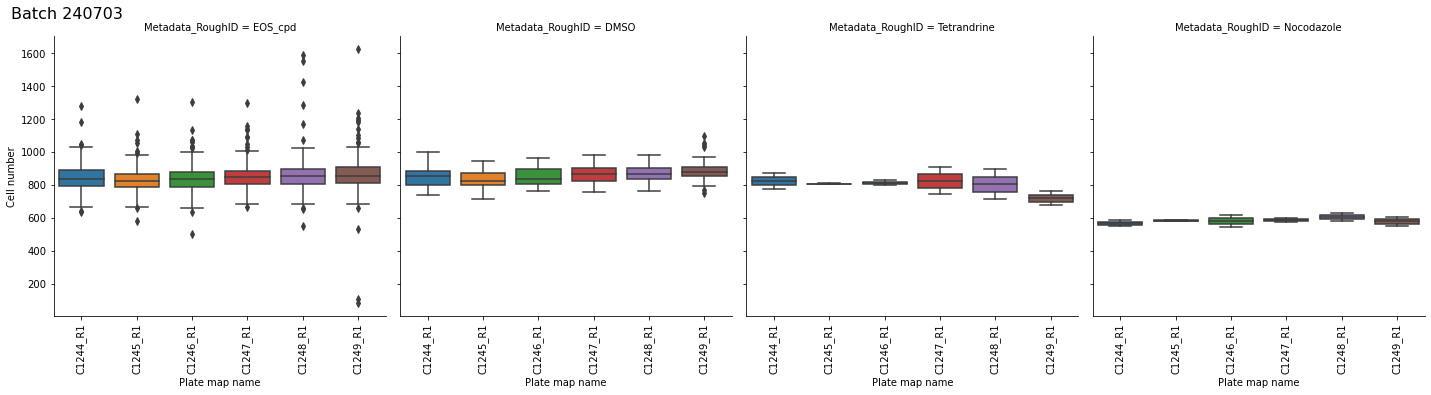

<Figure size 720x720 with 0 Axes>

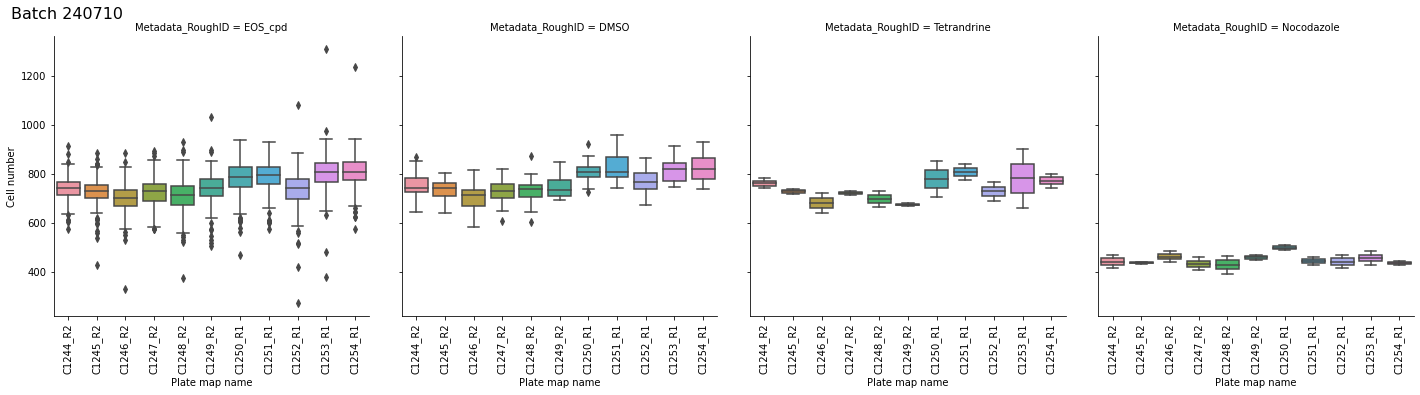

<Figure size 720x720 with 0 Axes>

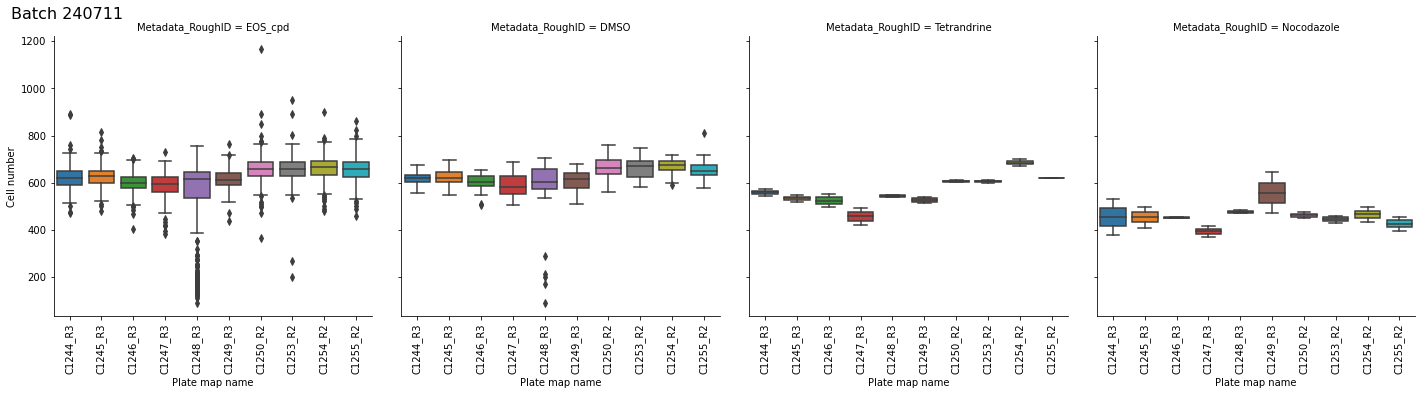

<Figure size 720x720 with 0 Axes>

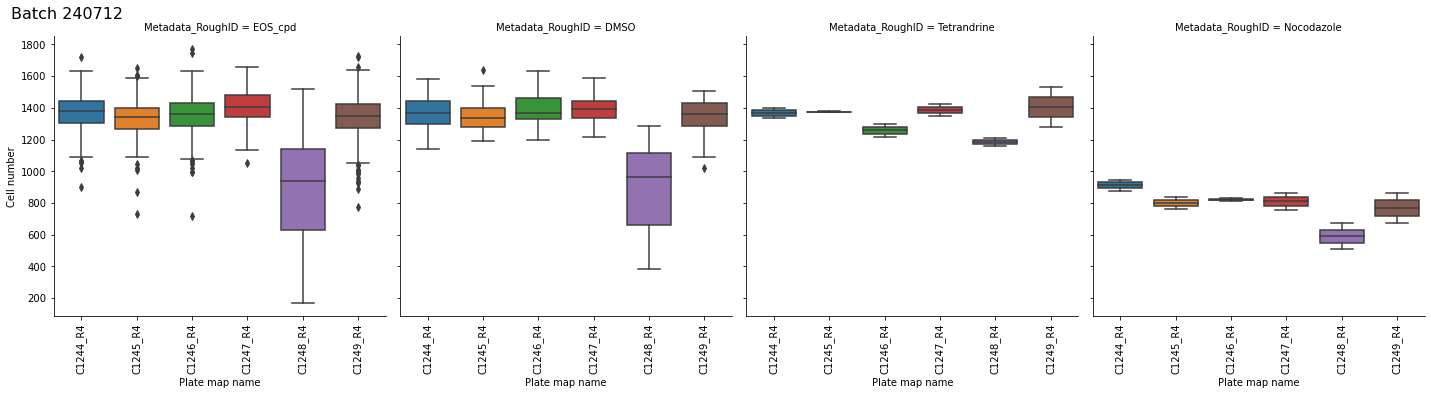

<Figure size 720x720 with 0 Axes>

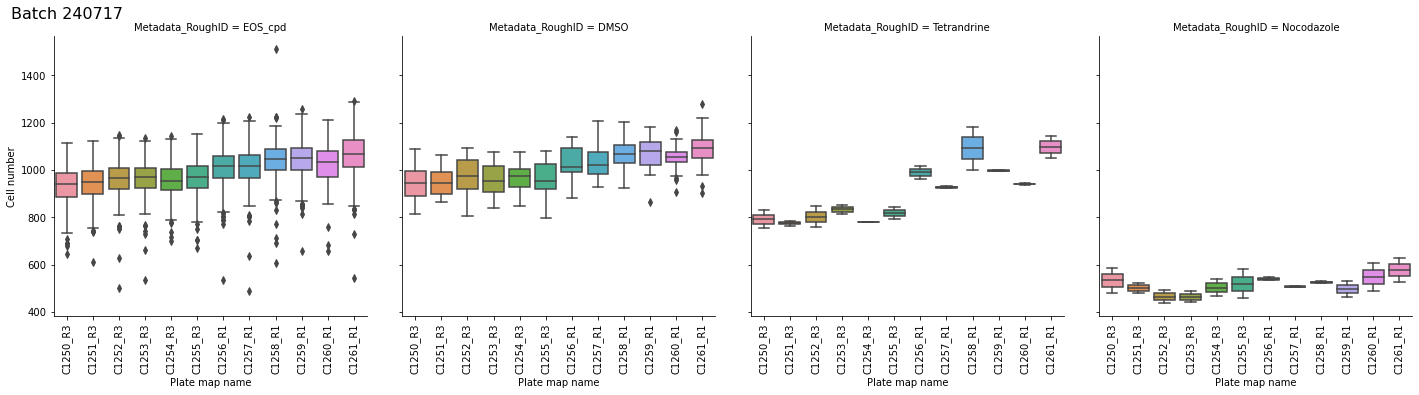

<Figure size 720x720 with 0 Axes>

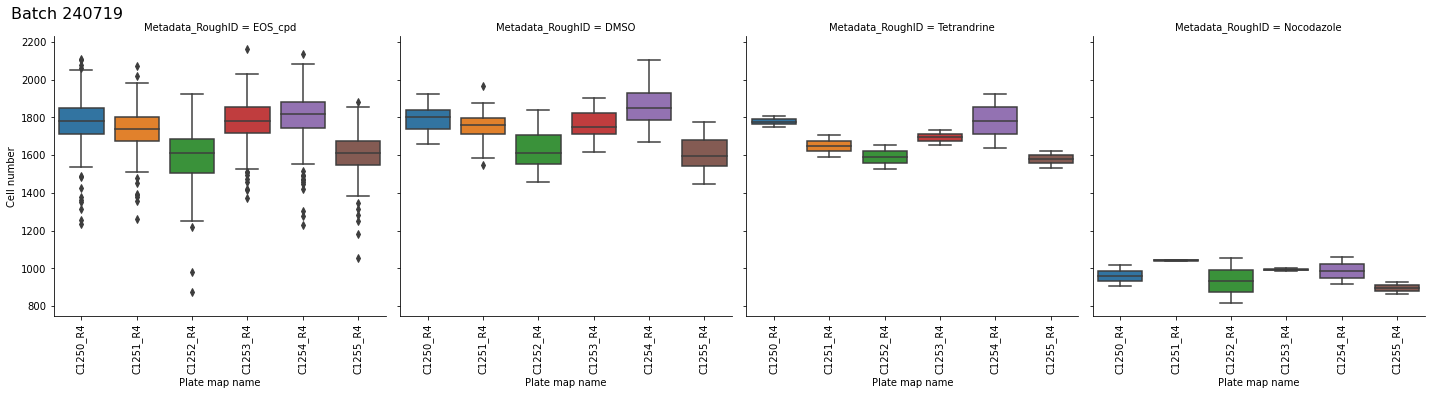

<Figure size 720x720 with 0 Axes>

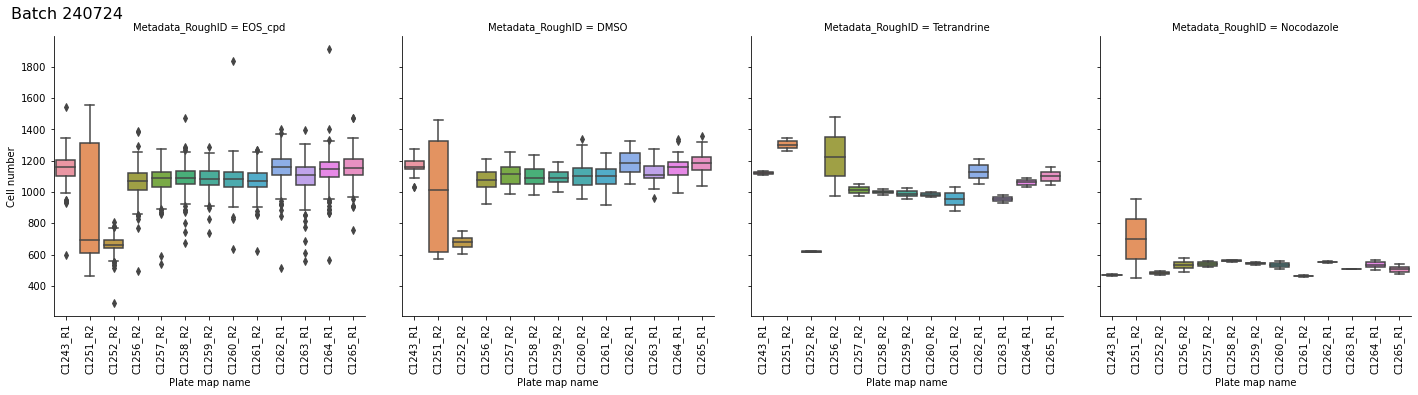

<Figure size 720x720 with 0 Axes>

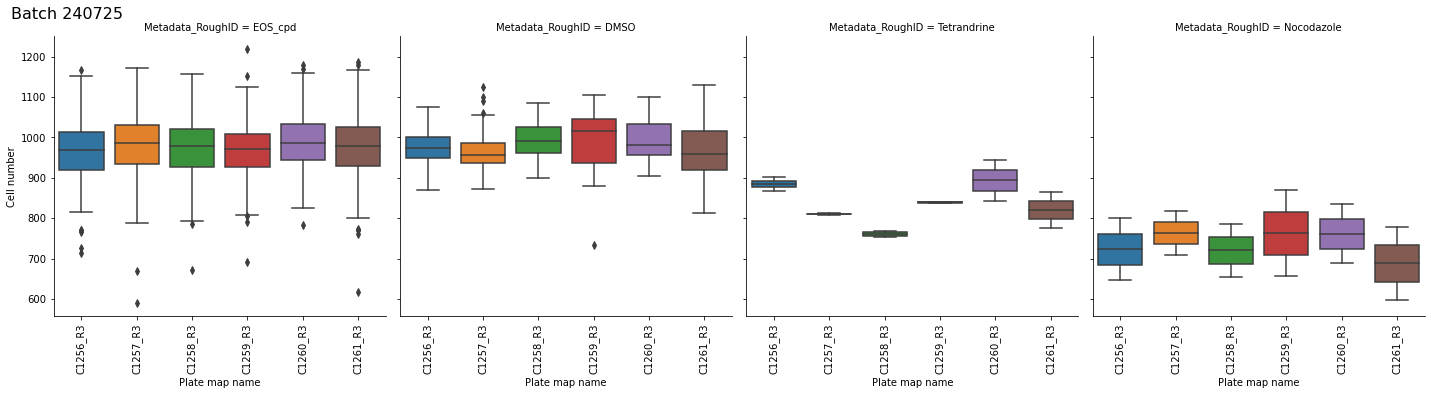

<Figure size 720x720 with 0 Axes>

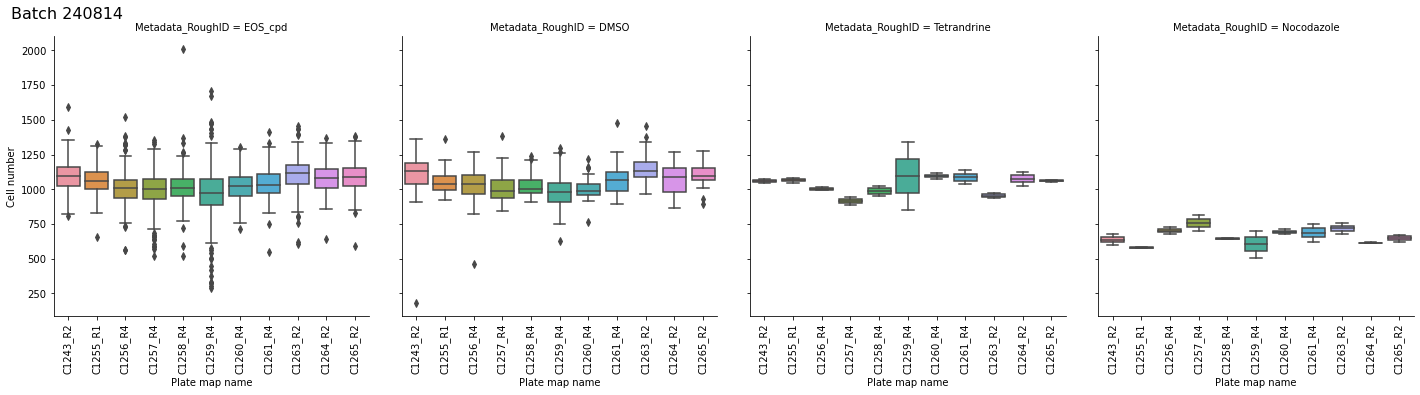

<Figure size 720x720 with 0 Axes>

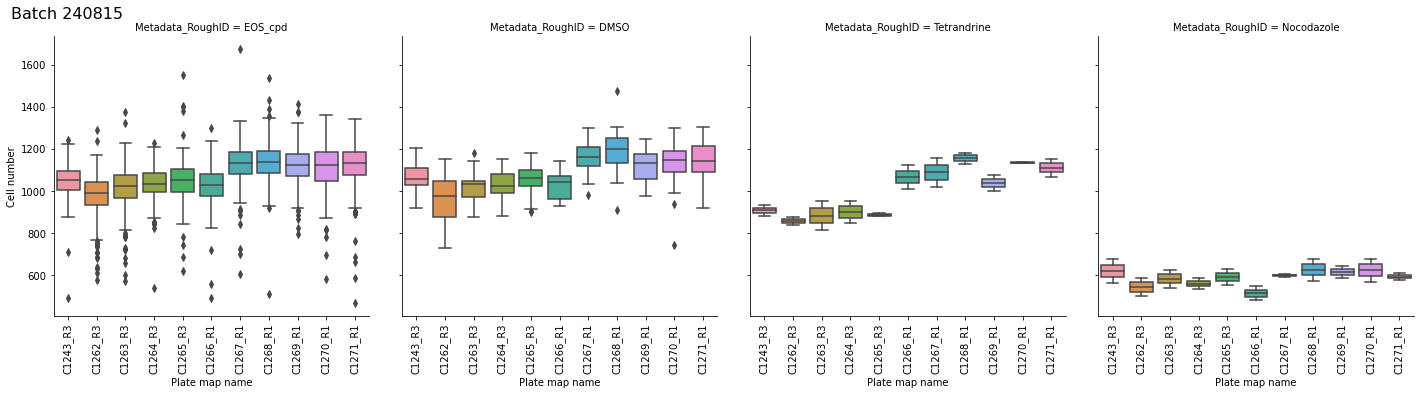

<Figure size 720x720 with 0 Axes>

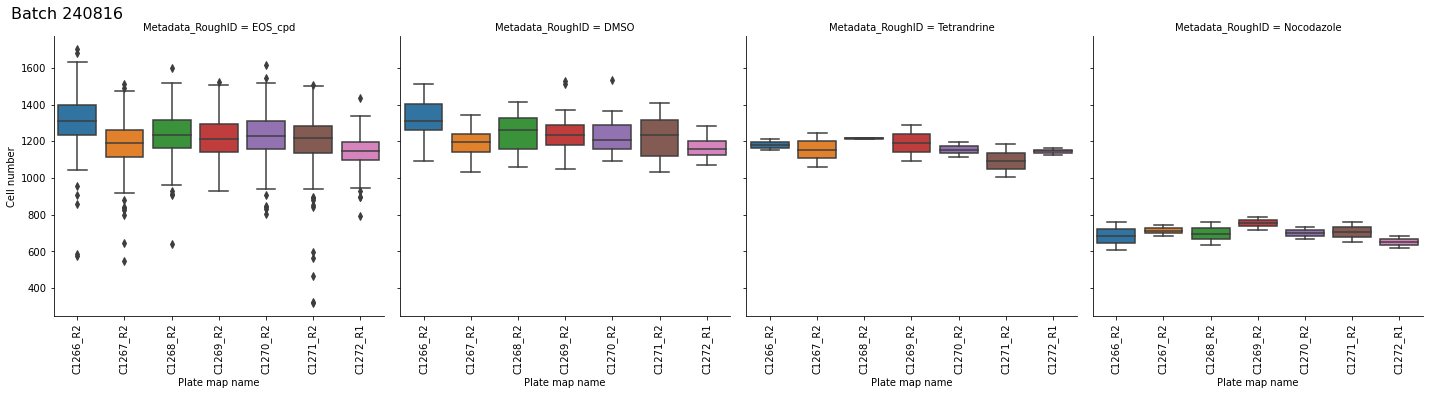

<Figure size 720x720 with 0 Axes>

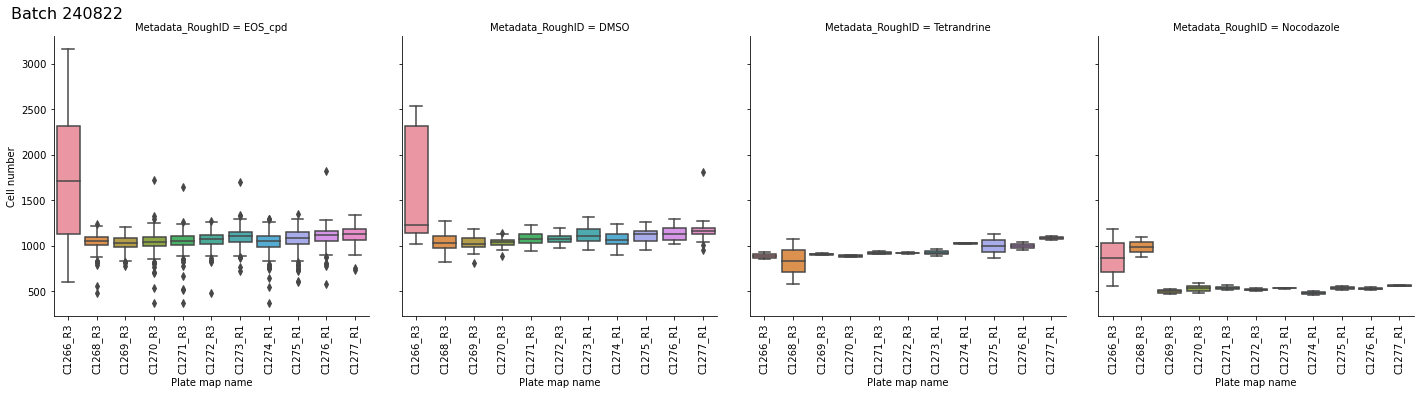

<Figure size 720x720 with 0 Axes>

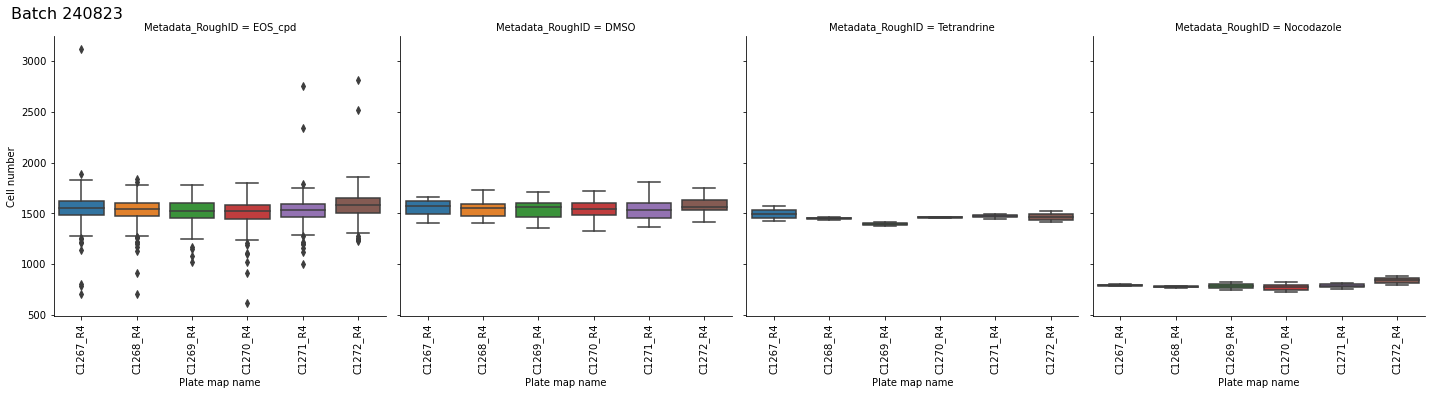

<Figure size 720x720 with 0 Axes>

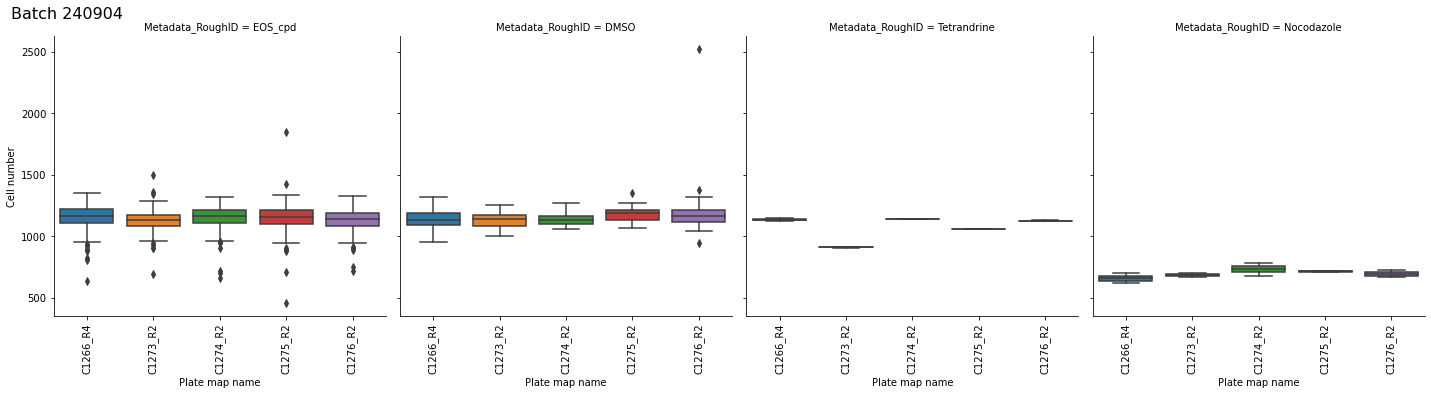

<Figure size 720x720 with 0 Axes>

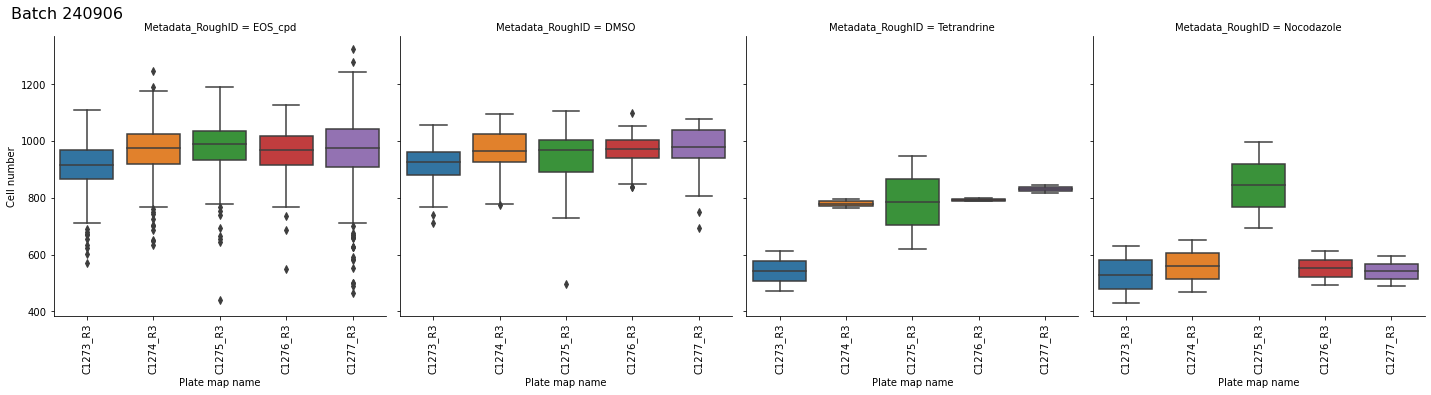

<Figure size 720x720 with 0 Axes>

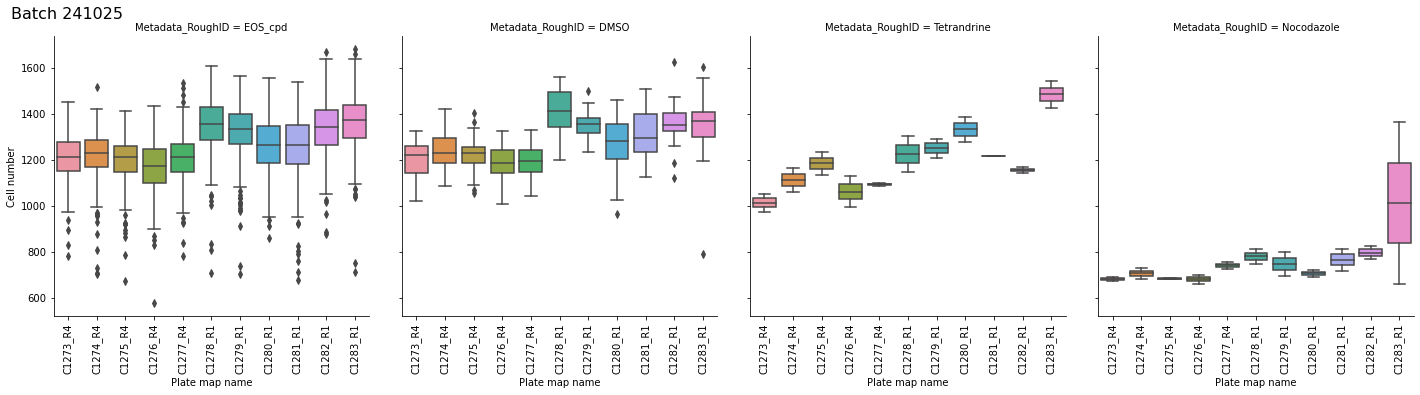

<Figure size 720x720 with 0 Axes>

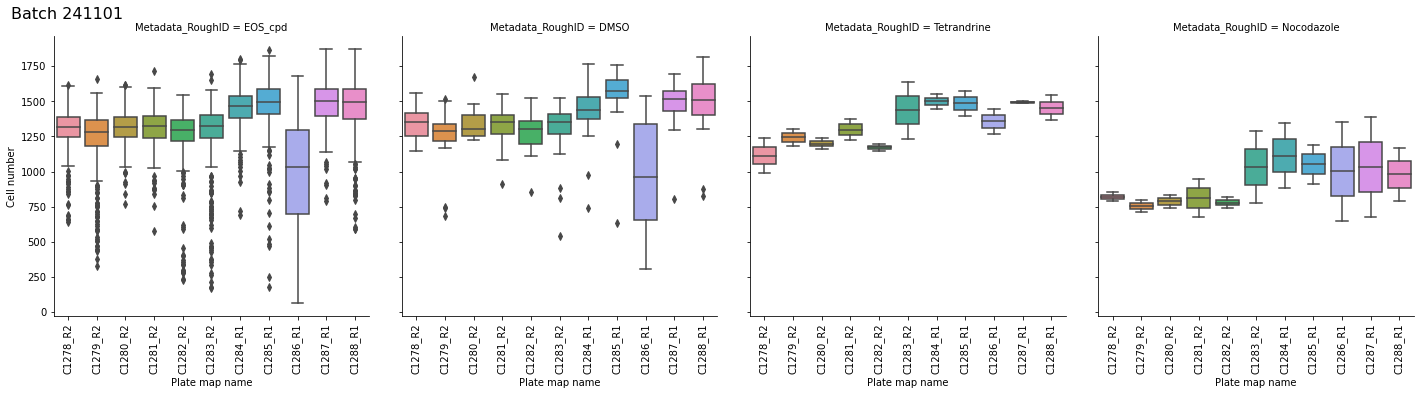

<Figure size 720x720 with 0 Axes>

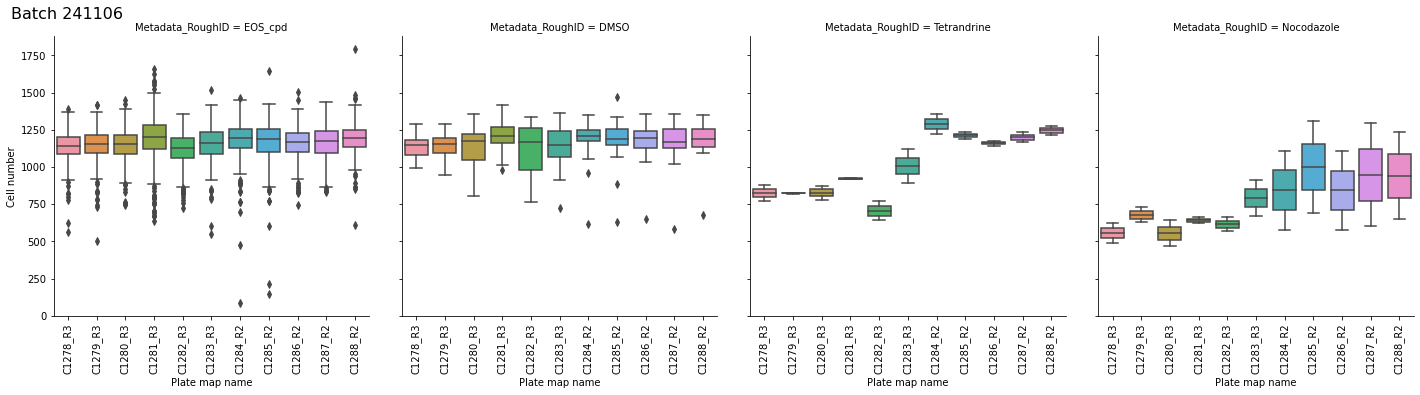

<Figure size 720x720 with 0 Axes>

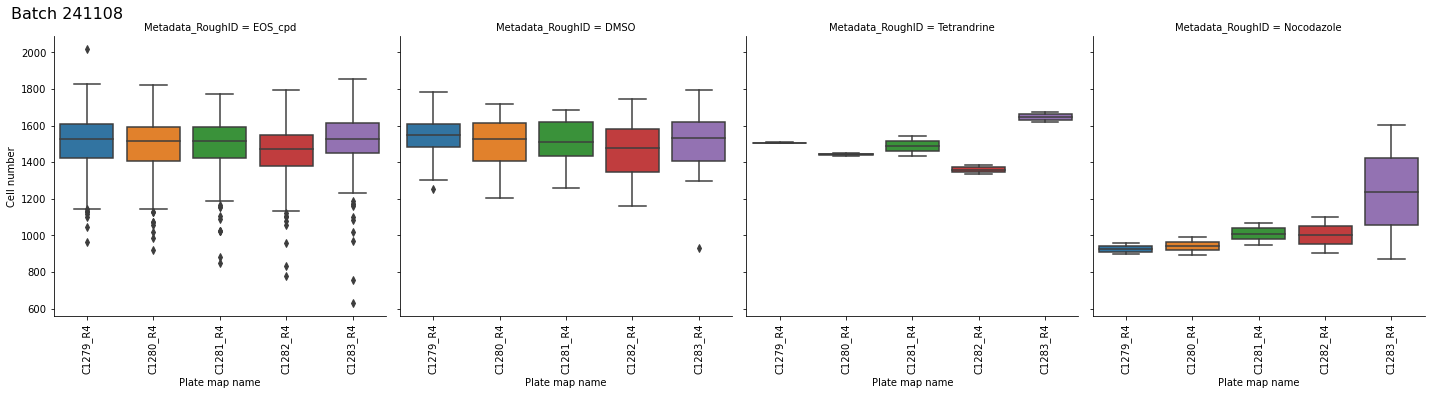

<Figure size 720x720 with 0 Axes>

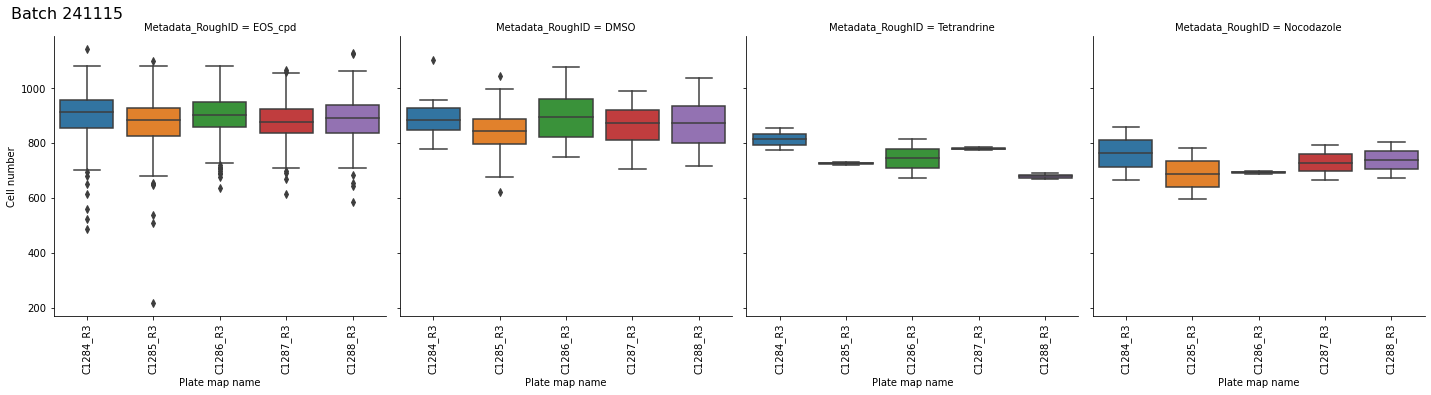

<Figure size 720x720 with 0 Axes>

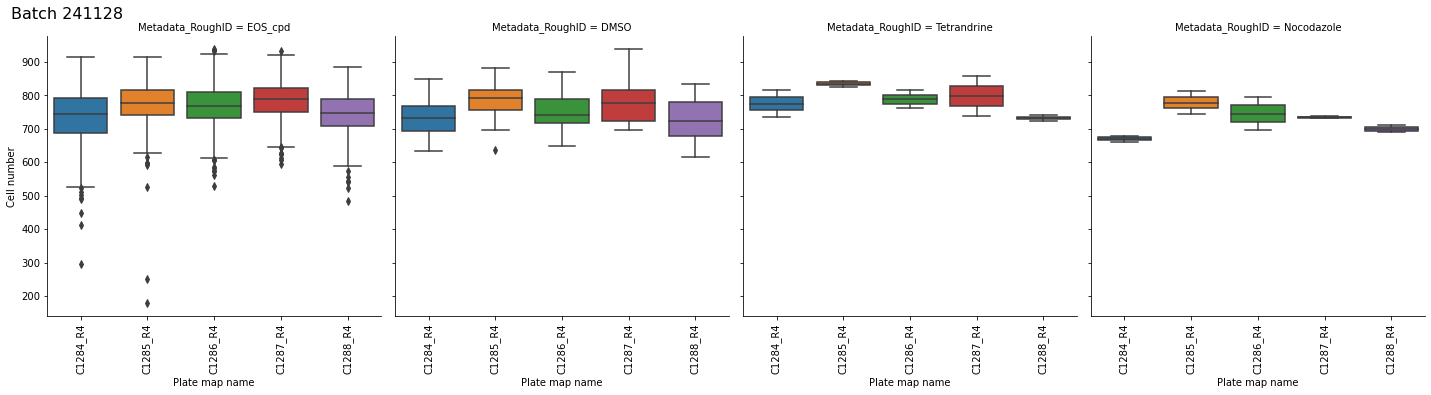

<Figure size 720x720 with 0 Axes>

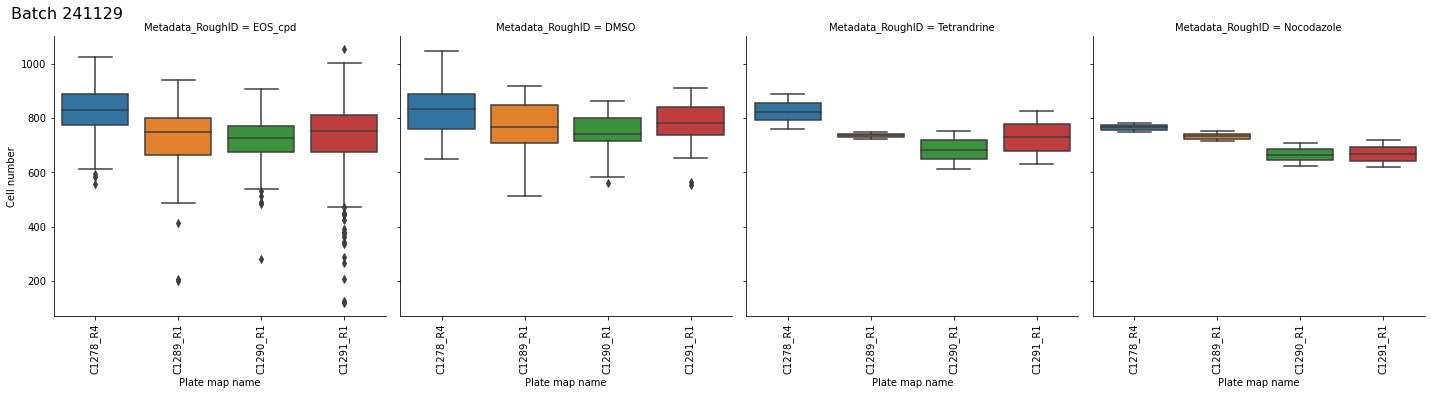

<Figure size 720x720 with 0 Axes>

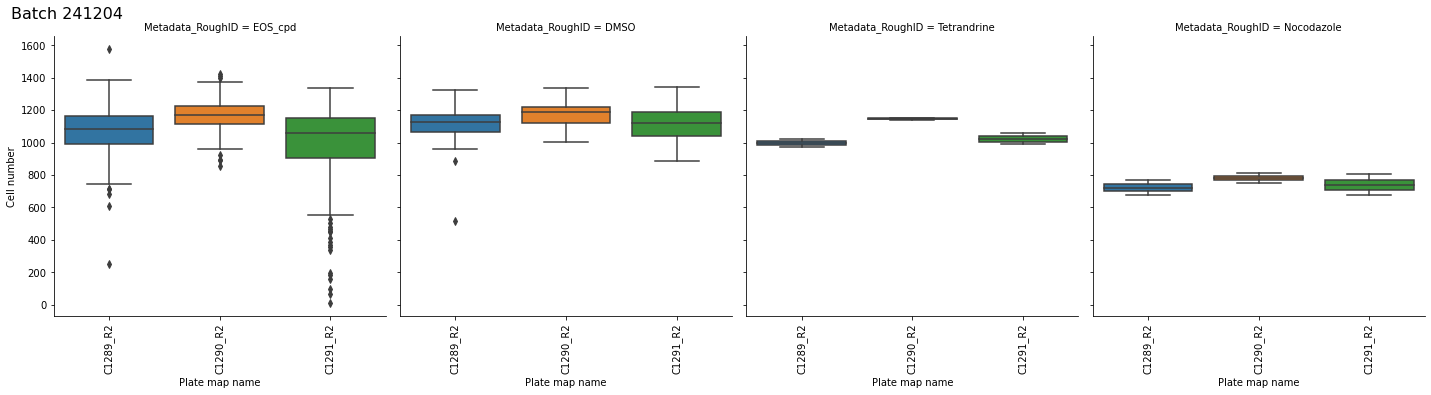

<Figure size 720x720 with 0 Axes>

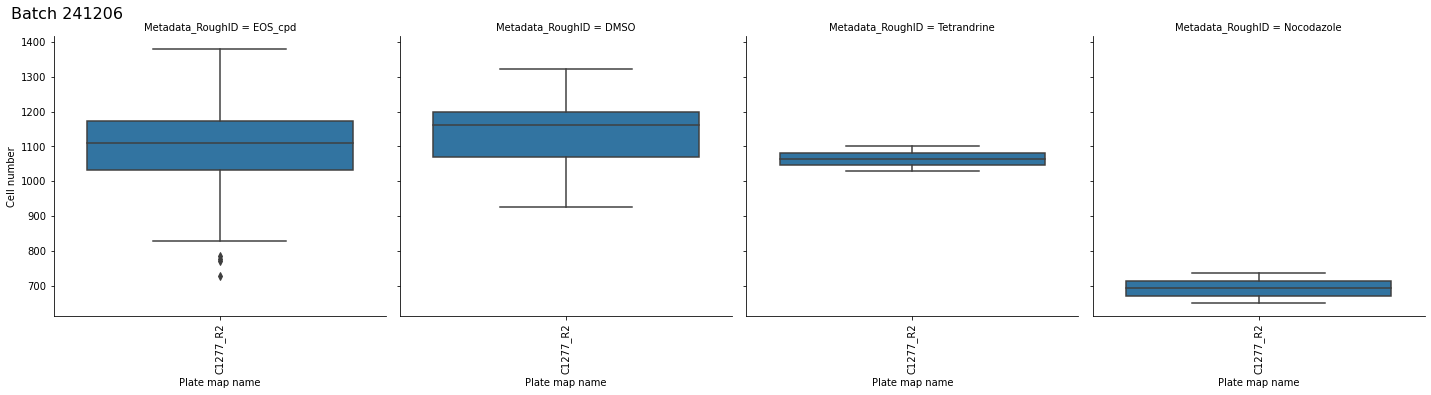

<Figure size 720x720 with 0 Axes>

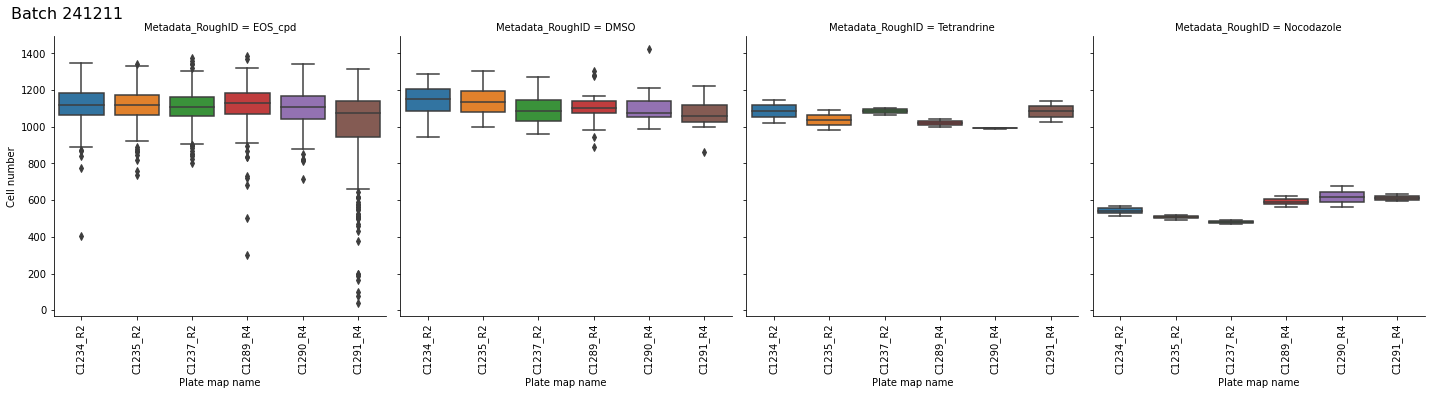

<Figure size 720x720 with 0 Axes>

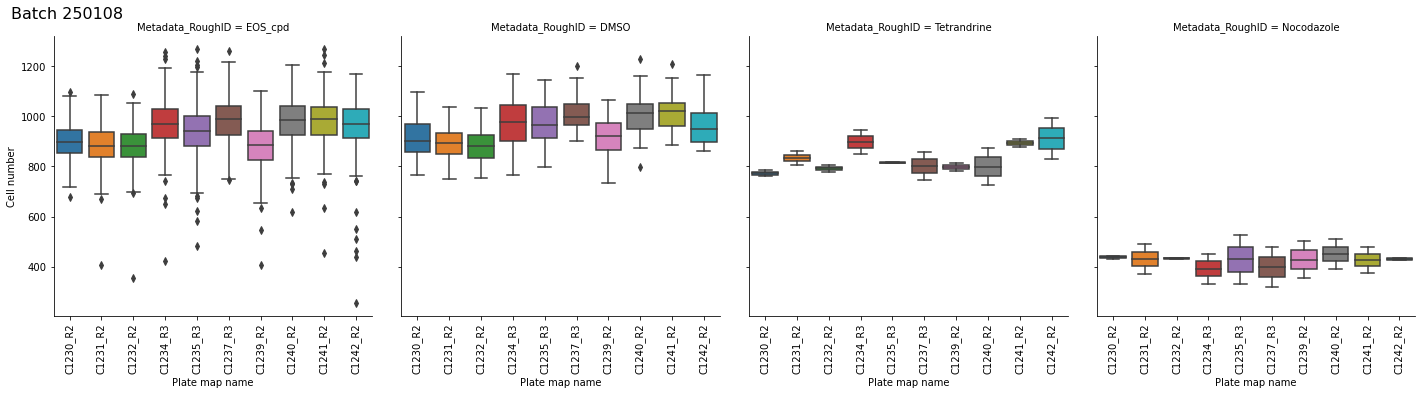

<Figure size 720x720 with 0 Axes>

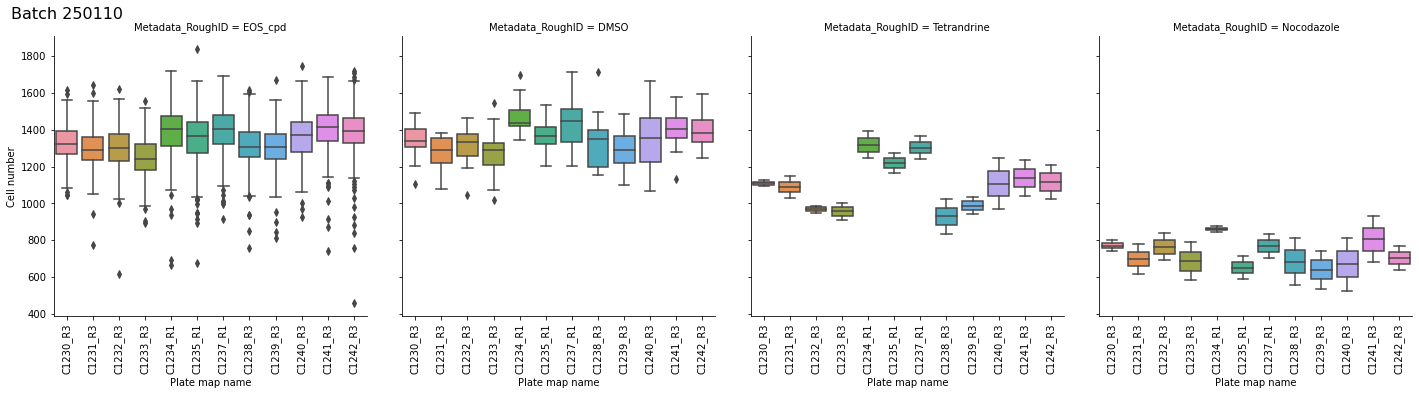

<Figure size 720x720 with 0 Axes>

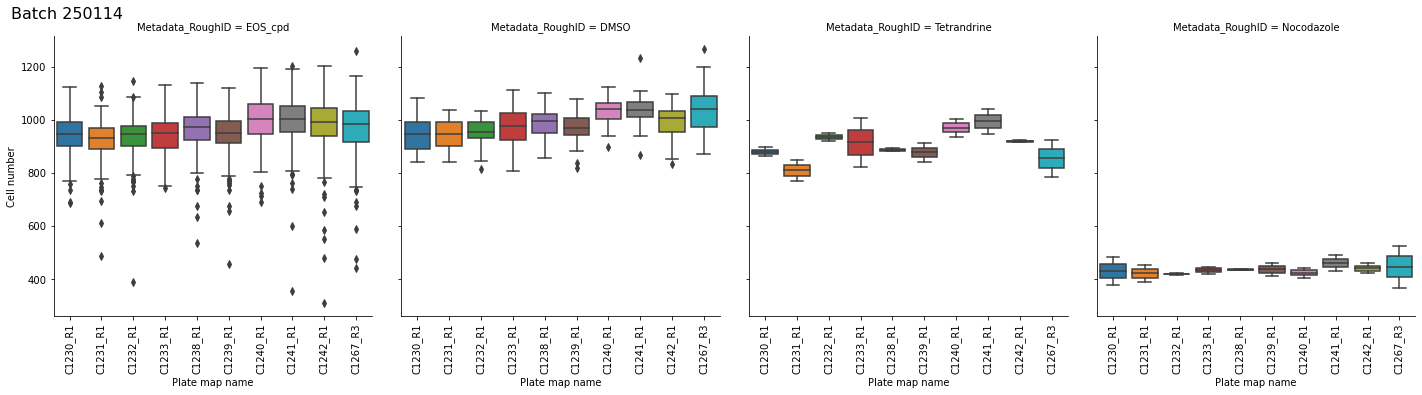

<Figure size 720x720 with 0 Axes>

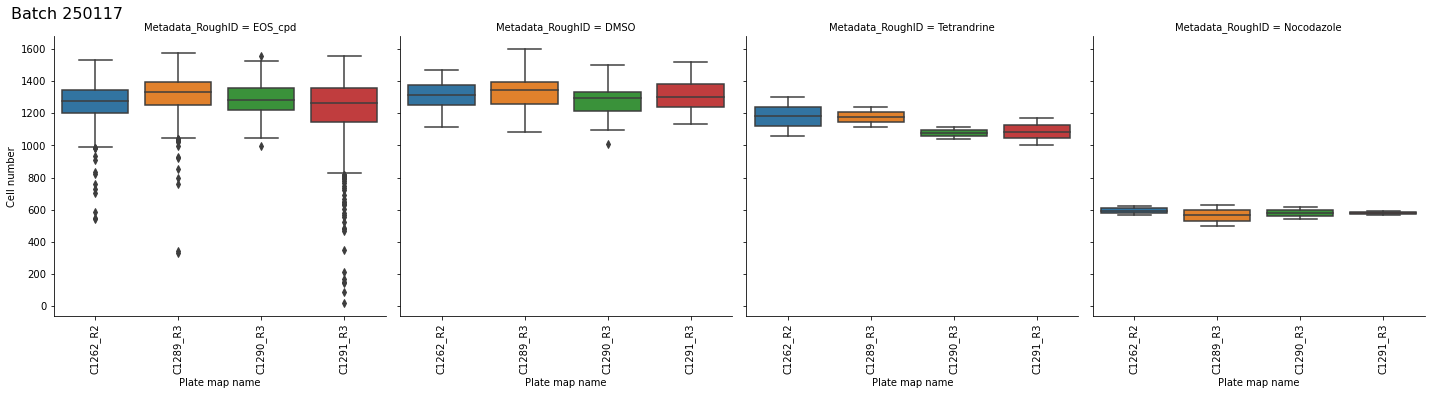

In [7]:
analyze_cell_number(Data_aggregated, 'IMTM')

Error: directory cannot be created


<ipython-input-6-3b17d2221bc7>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

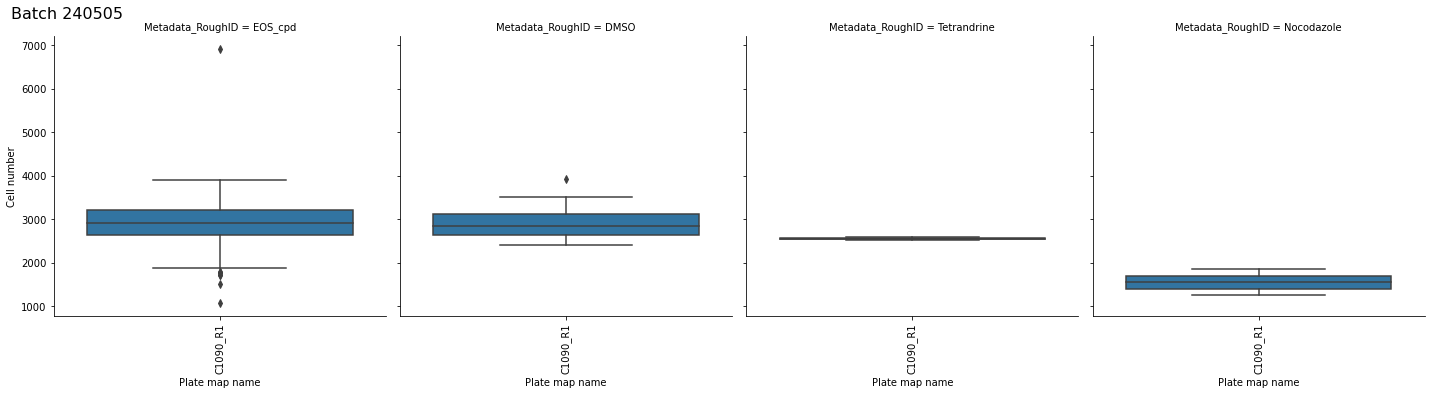

<Figure size 720x720 with 0 Axes>

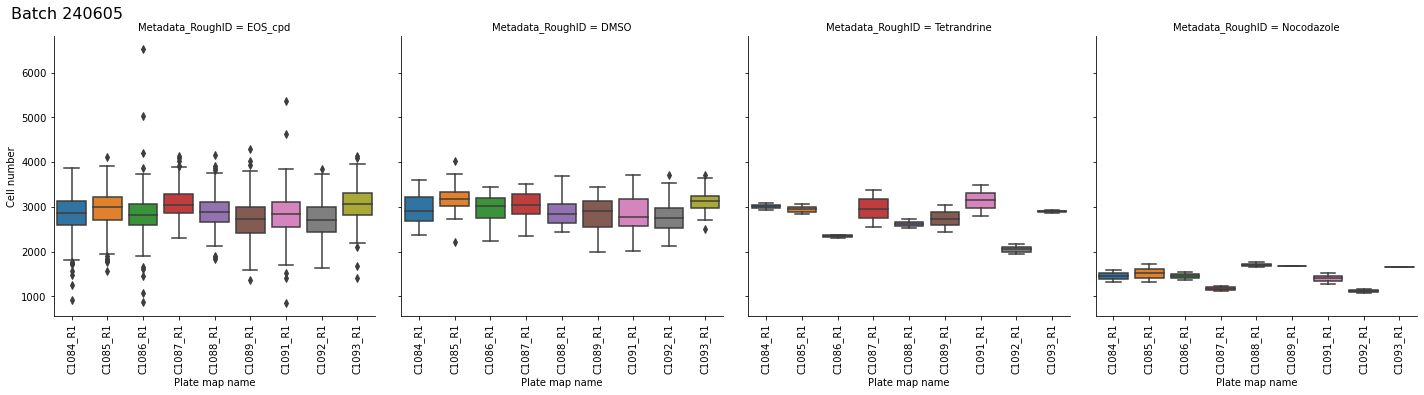

<Figure size 720x720 with 0 Axes>

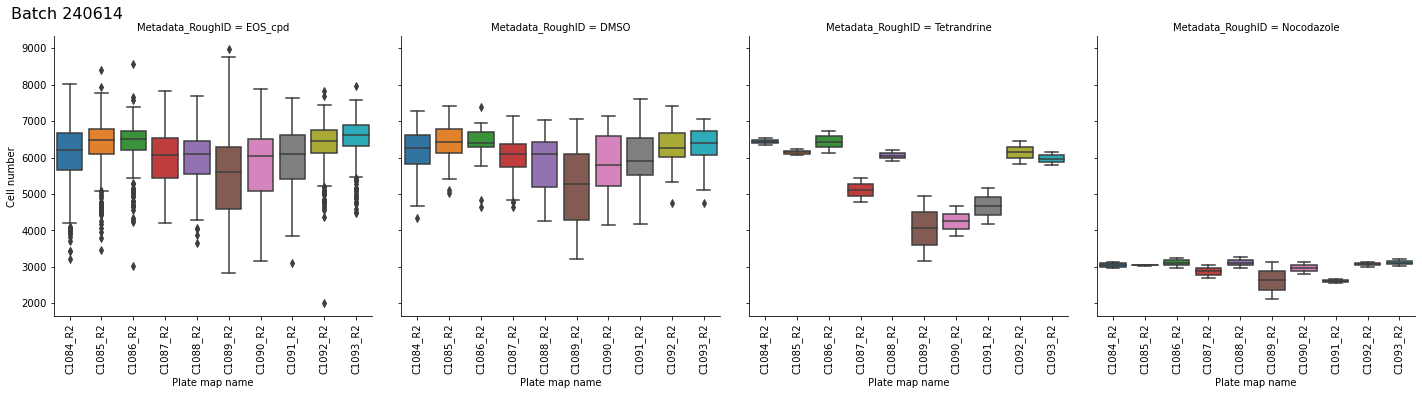

<Figure size 720x720 with 0 Axes>

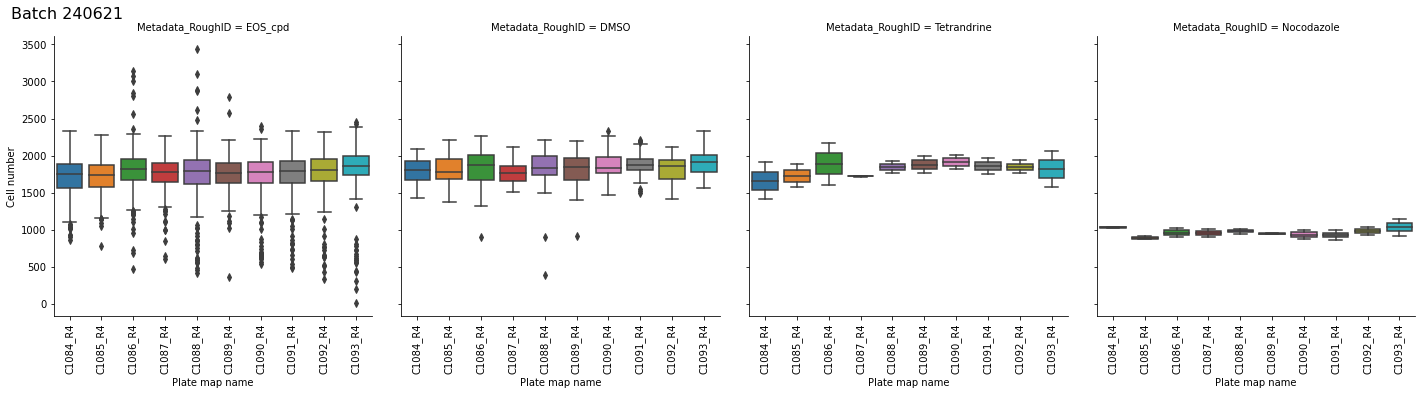

<Figure size 720x720 with 0 Axes>

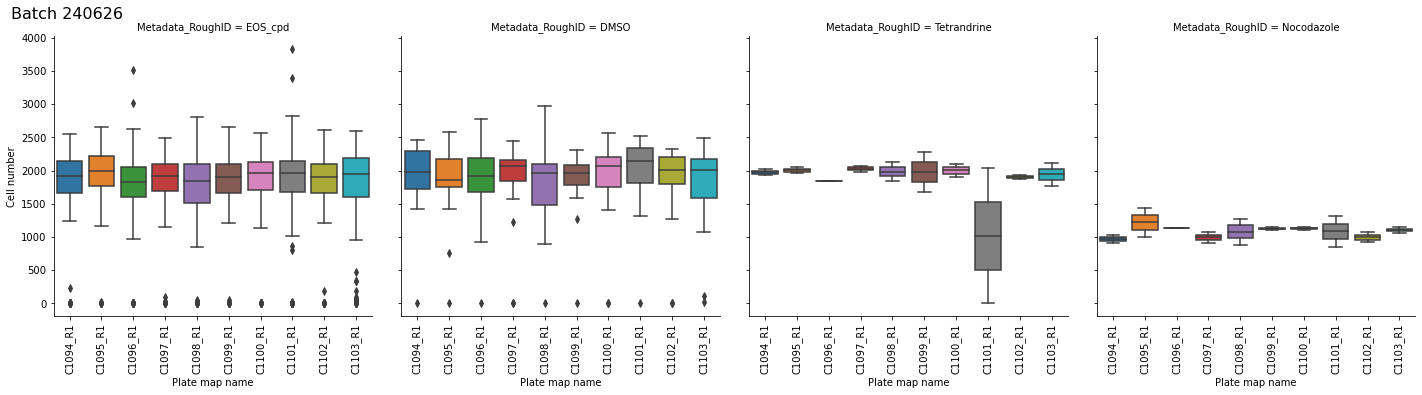

<Figure size 720x720 with 0 Axes>

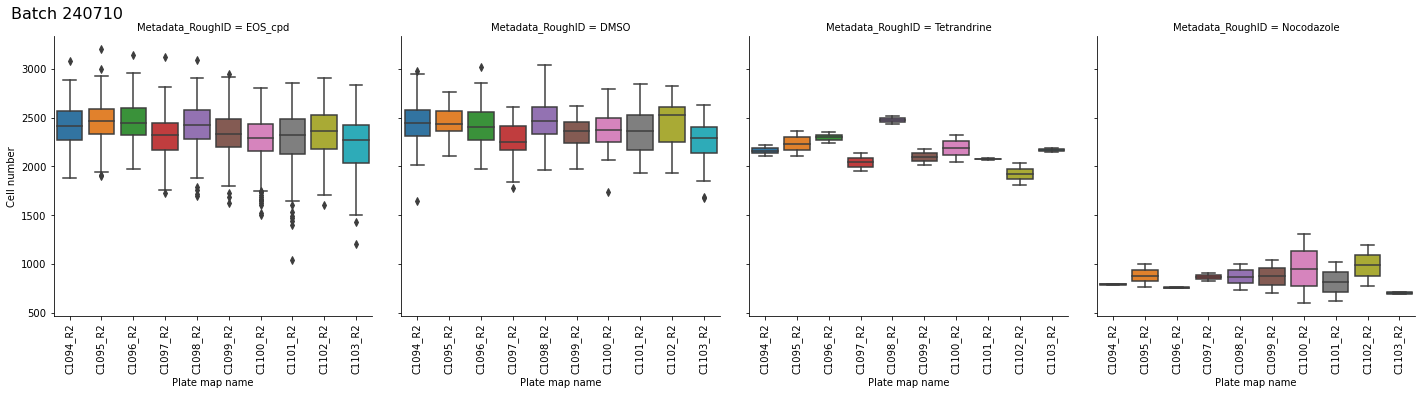

<Figure size 720x720 with 0 Axes>

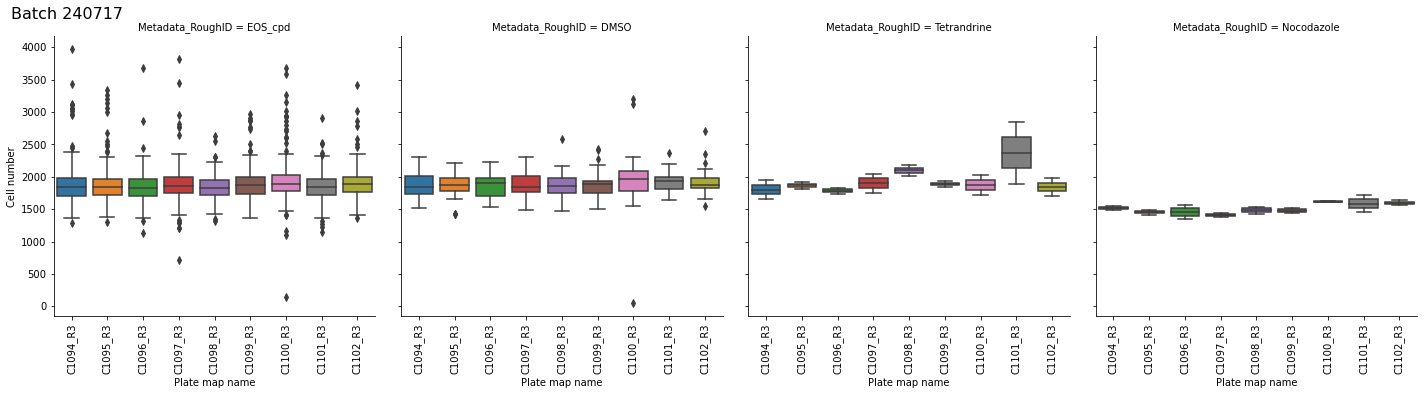

<Figure size 720x720 with 0 Axes>

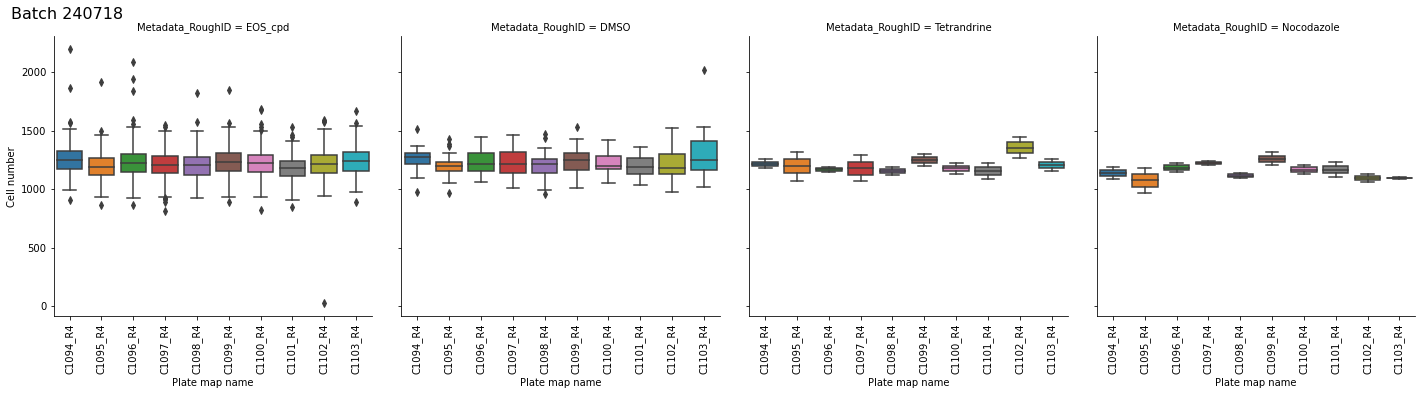

<Figure size 720x720 with 0 Axes>

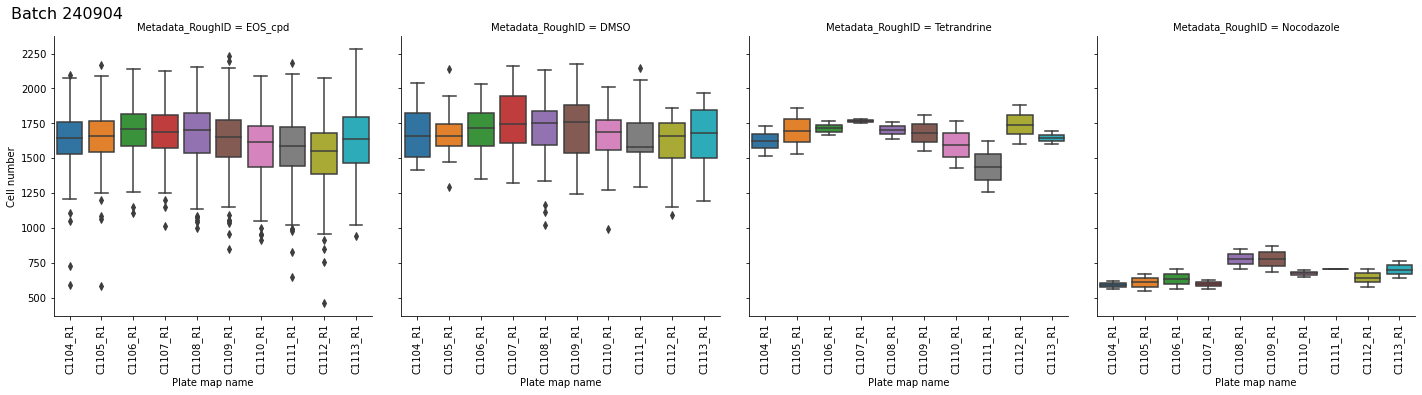

<Figure size 720x720 with 0 Axes>

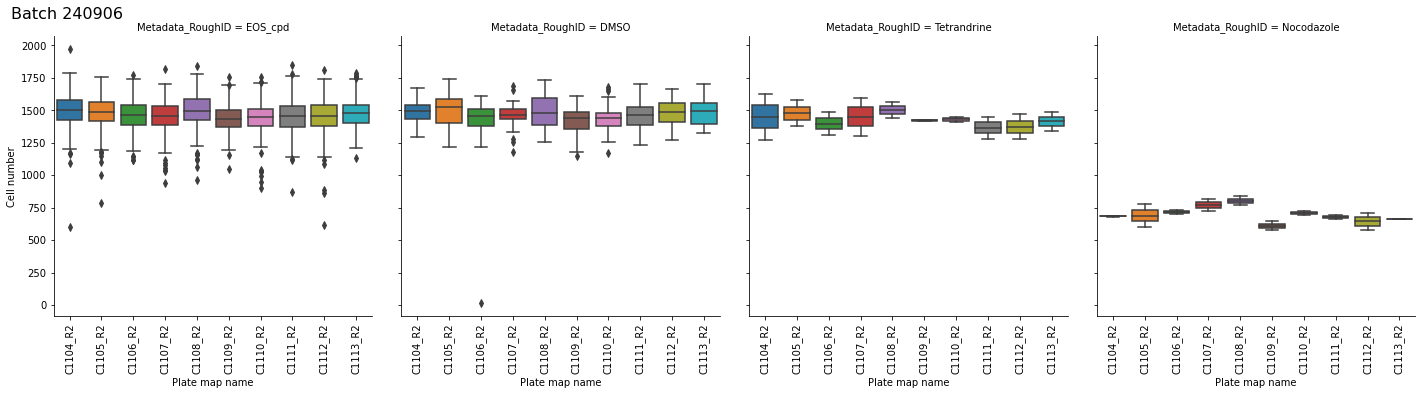

<Figure size 720x720 with 0 Axes>

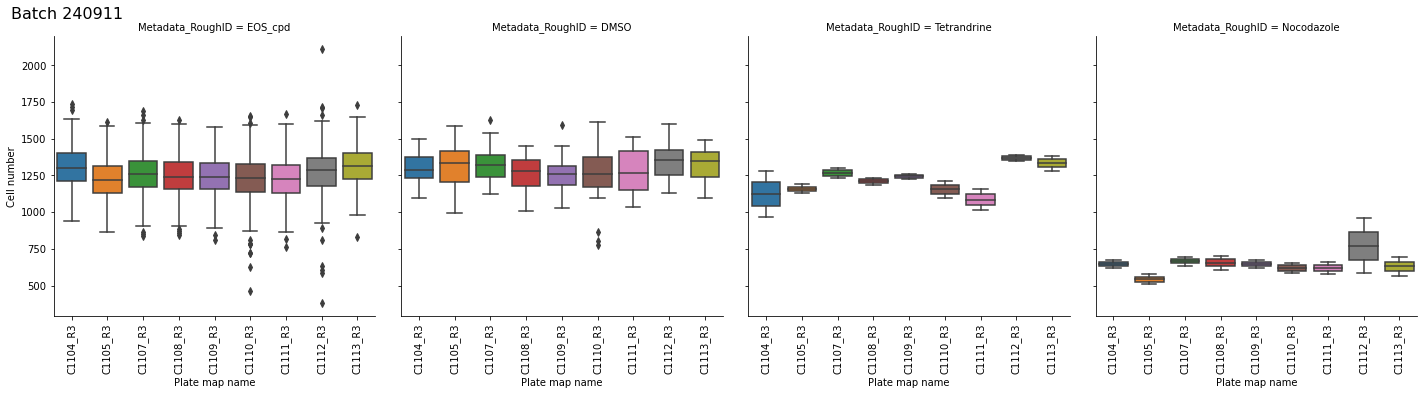

<Figure size 720x720 with 0 Axes>

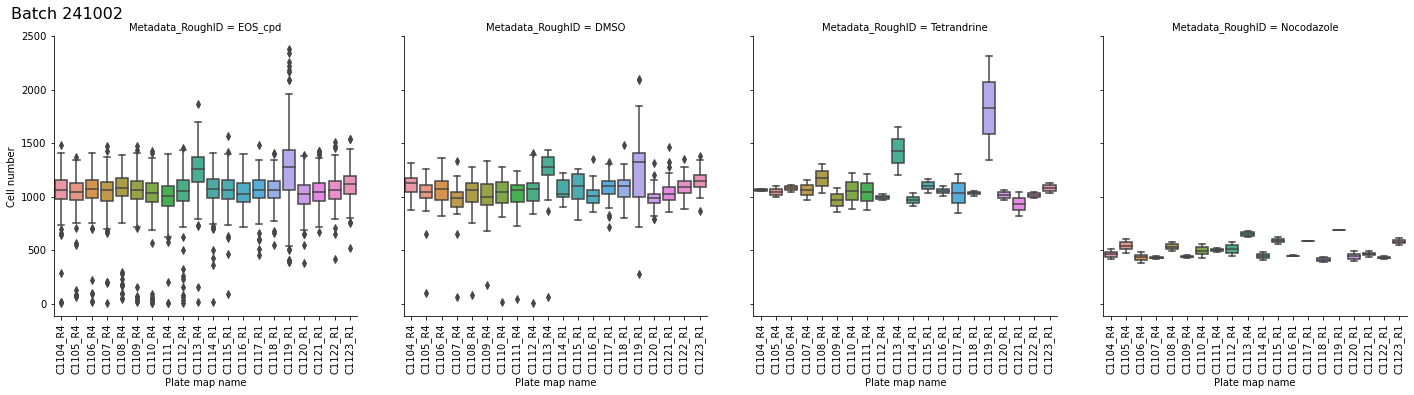

<Figure size 720x720 with 0 Axes>

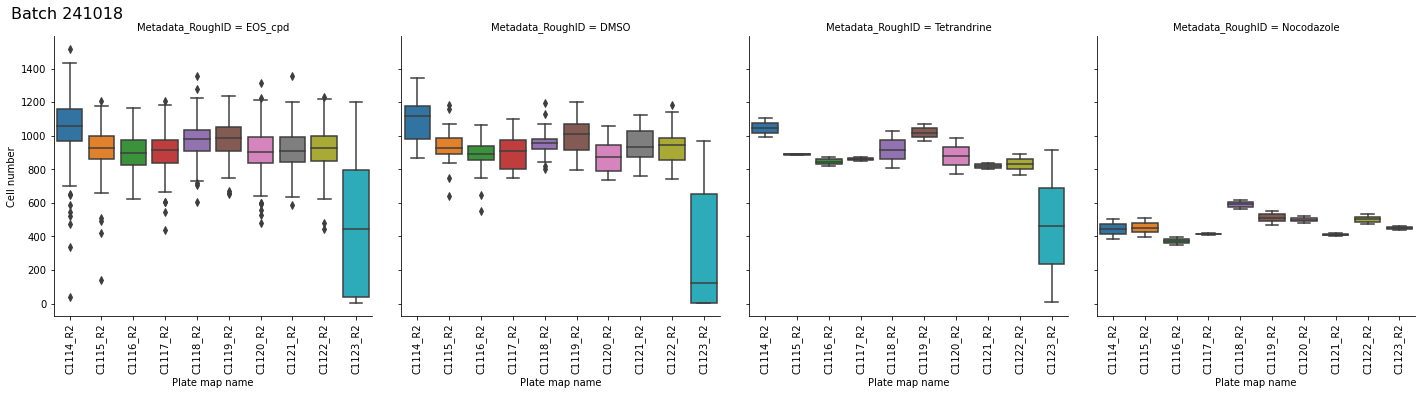

<Figure size 720x720 with 0 Axes>

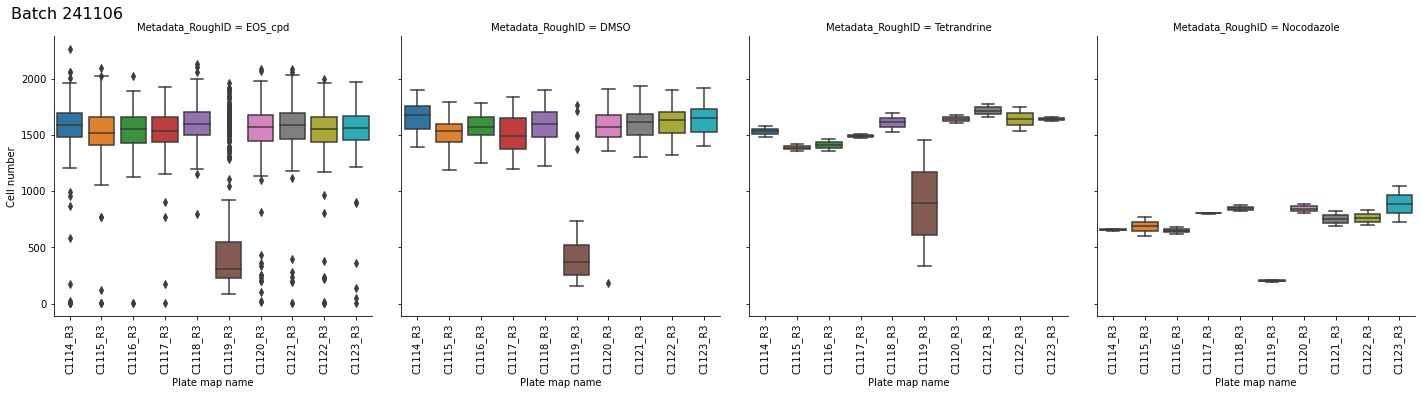

<Figure size 720x720 with 0 Axes>

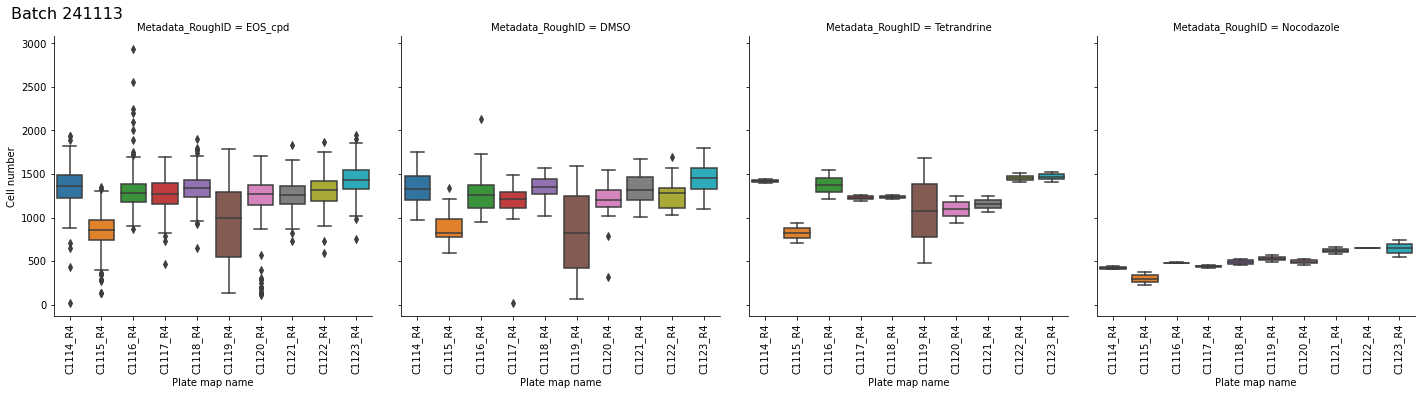

<Figure size 720x720 with 0 Axes>

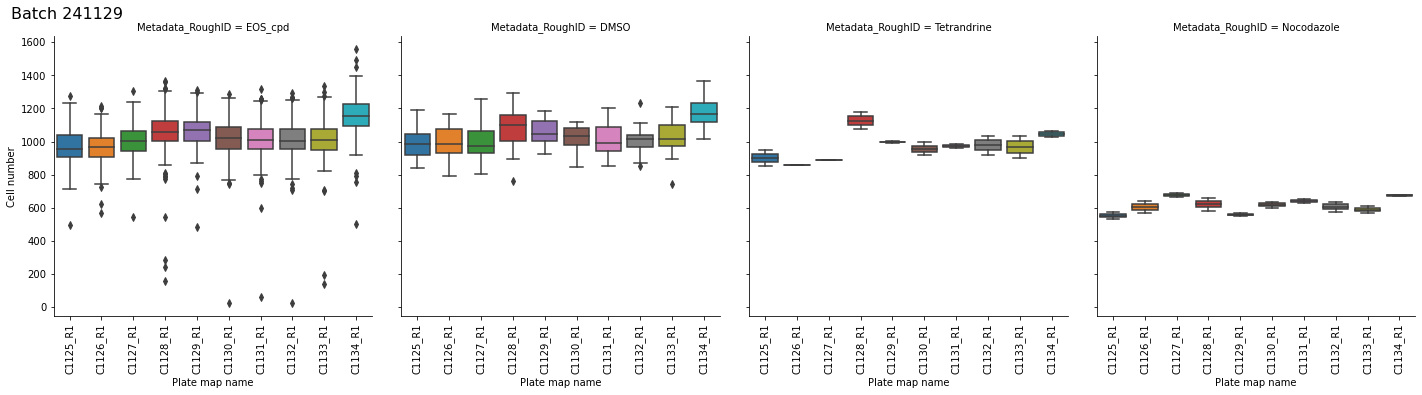

<Figure size 720x720 with 0 Axes>

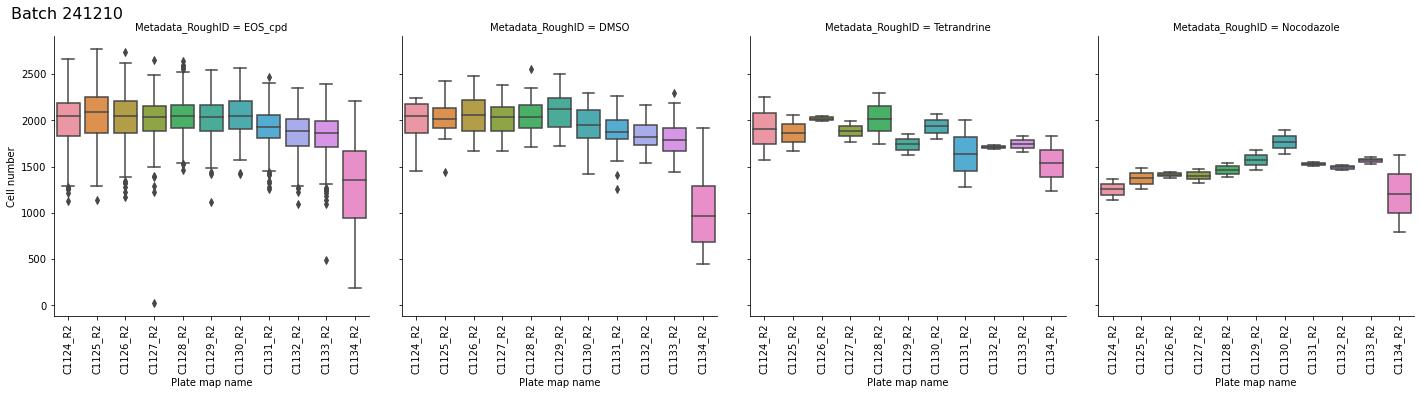

<Figure size 720x720 with 0 Axes>

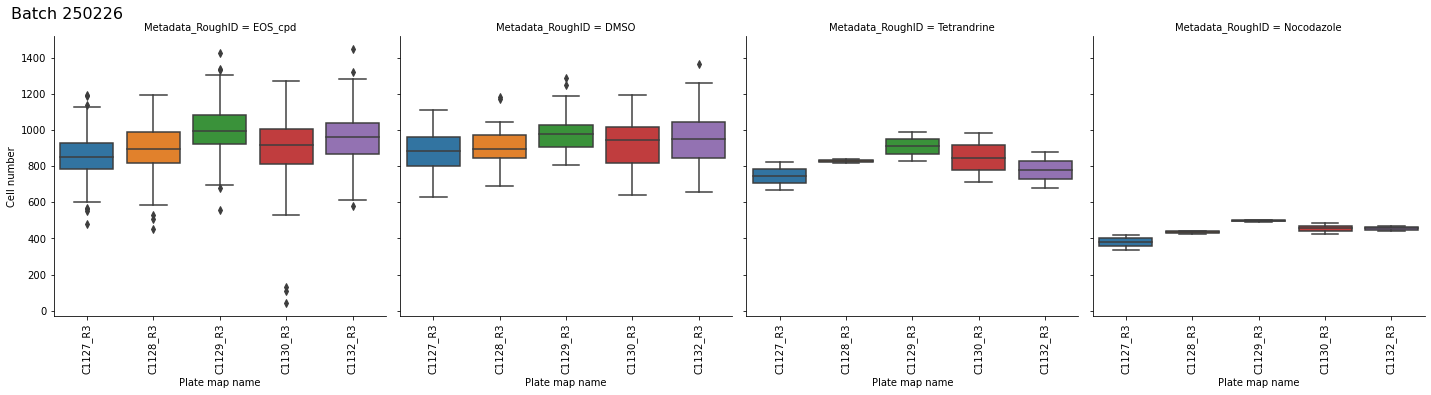

<Figure size 720x720 with 0 Axes>

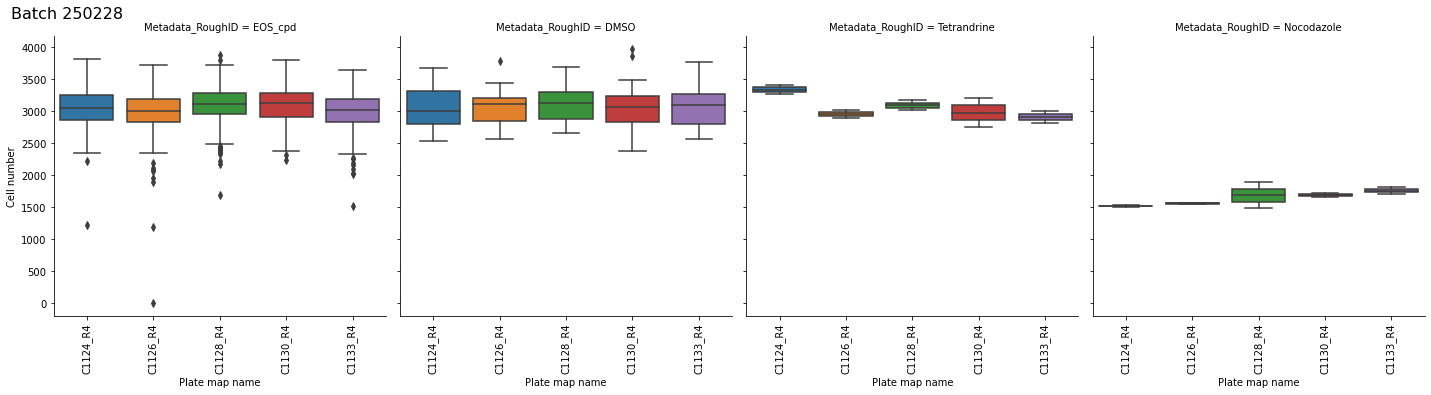

In [8]:
analyze_cell_number(Data_aggregated, 'FMP')


Error: directory cannot be created


<ipython-input-6-3b17d2221bc7>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

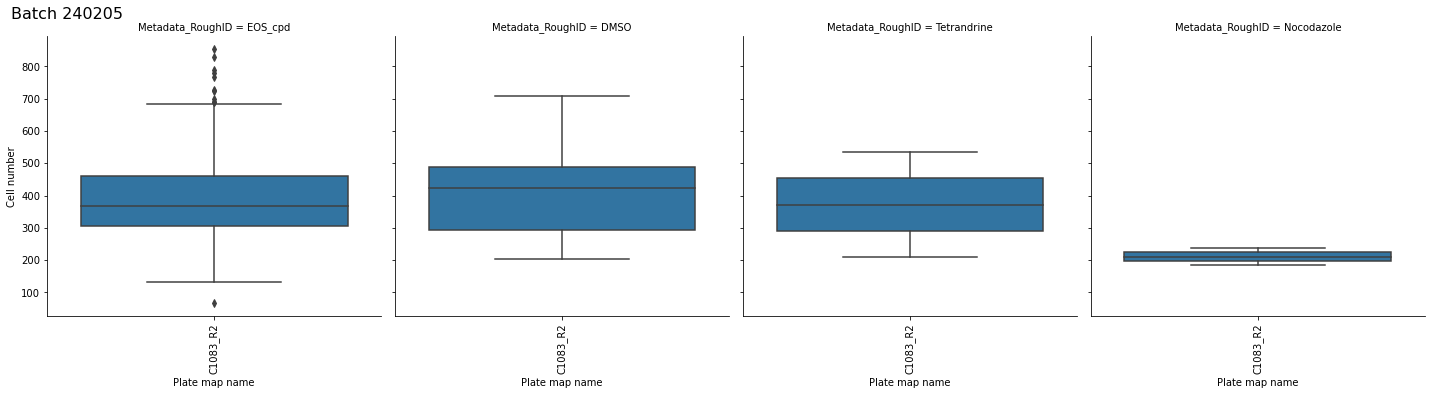

<Figure size 720x720 with 0 Axes>

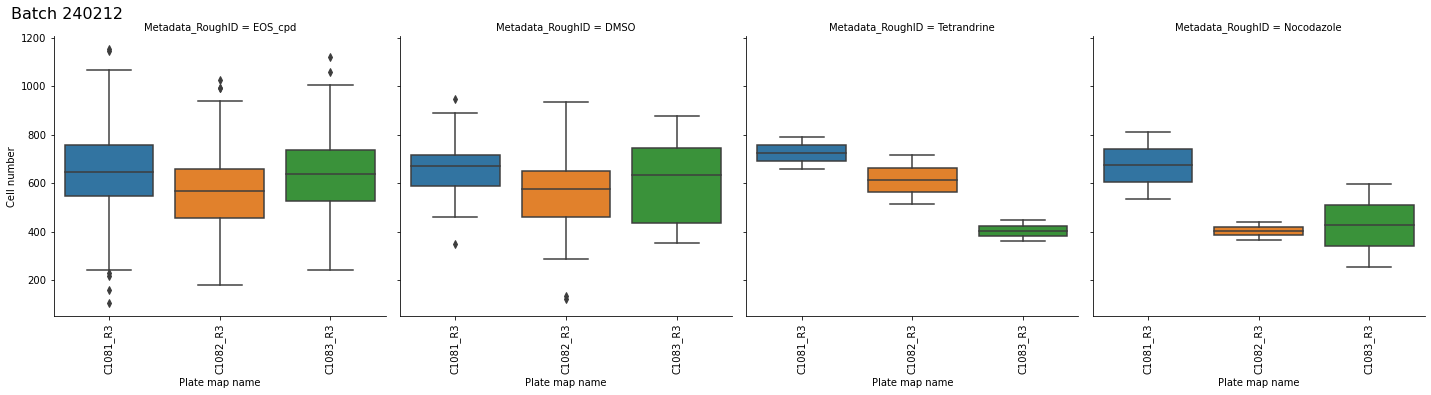

<Figure size 720x720 with 0 Axes>

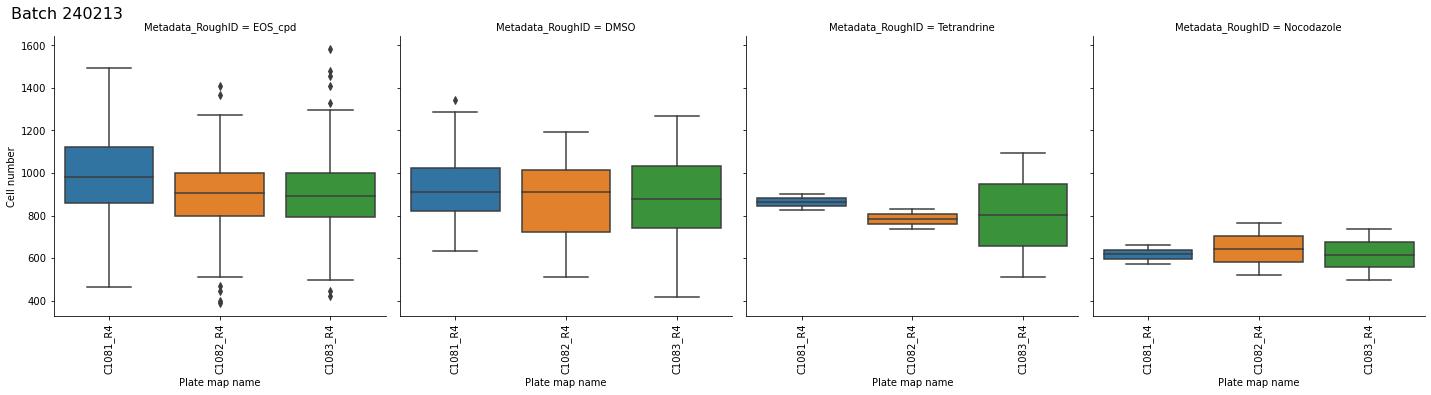

<Figure size 720x720 with 0 Axes>

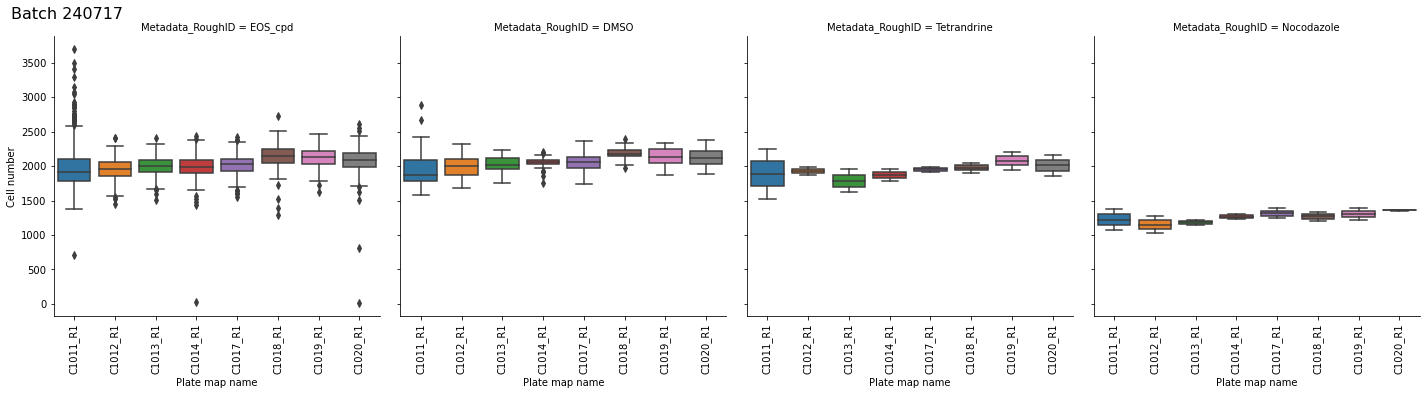

<Figure size 720x720 with 0 Axes>

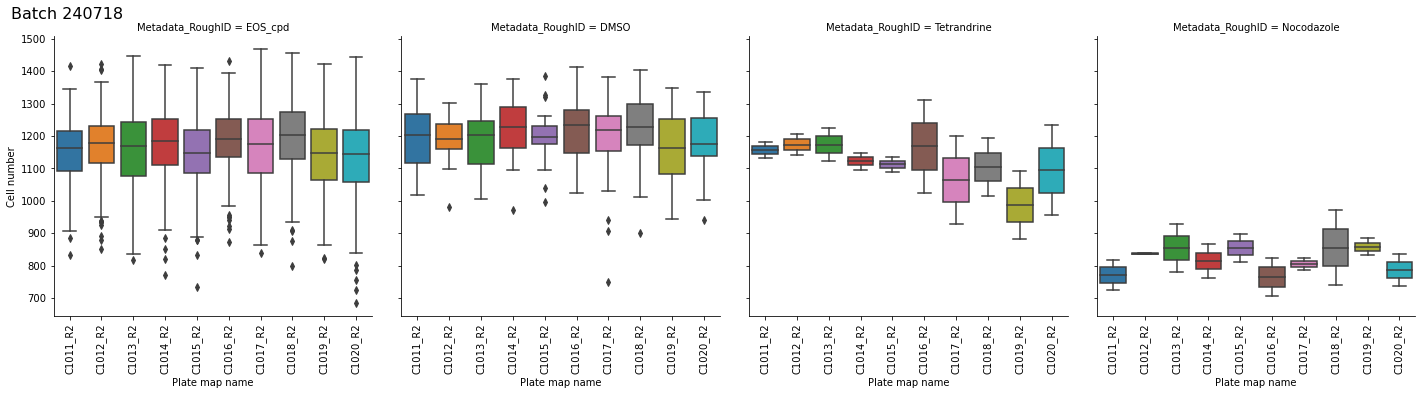

<Figure size 720x720 with 0 Axes>

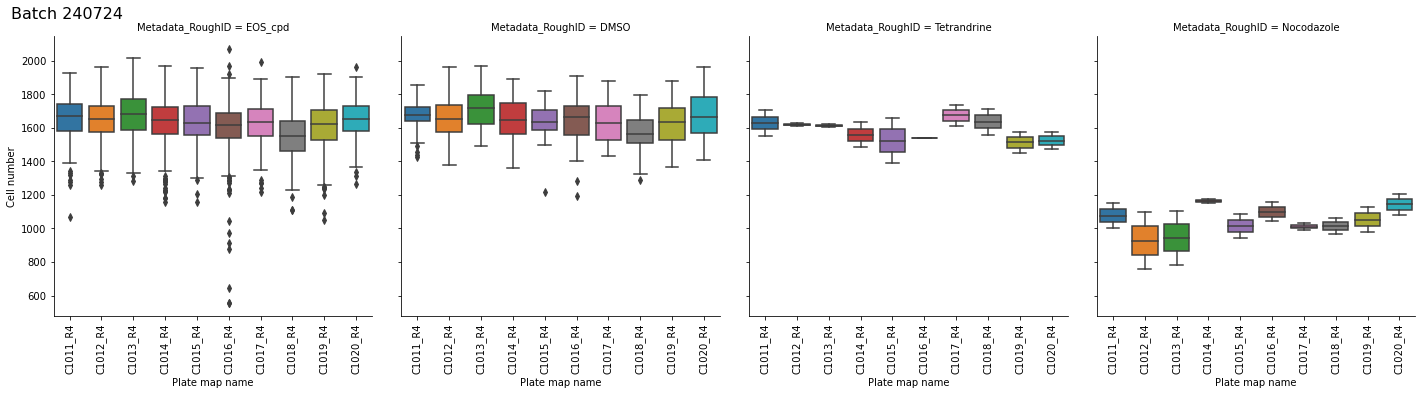

<Figure size 720x720 with 0 Axes>

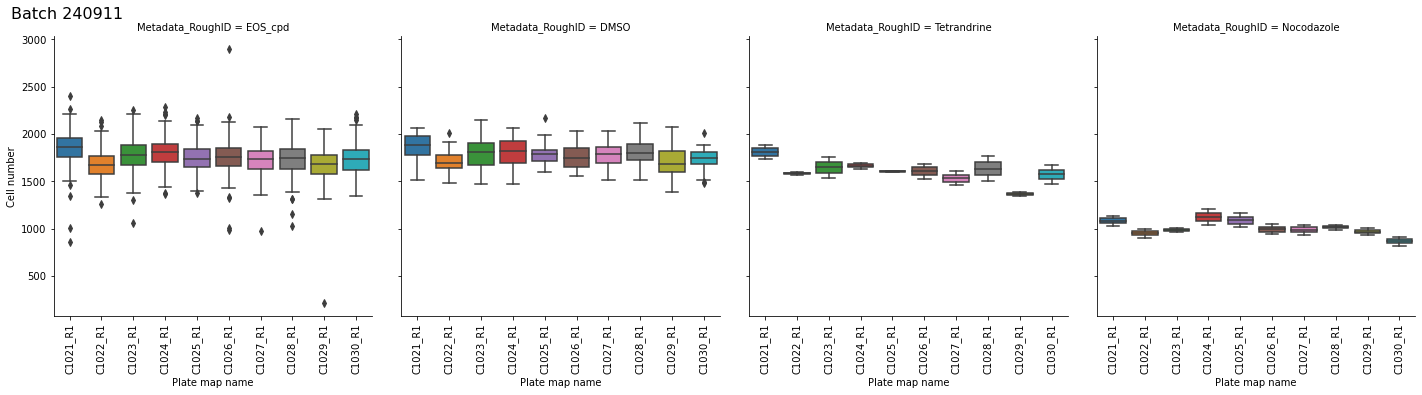

<Figure size 720x720 with 0 Axes>

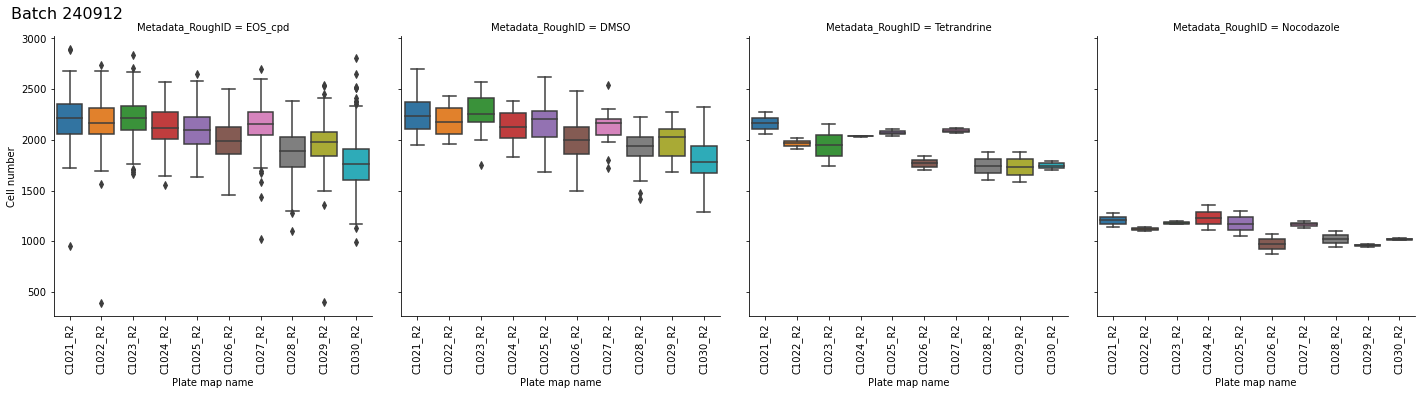

<Figure size 720x720 with 0 Axes>

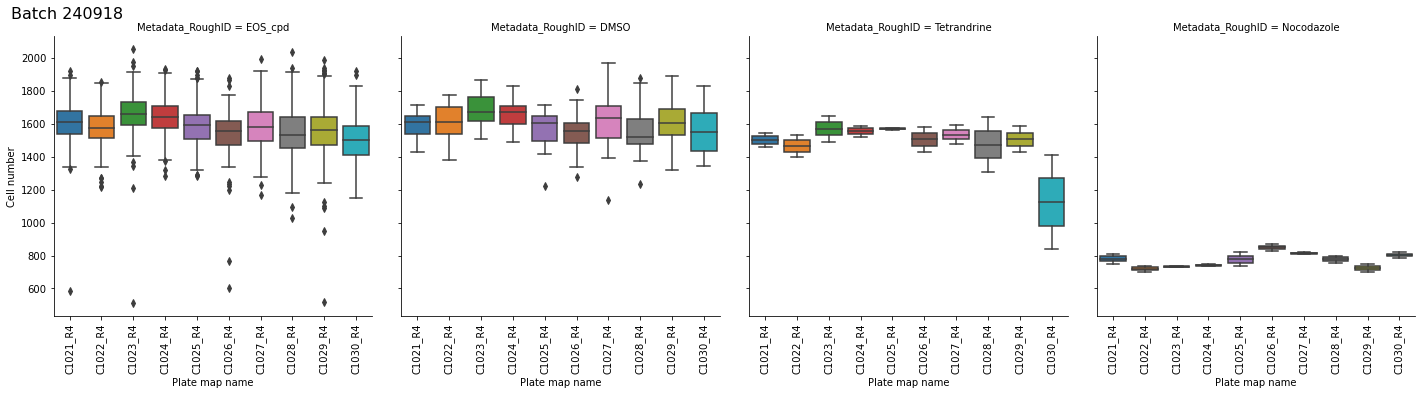

<Figure size 720x720 with 0 Axes>

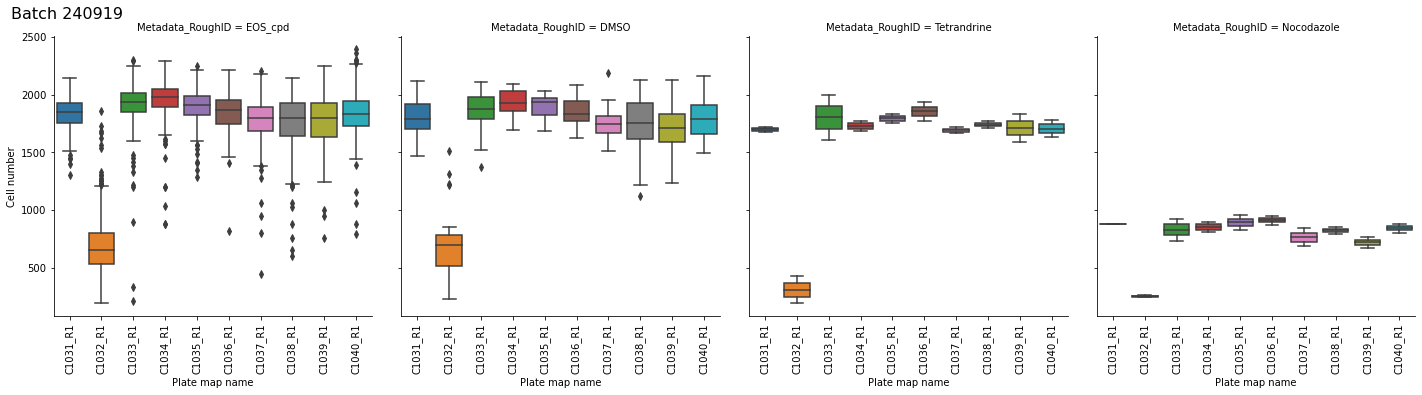

<Figure size 720x720 with 0 Axes>

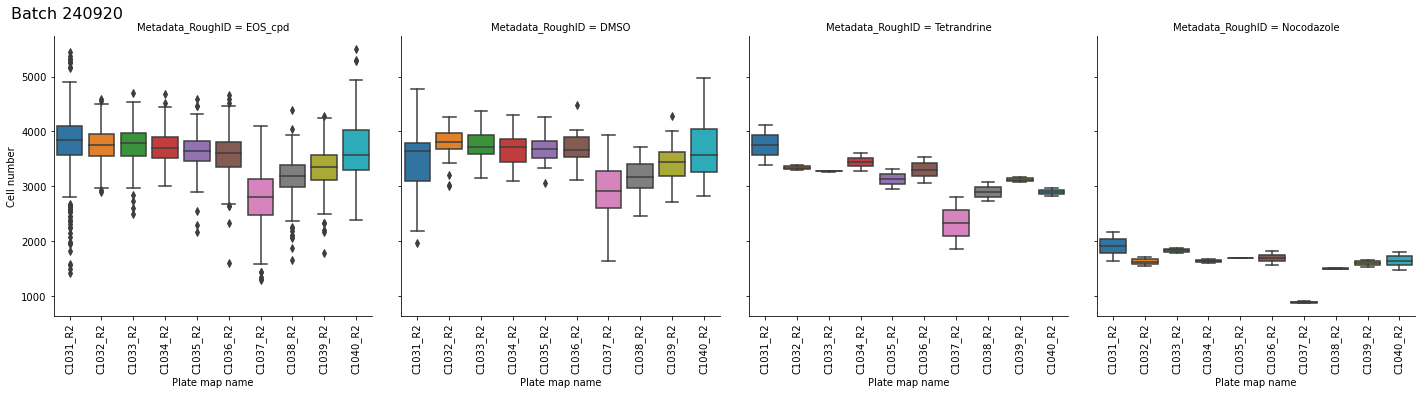

<Figure size 720x720 with 0 Axes>

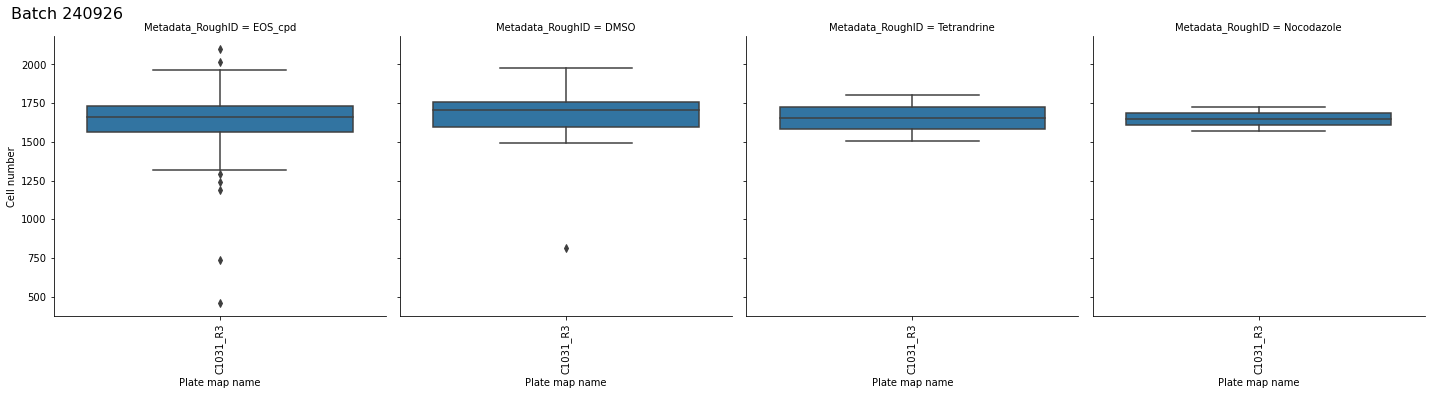

<Figure size 720x720 with 0 Axes>

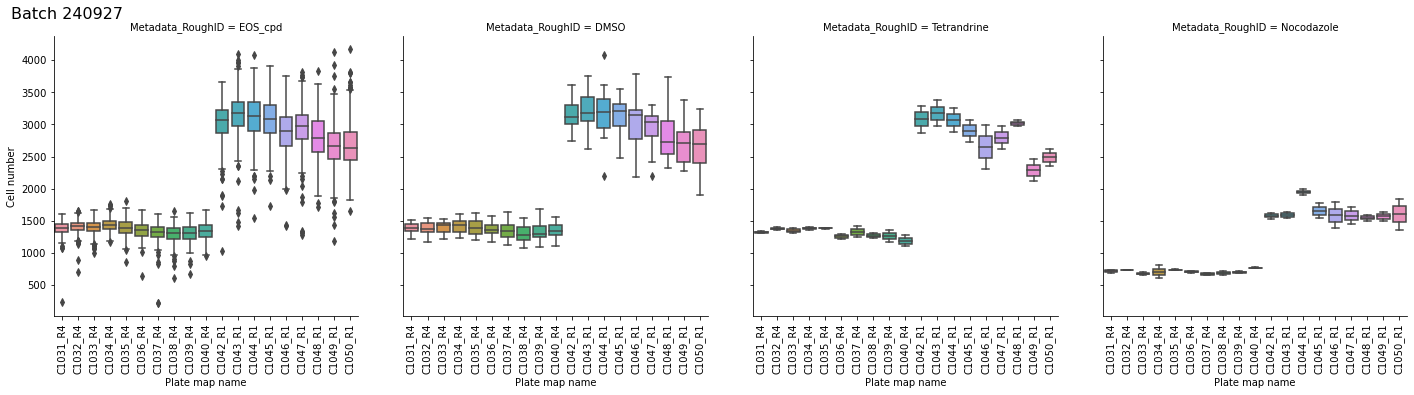

<Figure size 720x720 with 0 Axes>

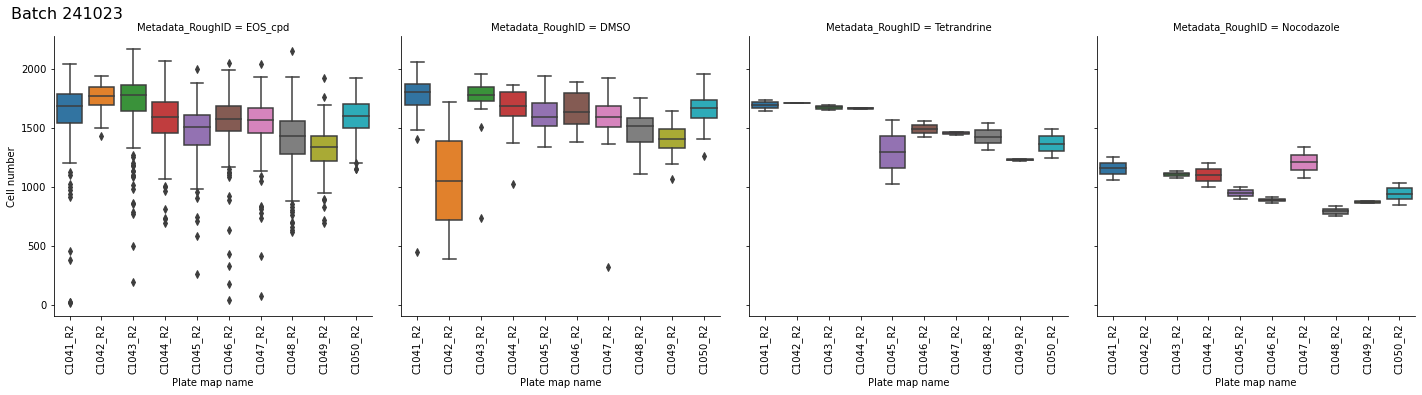

<Figure size 720x720 with 0 Axes>

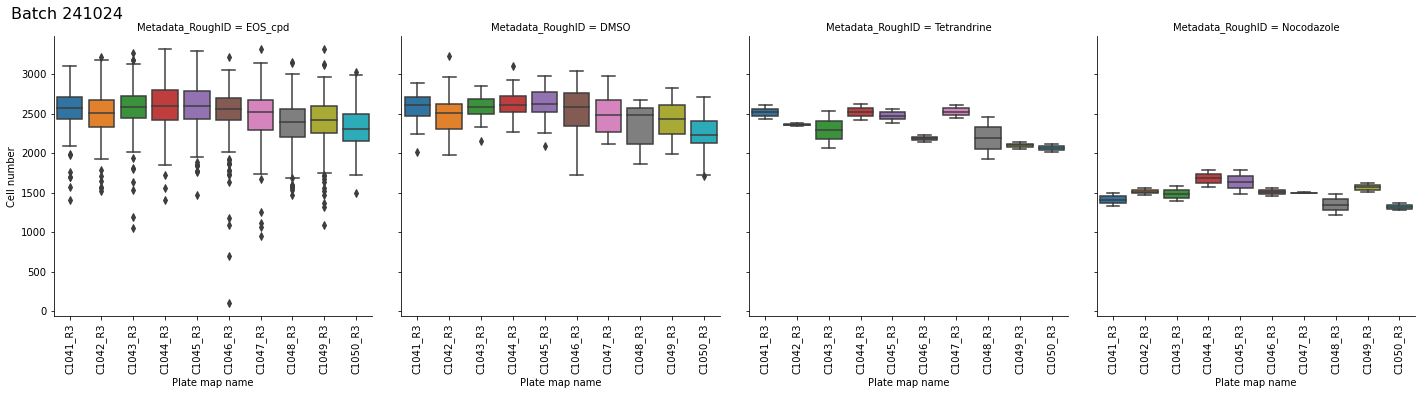

<Figure size 720x720 with 0 Axes>

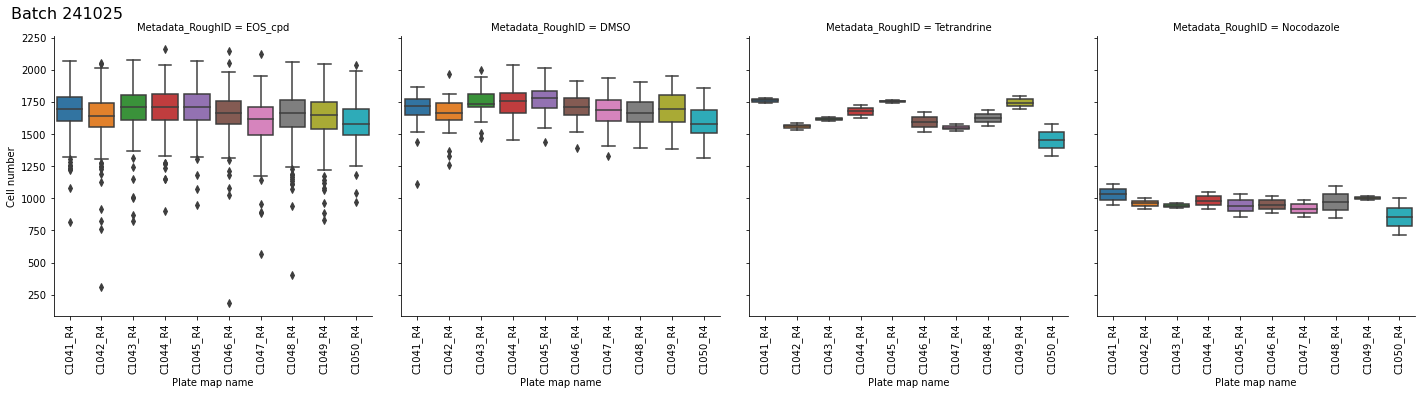

<Figure size 720x720 with 0 Axes>

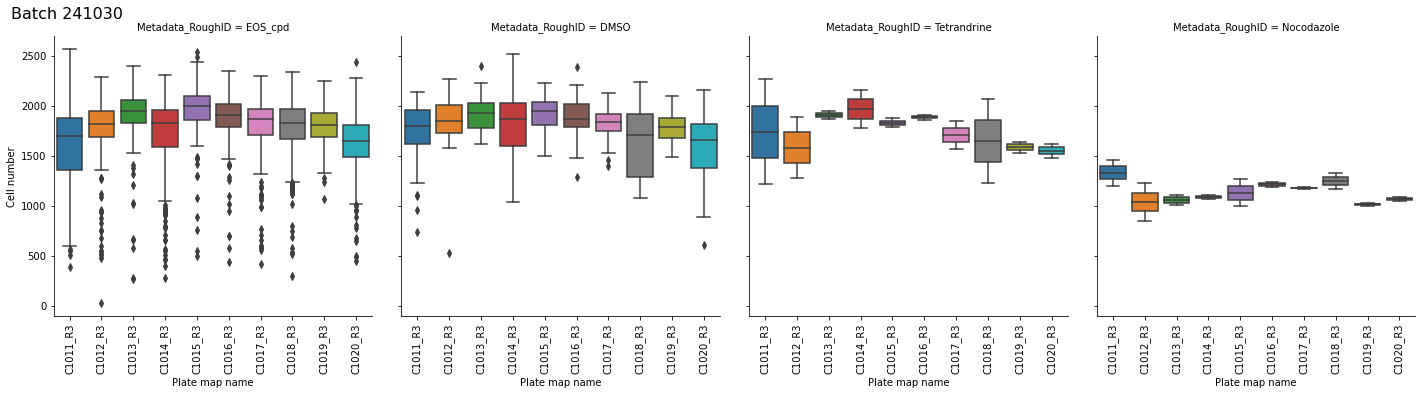

<Figure size 720x720 with 0 Axes>

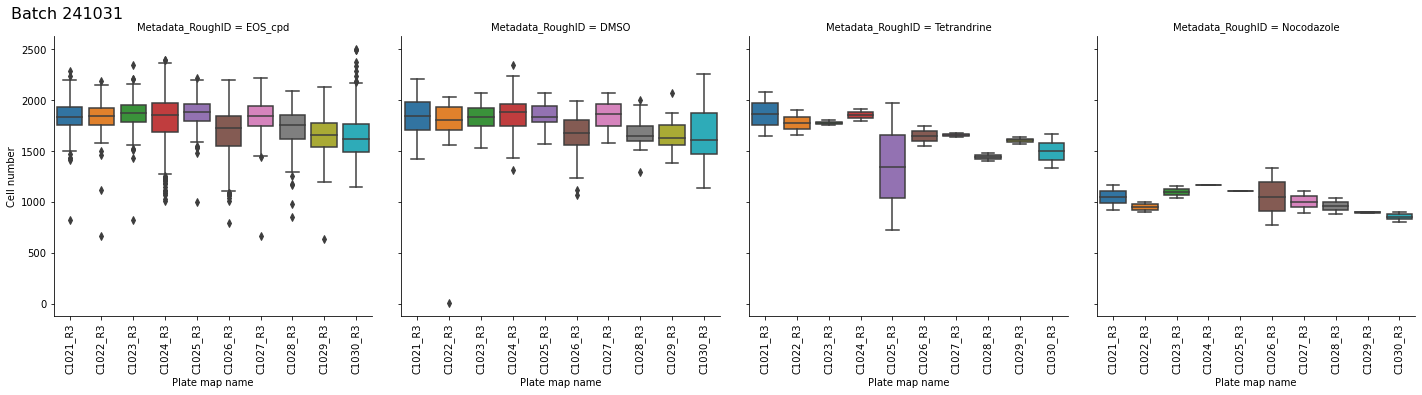

<Figure size 720x720 with 0 Axes>

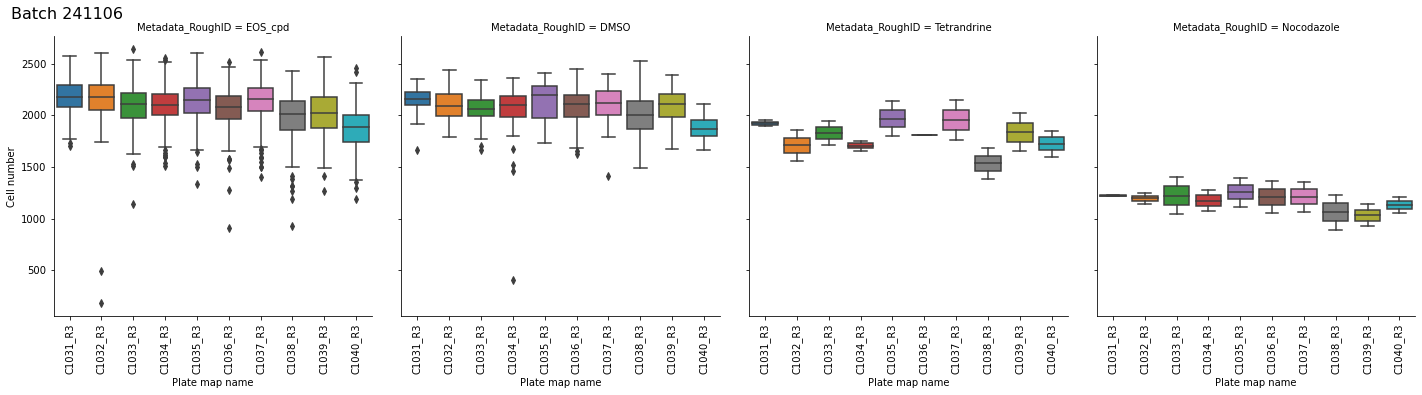

<Figure size 720x720 with 0 Axes>

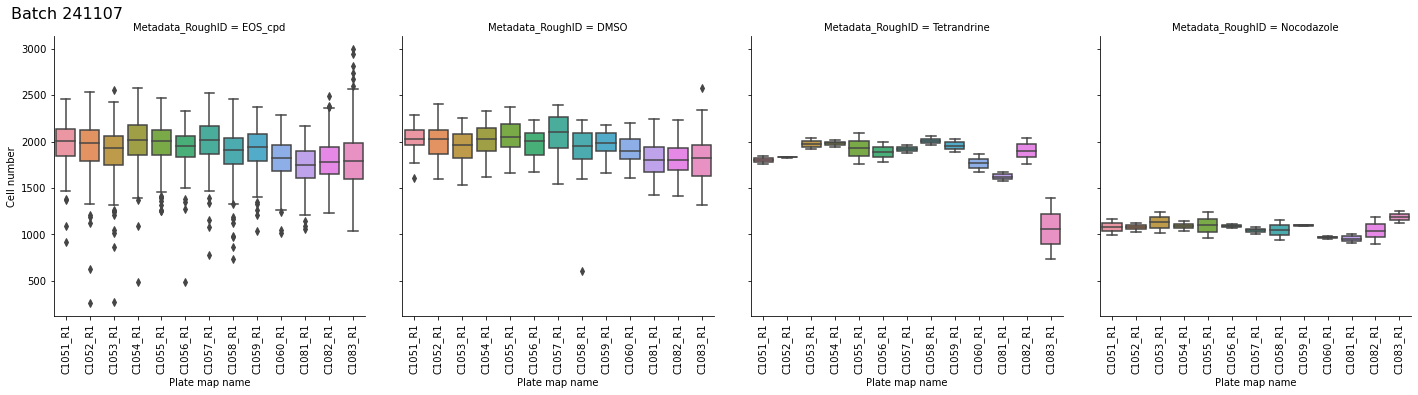

<Figure size 720x720 with 0 Axes>

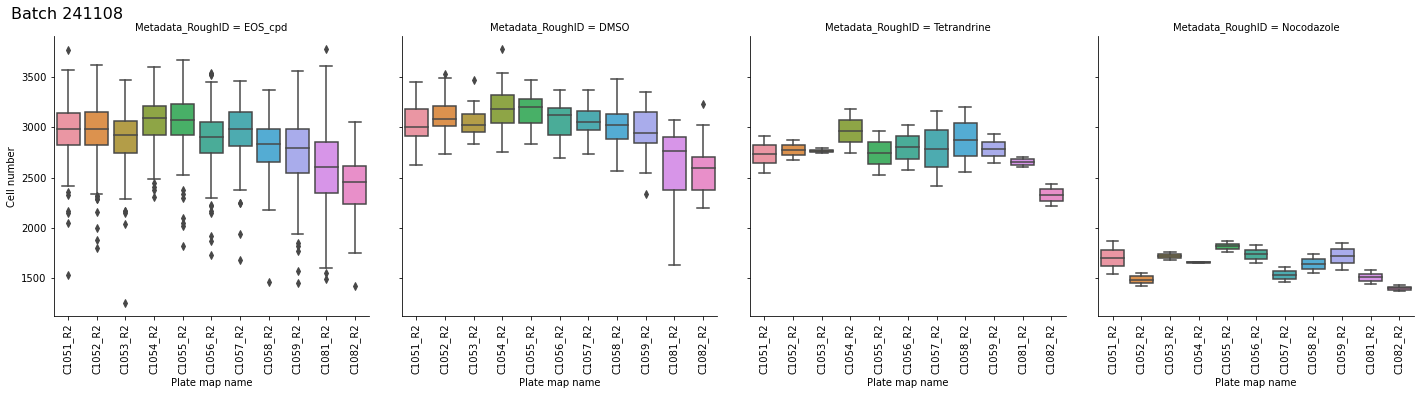

<Figure size 720x720 with 0 Axes>

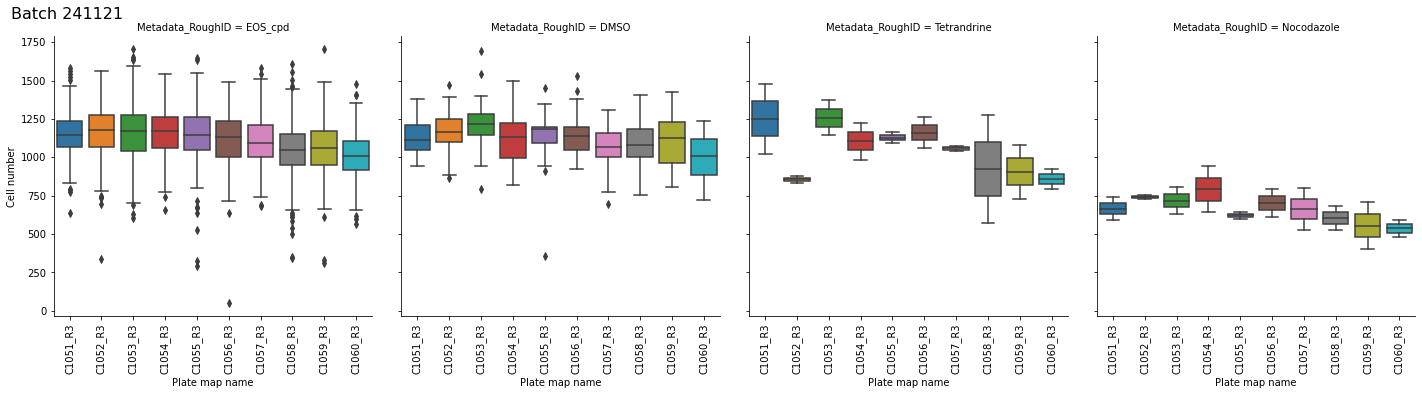

<Figure size 720x720 with 0 Axes>

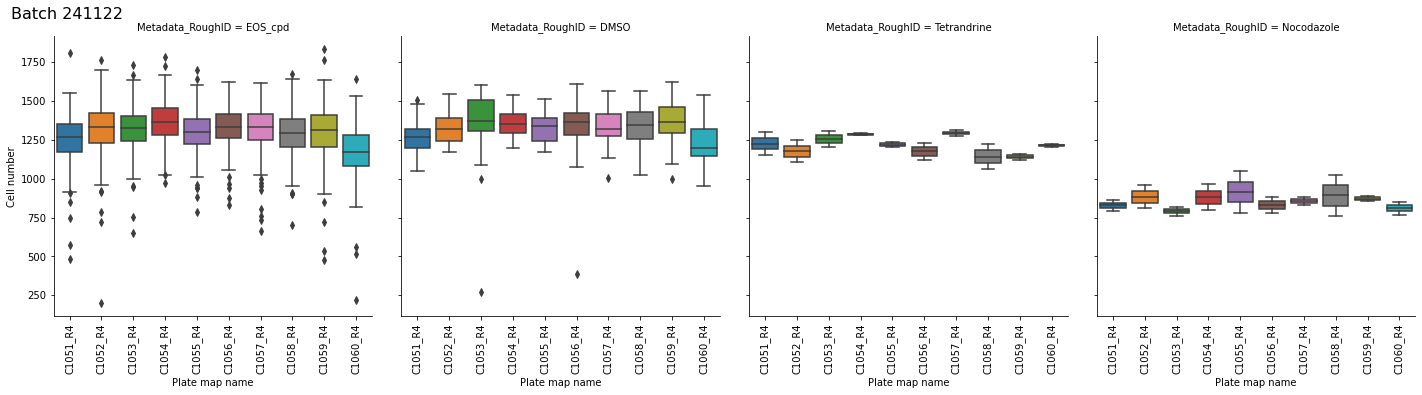

<Figure size 720x720 with 0 Axes>

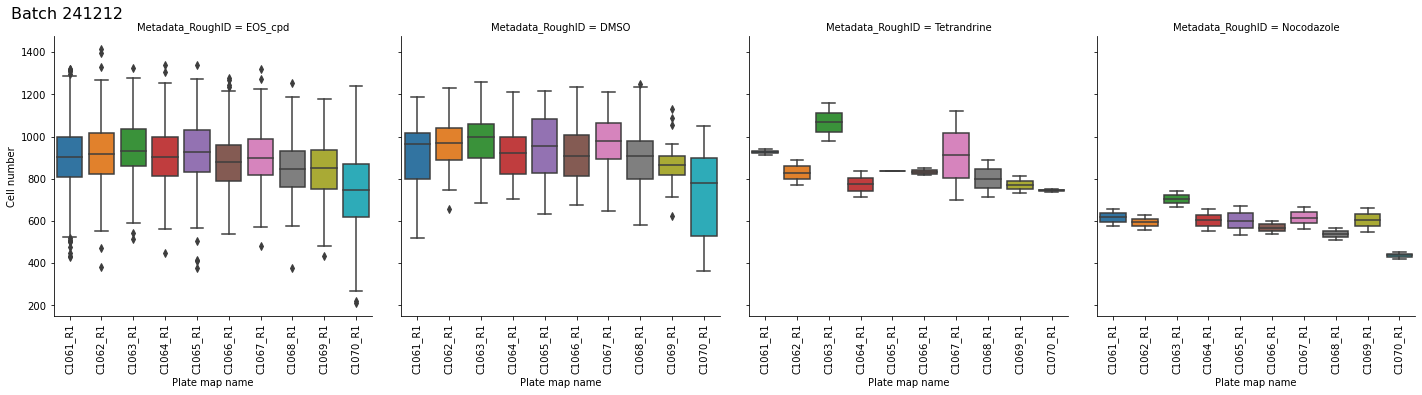

<Figure size 720x720 with 0 Axes>

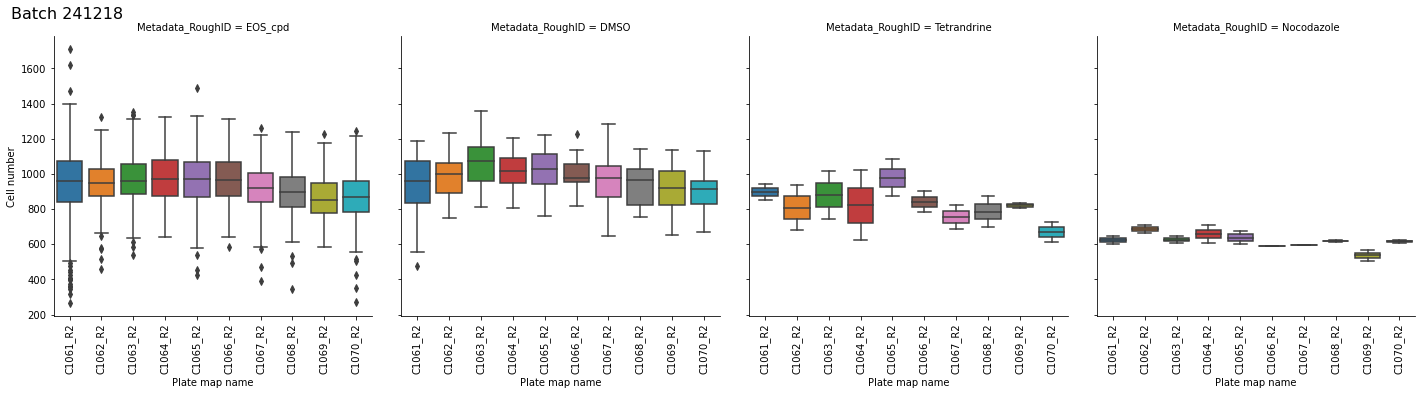

<Figure size 720x720 with 0 Axes>

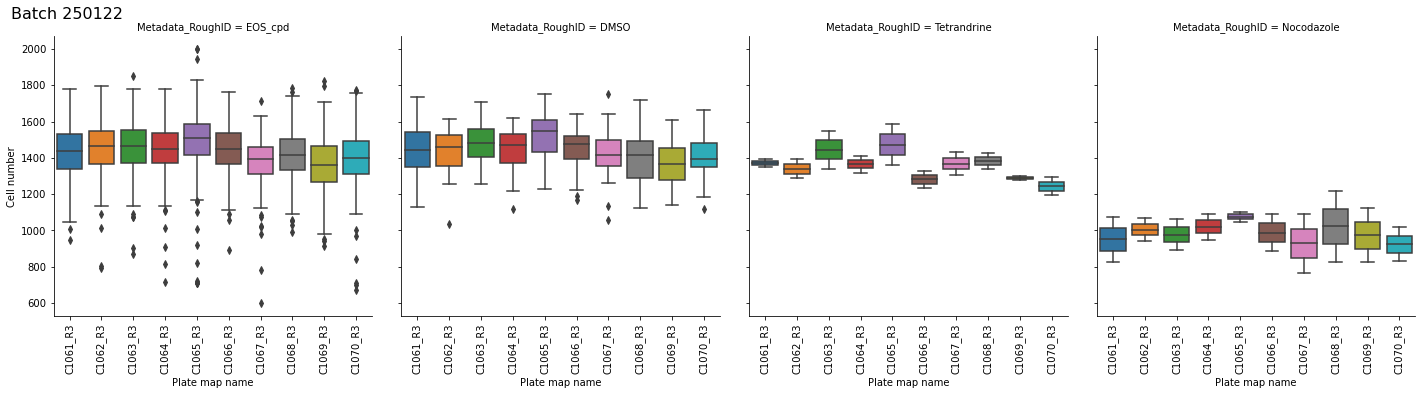

<Figure size 720x720 with 0 Axes>

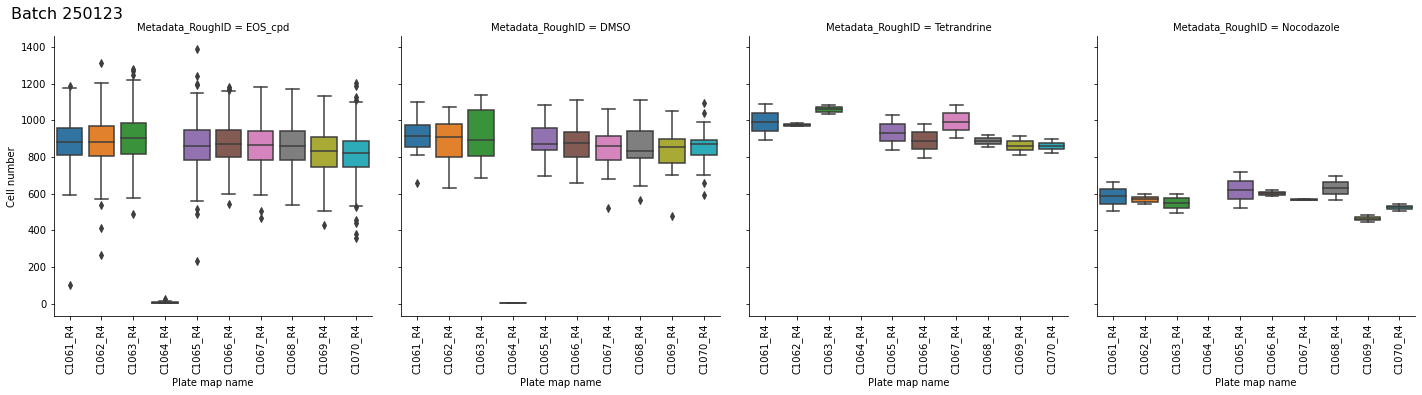

<Figure size 720x720 with 0 Axes>

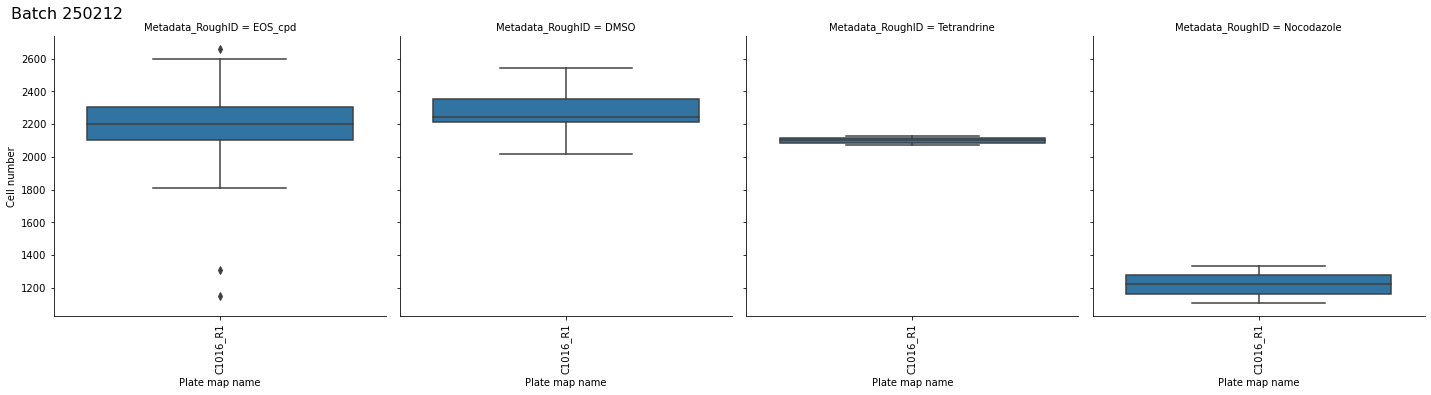

In [9]:
analyze_cell_number(Data_aggregated, 'MEDINA')

Error: directory cannot be created


<ipython-input-6-3b17d2221bc7>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

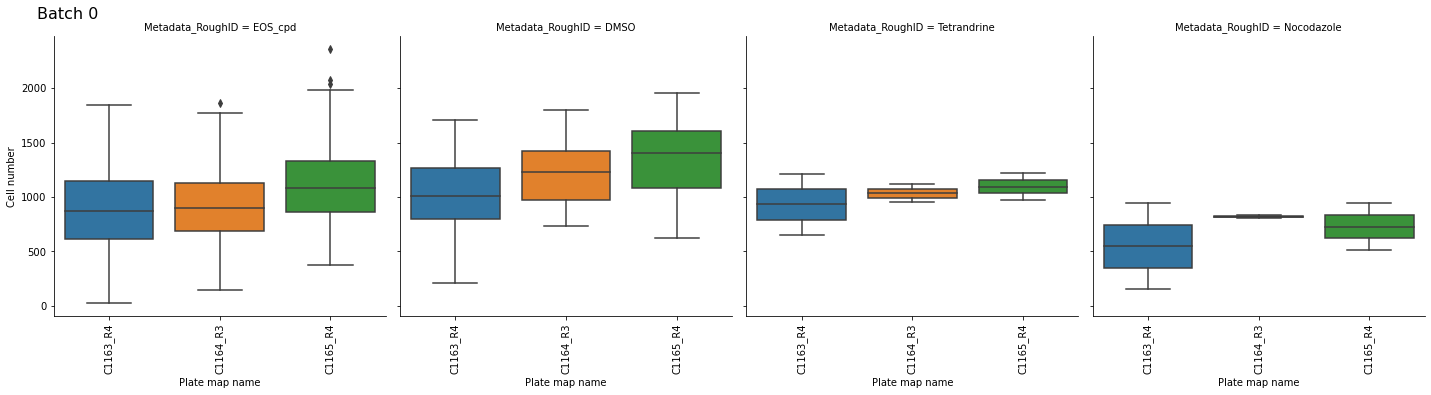

<Figure size 720x720 with 0 Axes>

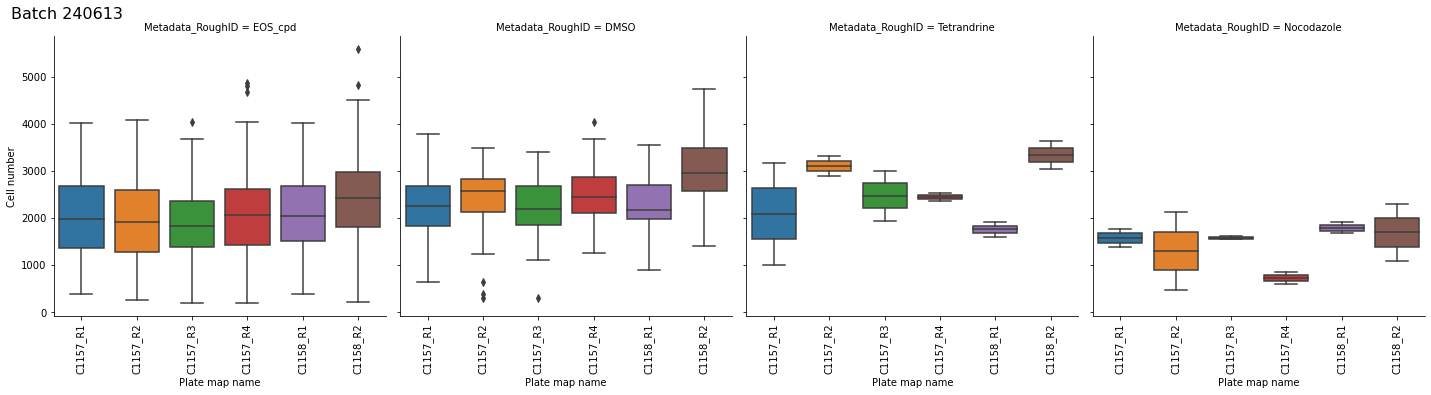

<Figure size 720x720 with 0 Axes>

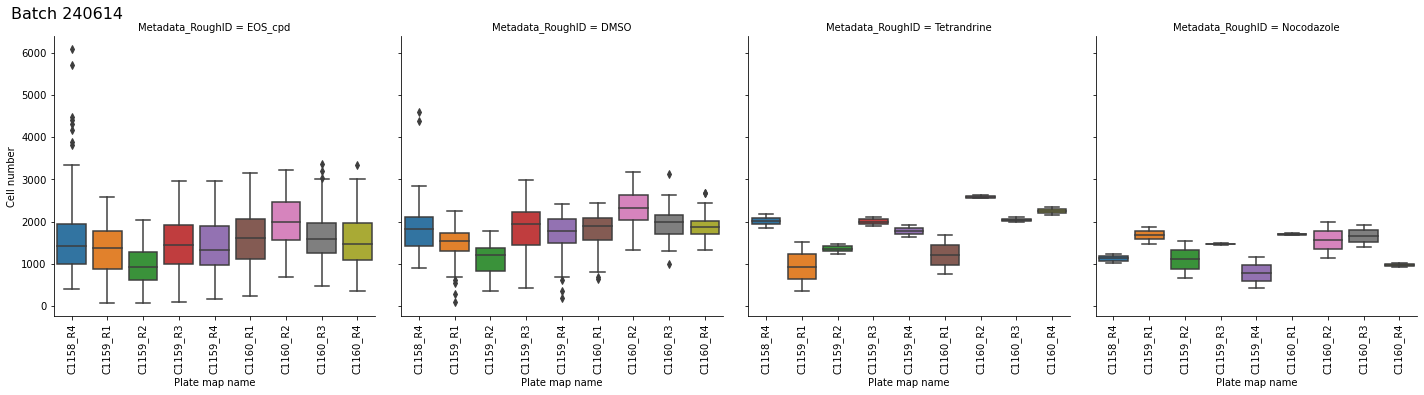

<Figure size 720x720 with 0 Axes>

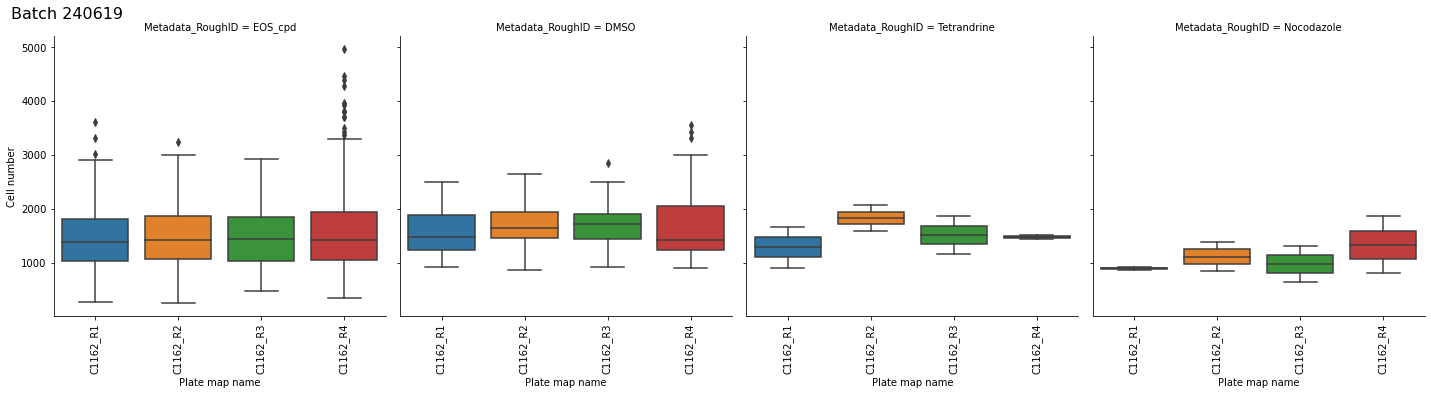

<Figure size 720x720 with 0 Axes>

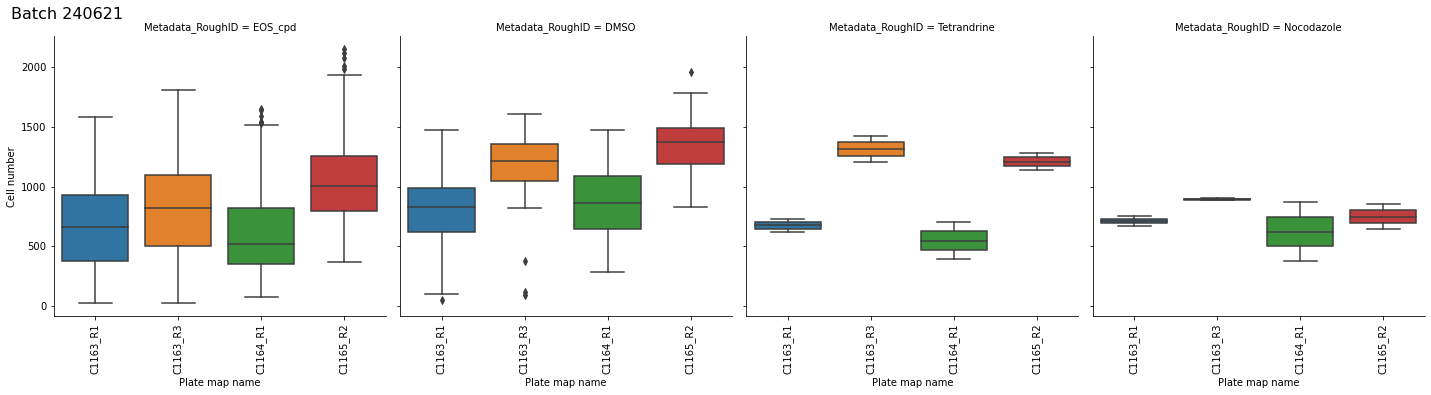

<Figure size 720x720 with 0 Axes>

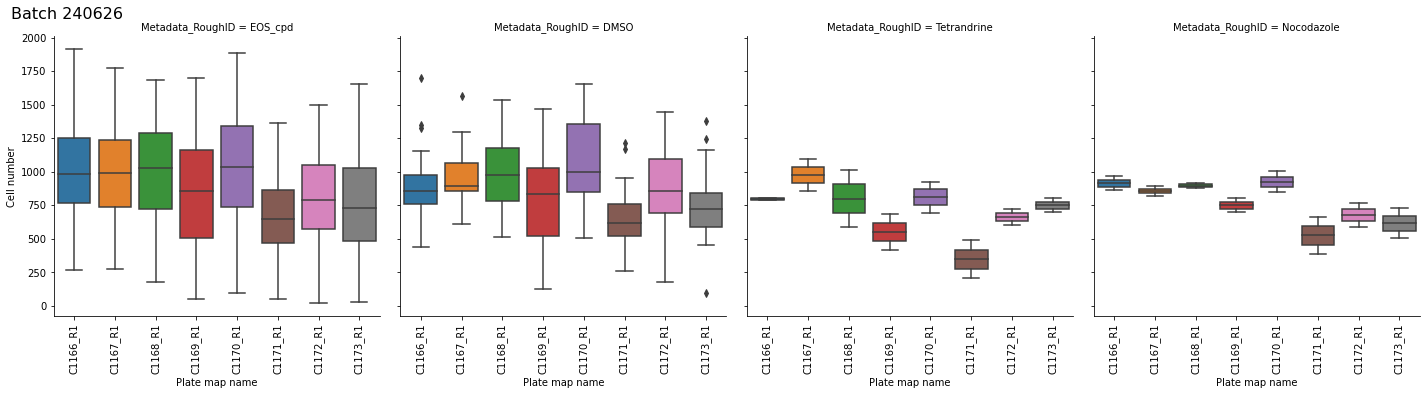

<Figure size 720x720 with 0 Axes>

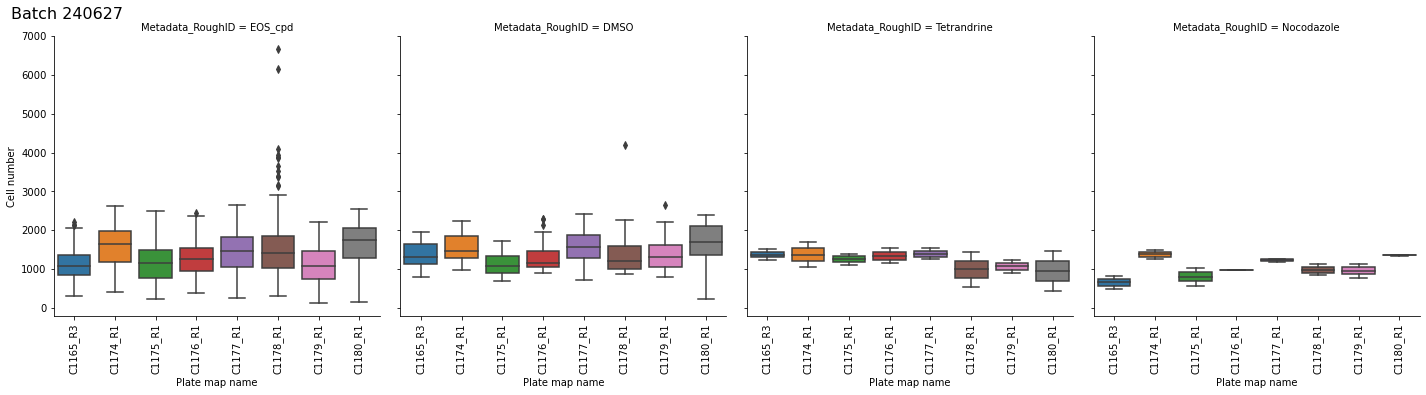

<Figure size 720x720 with 0 Axes>

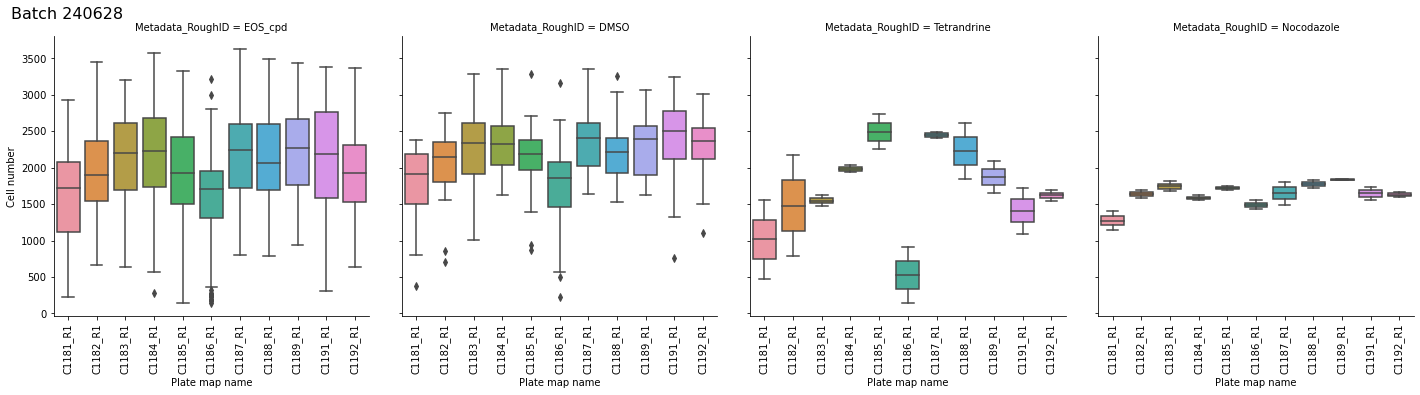

<Figure size 720x720 with 0 Axes>

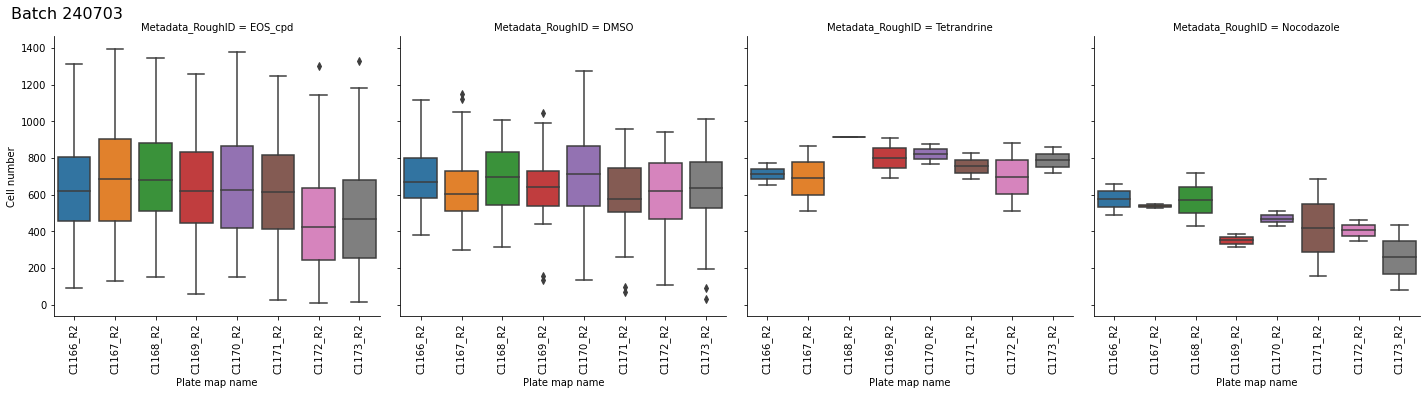

<Figure size 720x720 with 0 Axes>

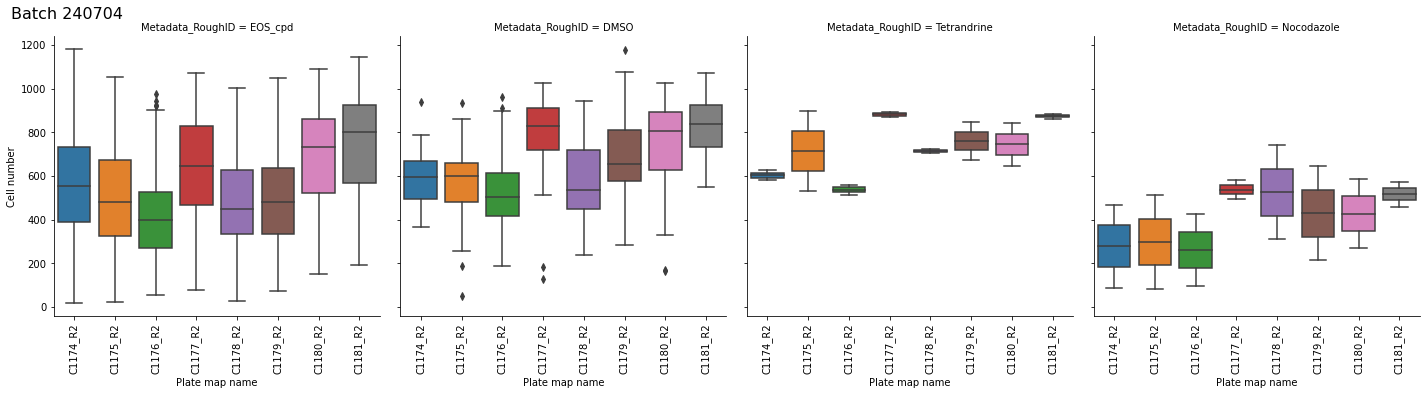

<Figure size 720x720 with 0 Axes>

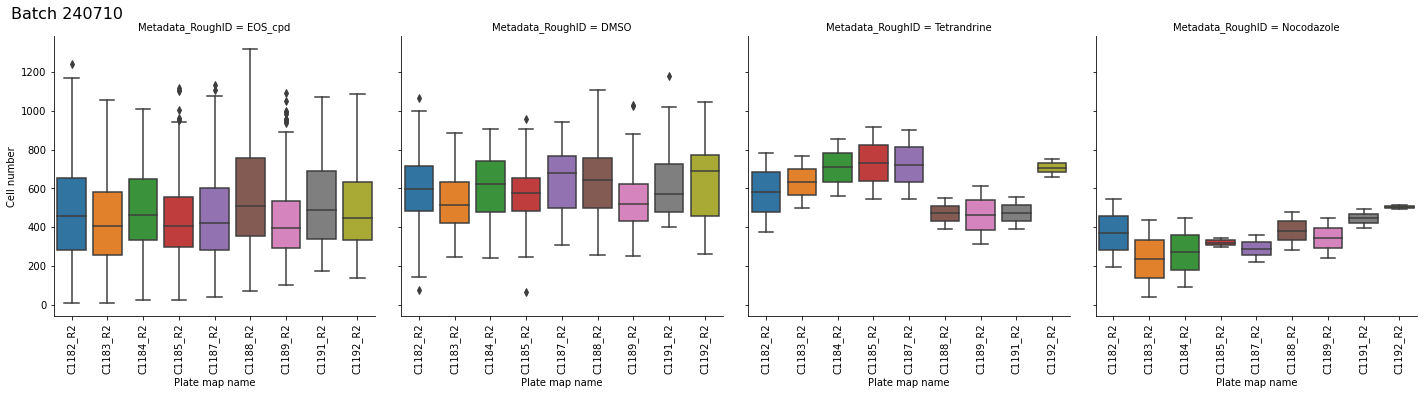

<Figure size 720x720 with 0 Axes>

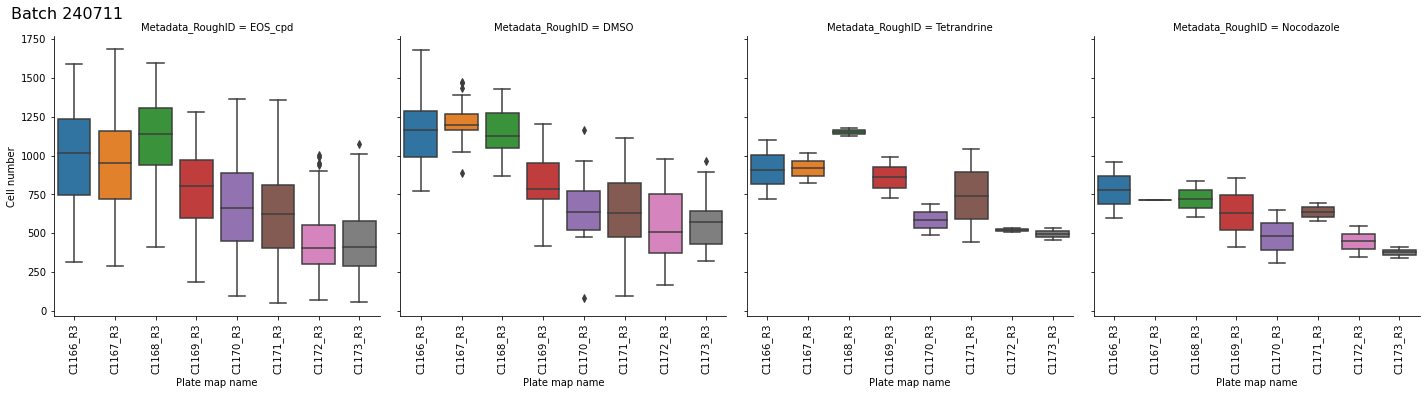

<Figure size 720x720 with 0 Axes>

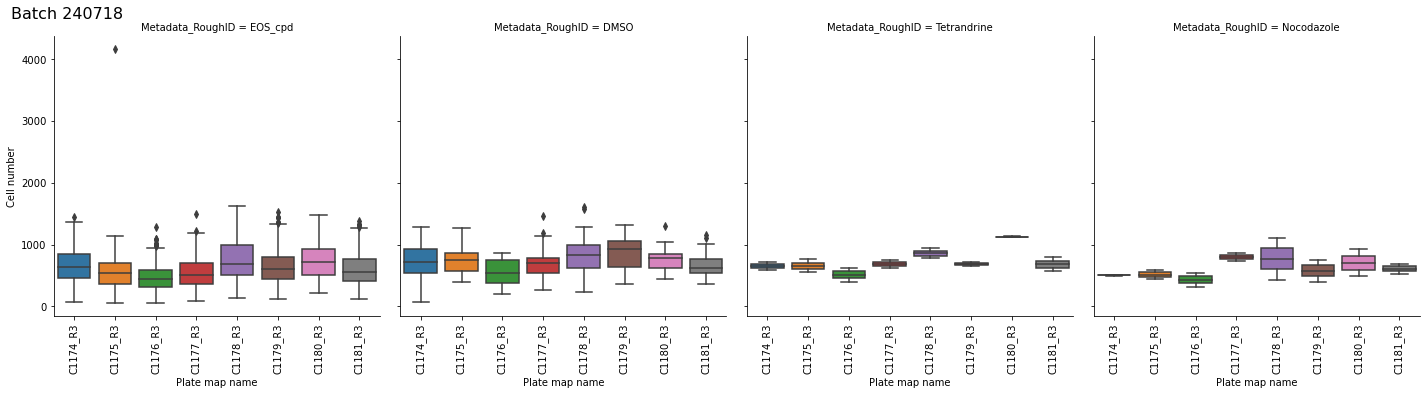

<Figure size 720x720 with 0 Axes>

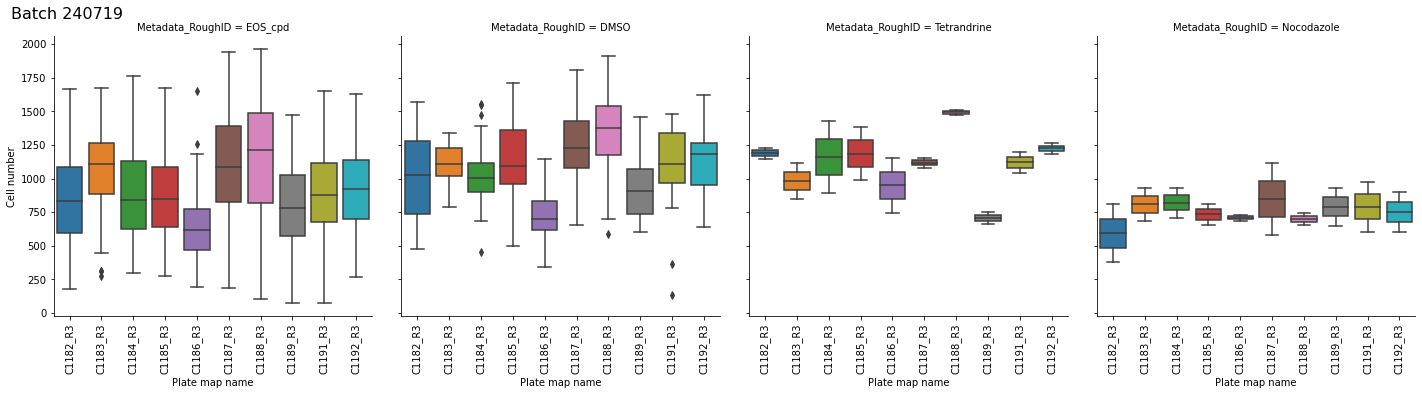

<Figure size 720x720 with 0 Axes>

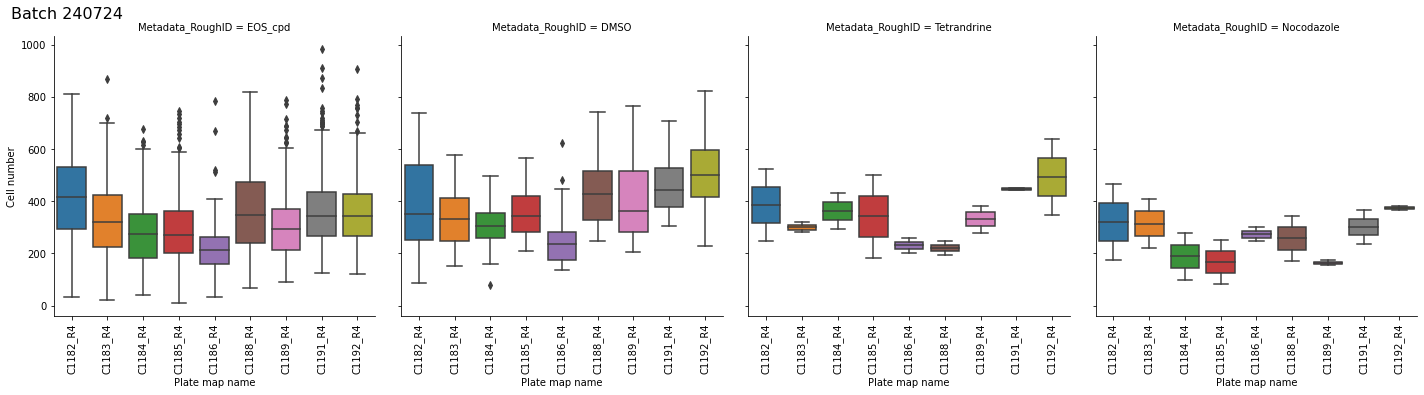

<Figure size 720x720 with 0 Axes>

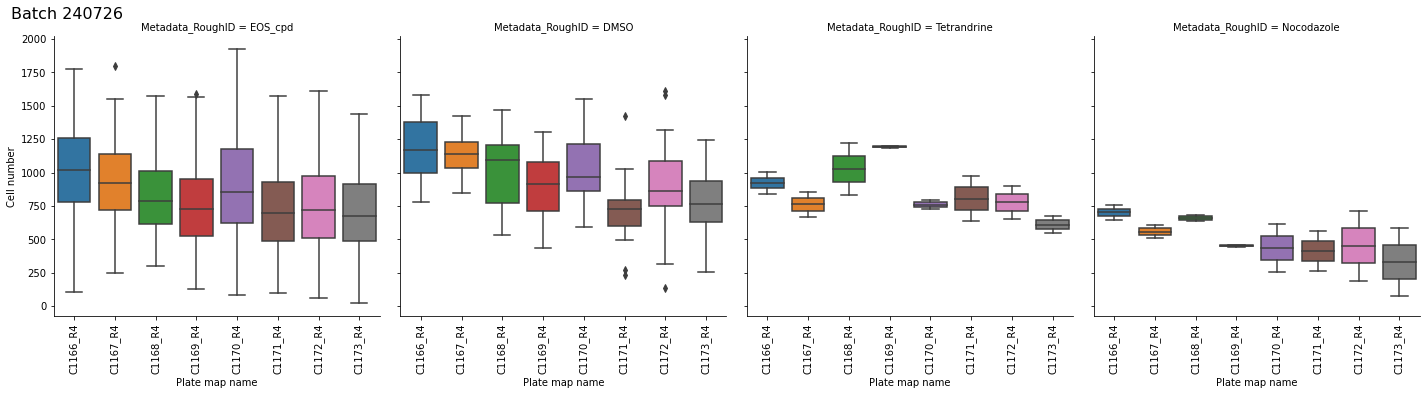

<Figure size 720x720 with 0 Axes>

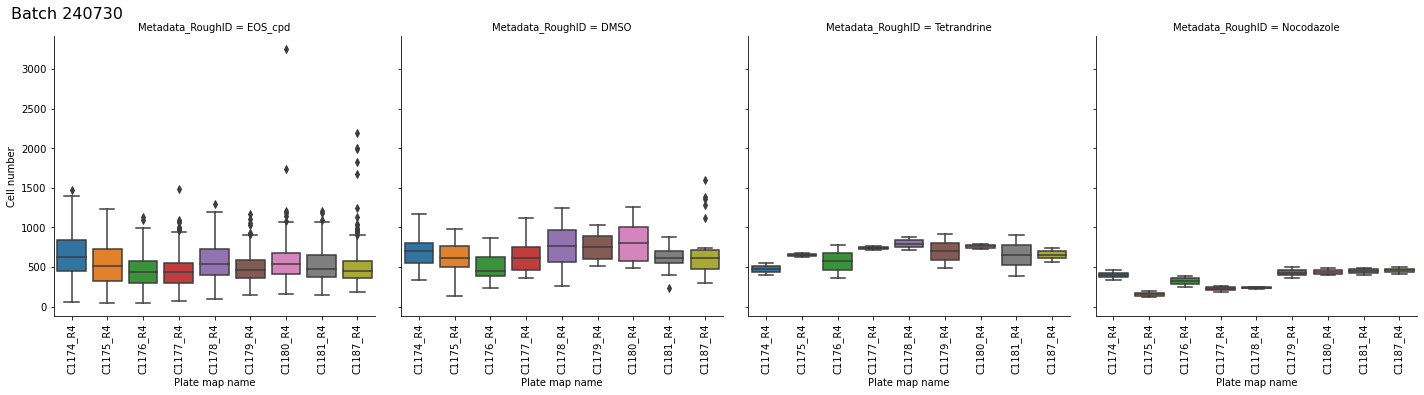

<Figure size 720x720 with 0 Axes>

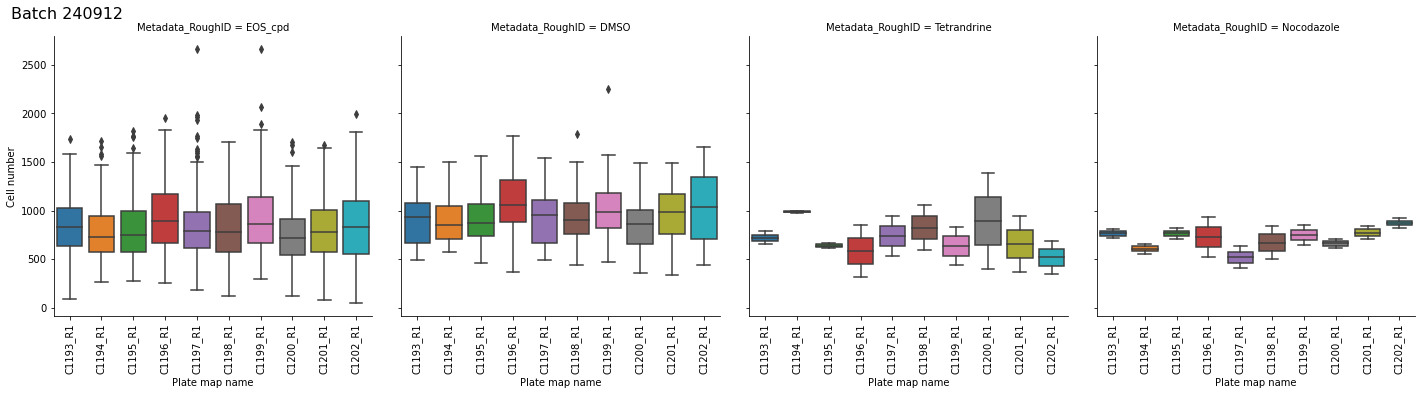

<Figure size 720x720 with 0 Axes>

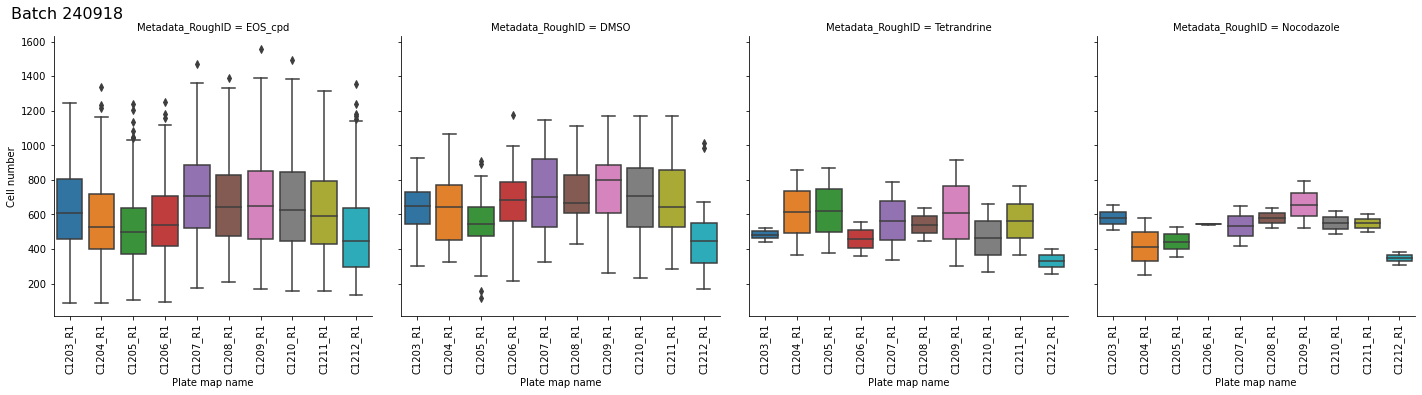

<Figure size 720x720 with 0 Axes>

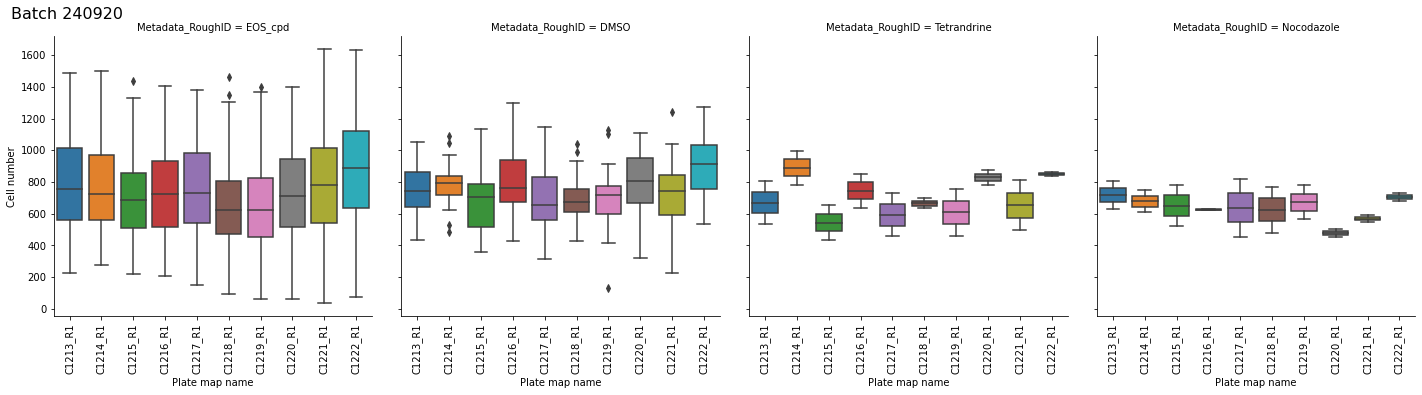

<Figure size 720x720 with 0 Axes>

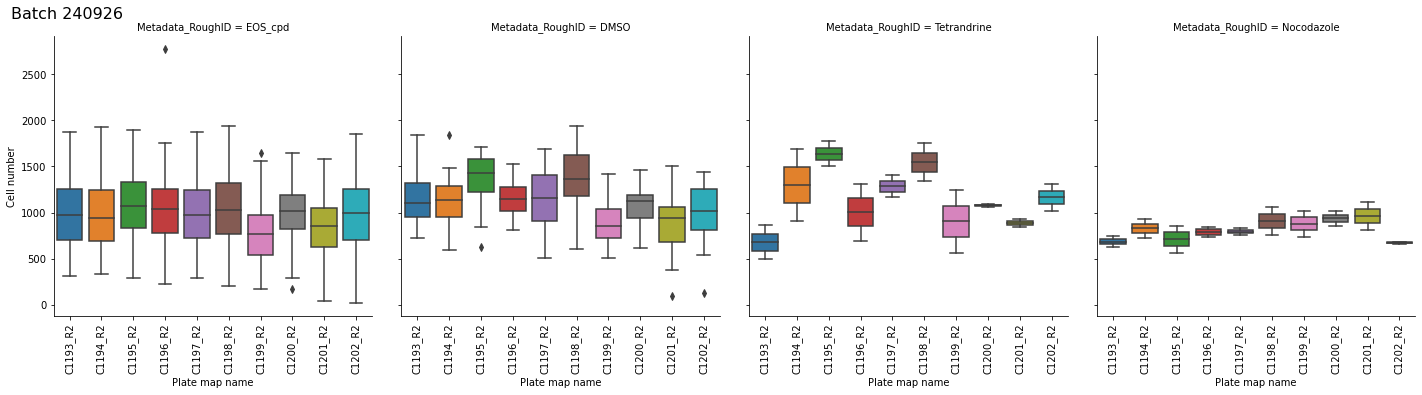

<Figure size 720x720 with 0 Axes>

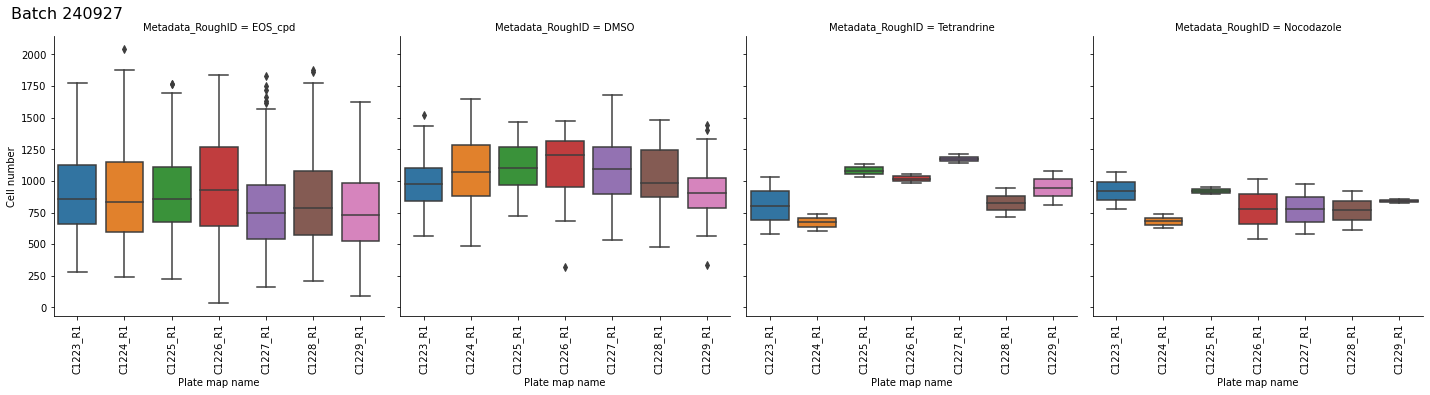

<Figure size 720x720 with 0 Axes>

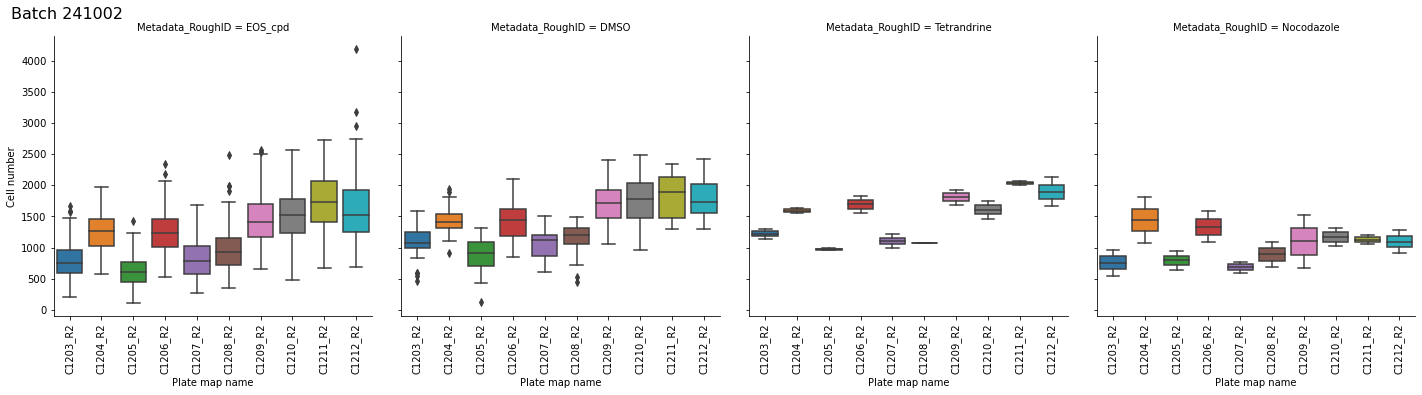

<Figure size 720x720 with 0 Axes>

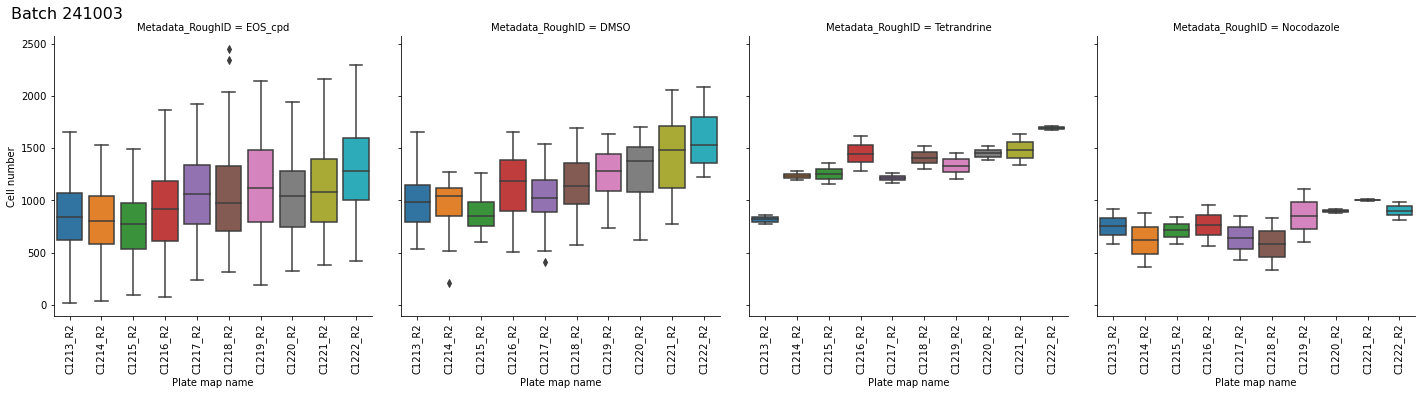

<Figure size 720x720 with 0 Axes>

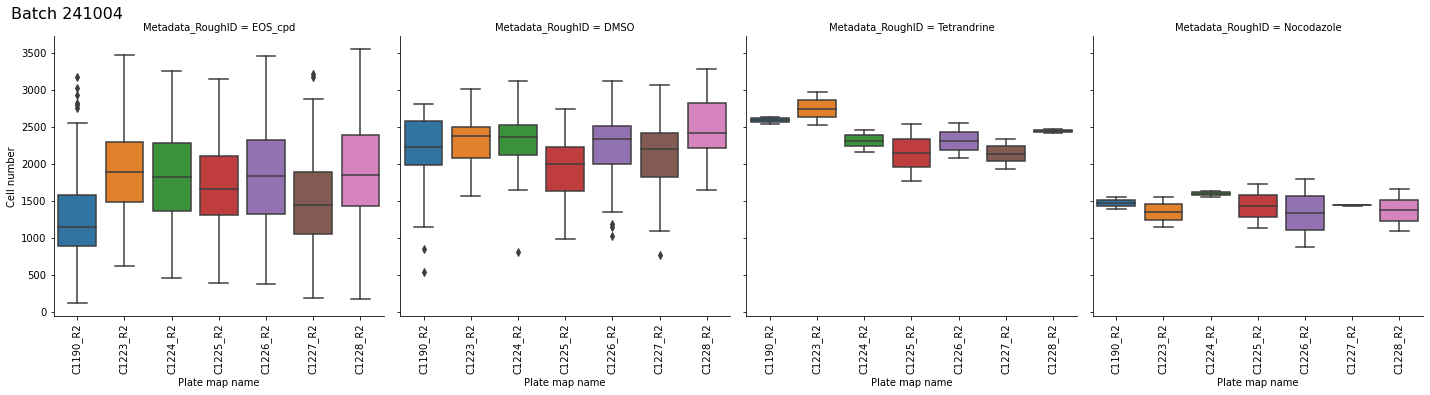

<Figure size 720x720 with 0 Axes>

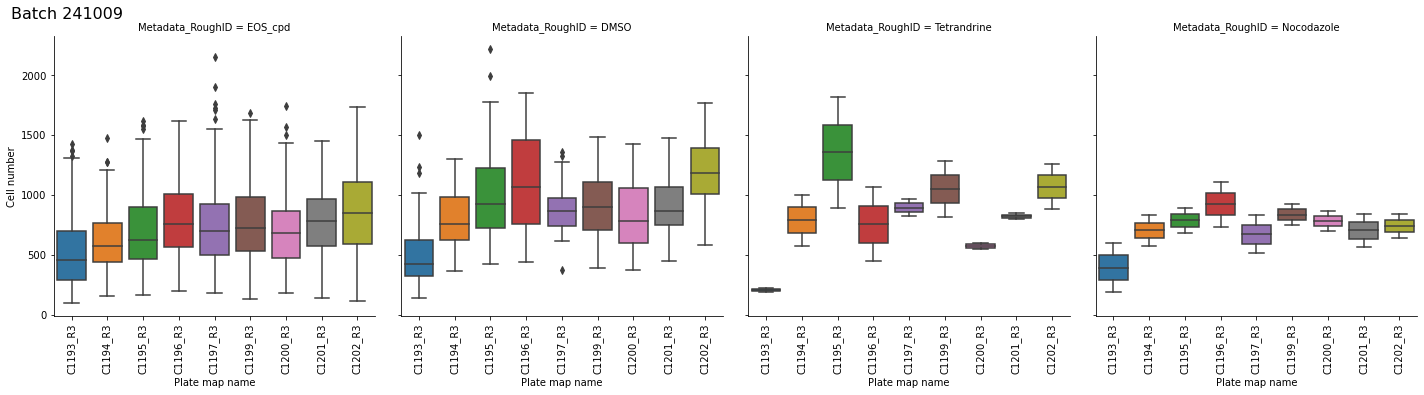

<Figure size 720x720 with 0 Axes>

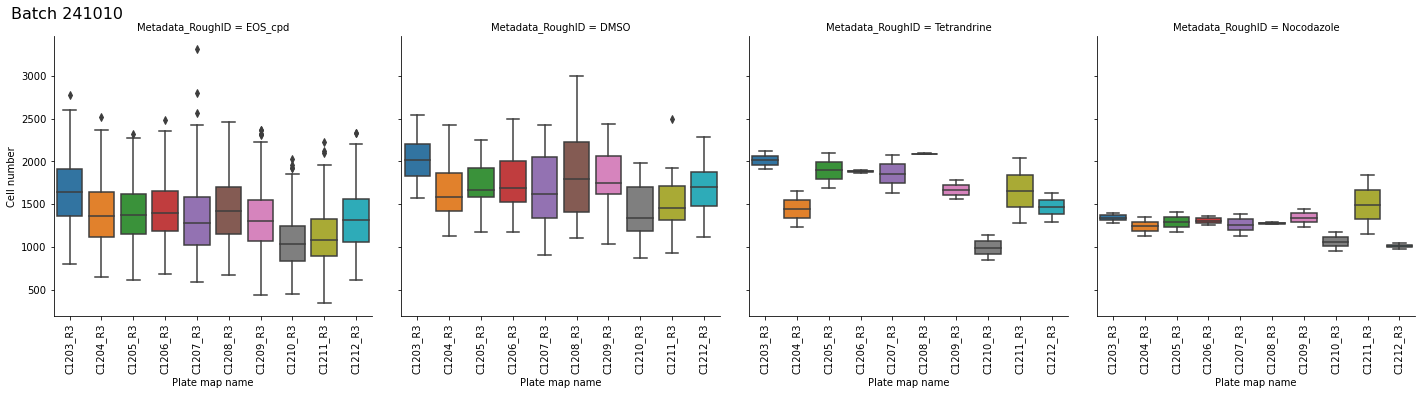

<Figure size 720x720 with 0 Axes>

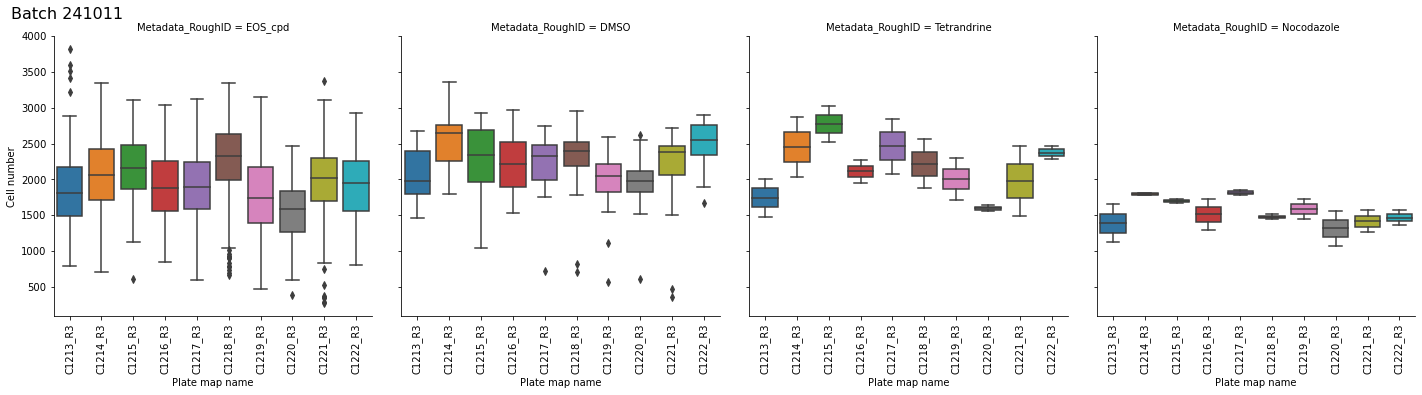

<Figure size 720x720 with 0 Axes>

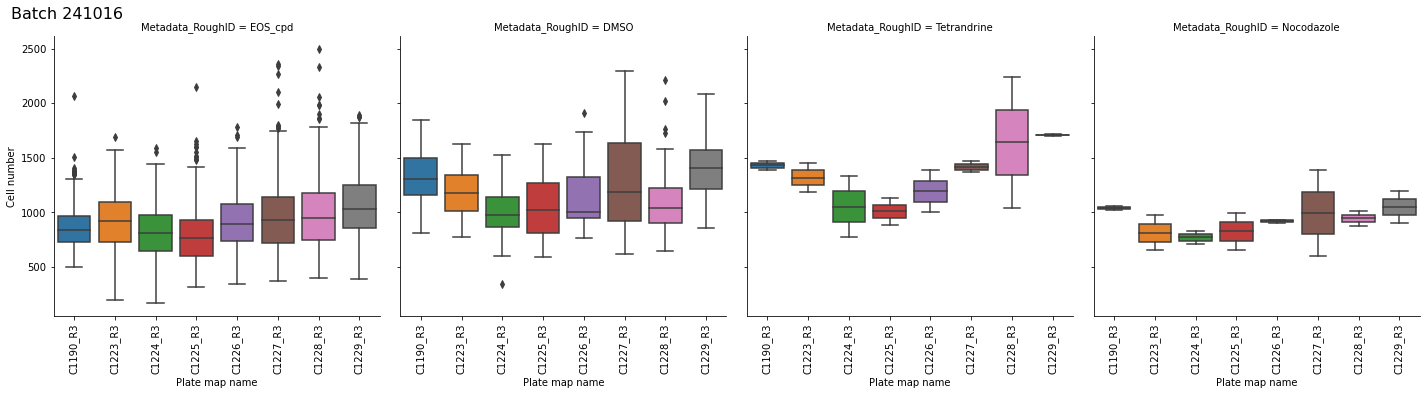

<Figure size 720x720 with 0 Axes>

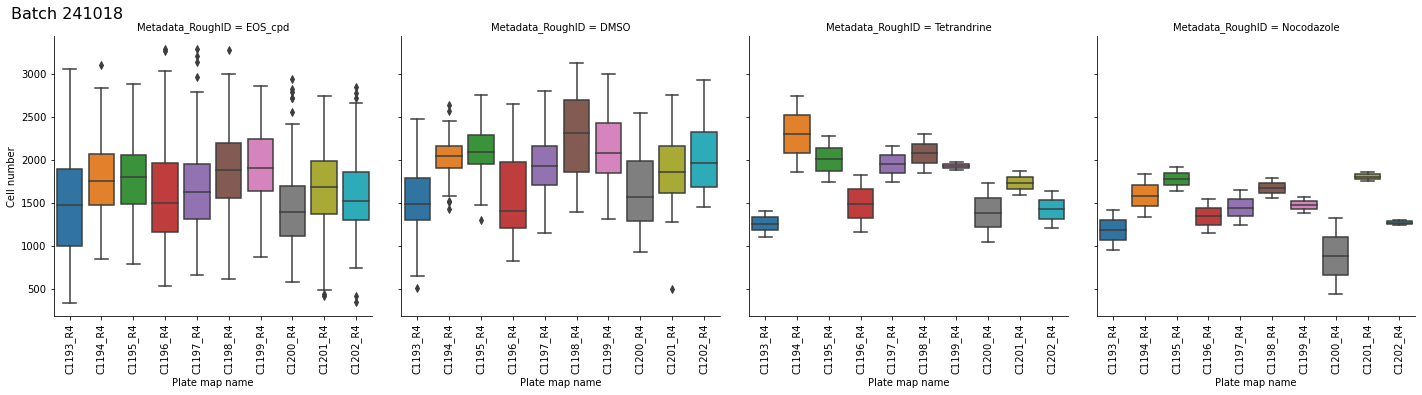

<Figure size 720x720 with 0 Axes>

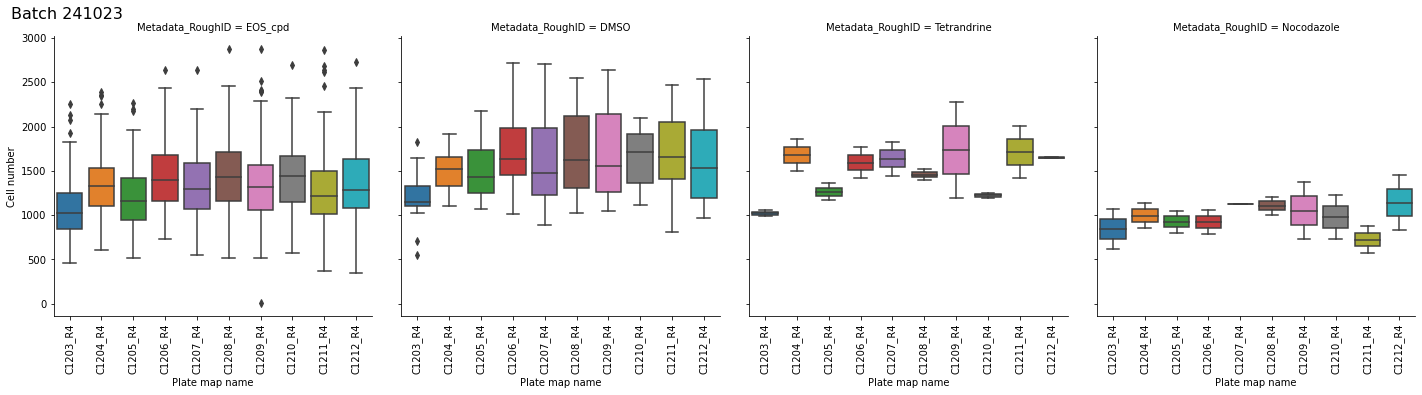

<Figure size 720x720 with 0 Axes>

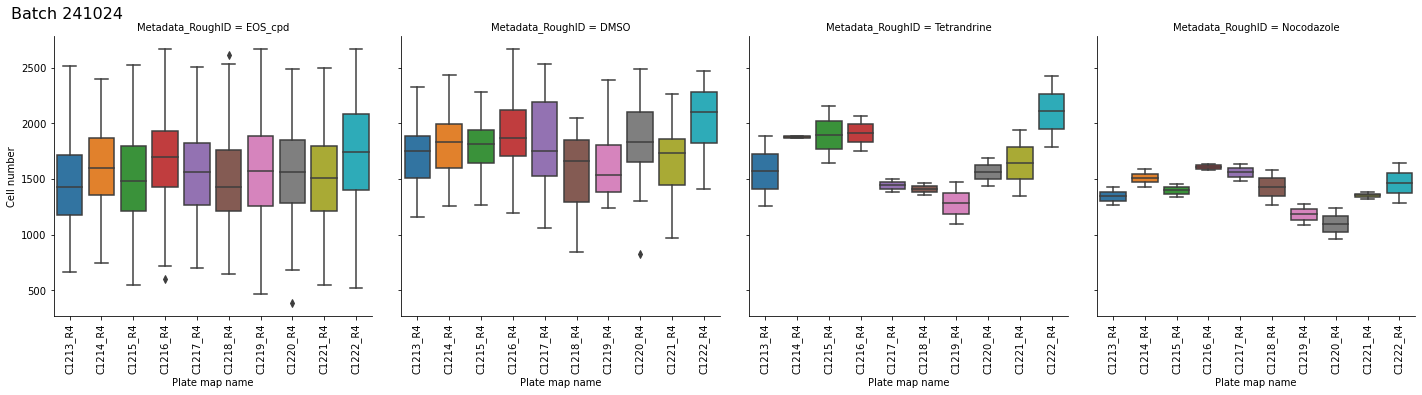

<Figure size 720x720 with 0 Axes>

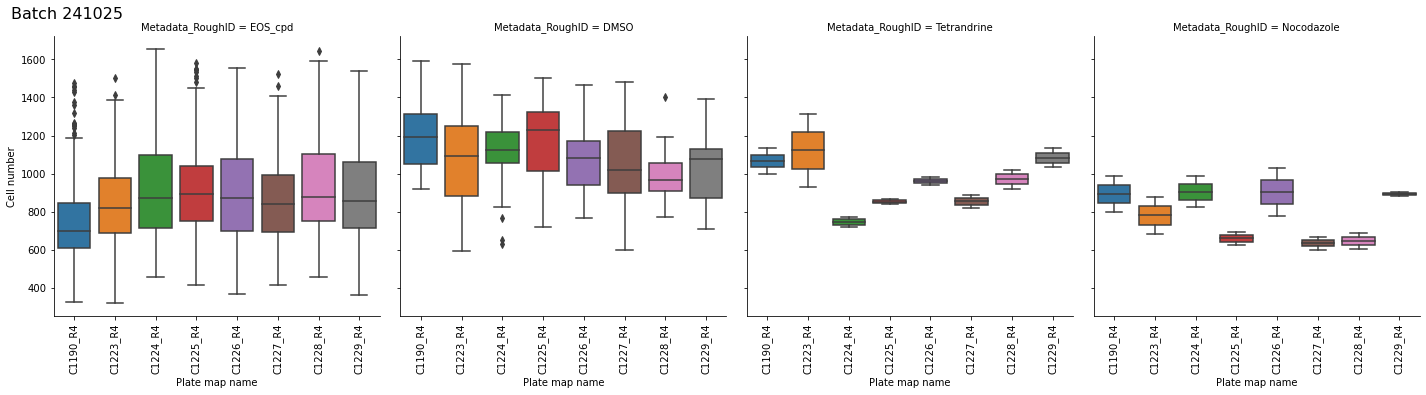

<Figure size 720x720 with 0 Axes>

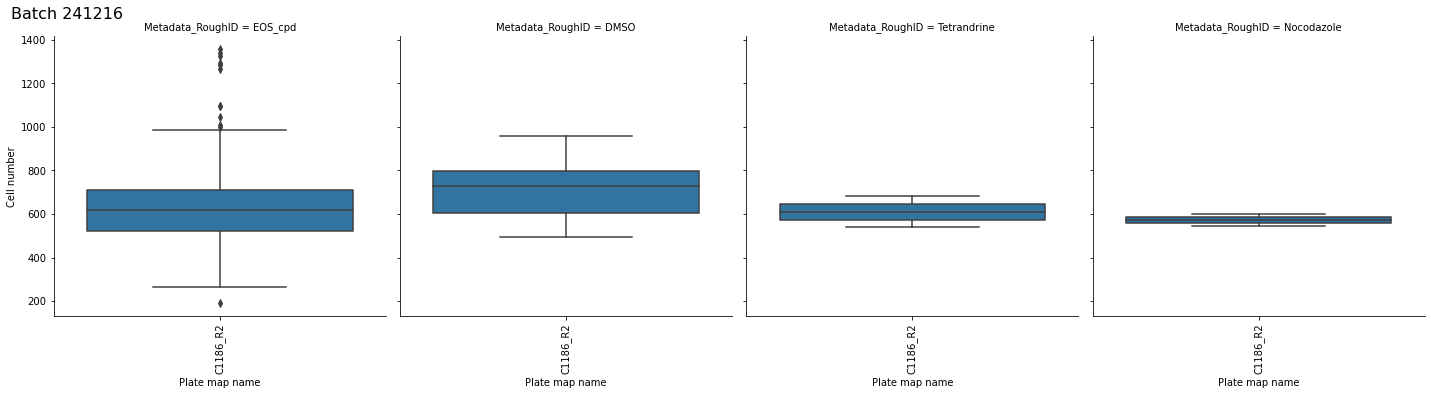

In [10]:
analyze_cell_number(Data_aggregated, 'USC')